In [1]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#DataFlair - Emotions in the RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fear",
    "07": "disgust",
    "08": "ps"
}

# Define the emotions available in all datasets
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy",
    "fear",
    "disgust",
    "ps"
    
}

In [3]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [4]:
# Function to load data from multiple datasets
def load_data(data_paths, test_size=0.2):
    X, y = [], []
    for data_path in data_paths:
        for file in glob.glob(os.path.join(data_path, "*.wav")):
            # get the base name of the audio file
            basename = os.path.basename(file)
            # print the file name for debugging
            print("Processing file:", basename)
            
            # Dynamically identify the emotion label from the file name
            emotion = None
            for label in int2emotion.values():
                if label.lower() in basename.lower():
                    emotion = label
                    break
            
            # If emotion is not found, skip the file
            if emotion is None:
                print("Error extracting emotion from:", basename)
                continue
            
            # we allow only AVAILABLE_EMOTIONS we set
            if emotion not in AVAILABLE_EMOTIONS:
                continue
            
            # extract speech features
            features = extract_feature(file, mfcc=True, chroma=True, mel=True)
            # add to data
            X.append(features)
            l={'angry':1,'sad':2,'neutral':3,'happy':4,'fear':5,'disgust':6,'ps':7}
            y.append(l[emotion])
    
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [5]:
data_paths = [
    "C:\\Users\\Desktop\\Train data\\Ravdess data\\Actor_*",
    "C:\\Users\\Desktop\\Train data\\Tess data",
    "C:\\Users\\Desktop\\Train data\\wav",
    "C:\\Users\\Desktop\\Train data\\ESR_data",
    "C:\\Users\\Desktop\\Train data\\data1",


   
]

In [6]:
X_train, X_test, y_train, y_test = load_data(data_paths,test_size=0.25)

Processing file: 01_01_01_01_dogs-sitting_disgust.wav
Processing file: 01_01_01_01_dogs-sitting_fear.wav
Processing file: 01_01_01_01_dogs-sitting_neutral.wav
Processing file: 01_01_01_01_dogs-sitting_ps.wav
Processing file: 01_01_01_01_dogs-sitting_sad.wav
Processing file: 01_01_01_01_kids-talking_angry.wav
Processing file: 01_01_01_01_kids-talking_disgust.wav
Processing file: 01_01_01_01_kids-talking_fear.wav
Processing file: 01_01_01_01_kids-talking_happy.wav
Processing file: 01_01_01_01_kids-talking_neutral.wav
Processing file: 01_01_01_01_kids-talking_ps.wav
Processing file: 01_01_01_01_kids-talking_sad.wav
Processing file: 01_01_01_02_dogs-sitting_angry.wav
Processing file: 01_01_01_02_dogs-sitting_disgust.wav
Processing file: 01_01_01_02_dogs-sitting_fear.wav
Processing file: 01_01_01_02_dogs-sitting_happy.wav
Processing file: 01_01_01_02_dogs-sitting_neutral.wav
Processing file: 01_01_01_02_dogs-sitting_ps.wav
Processing file: 01_01_01_02_dogs-sitting_sad.wav
Processing file: 0

Processing file: 02_01_02_01_dogs-sitting_happy.wav
Processing file: 02_01_02_01_dogs-sitting_ps.wav
Processing file: 02_01_02_01_dogs-sitting_sad.wav
Processing file: 02_01_02_01_kids-talking_angry.wav
Processing file: 02_01_02_01_kids-talking_disgust.wav
Processing file: 02_01_02_01_kids-talking_fear.wav
Processing file: 02_01_02_01_kids-talking_happy.wav
Processing file: 02_01_02_01_kids-talking_ps.wav
Processing file: 02_01_02_01_kids-talking_sad.wav
Processing file: 02_01_02_02_dogs-sitting_angry.wav
Processing file: 02_01_02_02_dogs-sitting_disgust.wav
Processing file: 02_01_02_02_dogs-sitting_fear.wav
Processing file: 02_01_02_02_dogs-sitting_happy.wav
Processing file: 02_01_02_02_dogs-sitting_ps.wav
Processing file: 02_01_02_02_dogs-sitting_sad.wav
Processing file: 02_01_02_02_kids-talking_angry.wav
Processing file: 02_01_02_02_kids-talking_disgust.wav
Processing file: 02_01_02_02_kids-talking_fear.wav
Processing file: 02_01_02_02_kids-talking_happy.wav
Processing file: 02_01_0

Processing file: 03_01_01_01_kids-talking_disgust.wav
Processing file: 03_01_01_01_kids-talking_fear.wav
Processing file: 03_01_01_01_kids-talking_happy.wav
Processing file: 03_01_01_01_kids-talking_neutral.wav
Processing file: 03_01_01_01_kids-talking_ps.wav
Processing file: 03_01_01_01_kids-talking_sad.wav
Processing file: 03_01_01_02_dogs-sitting_angry.wav
Processing file: 03_01_01_02_dogs-sitting_disgust.wav
Processing file: 03_01_01_02_dogs-sitting_fear.wav
Processing file: 03_01_01_02_dogs-sitting_happy.wav
Processing file: 03_01_01_02_dogs-sitting_neutral.wav
Processing file: 03_01_01_02_dogs-sitting_ps.wav
Processing file: 03_01_01_02_dogs-sitting_sad.wav
Processing file: 03_01_01_02_kids-talking_angry.wav
Processing file: 03_01_01_02_kids-talking_disgust.wav
Processing file: 03_01_01_02_kids-talking_fear.wav
Processing file: 03_01_01_02_kids-talking_happy.wav
Processing file: 03_01_01_02_kids-talking_neutral.wav
Processing file: 03_01_01_02_kids-talking_ps.wav
Processing file:

Processing file: 04_01_02_01_kids-talking_disgust.wav
Processing file: 04_01_02_01_kids-talking_fear.wav
Processing file: 04_01_02_01_kids-talking_happy.wav
Processing file: 04_01_02_01_kids-talking_ps.wav
Processing file: 04_01_02_01_kids-talking_sad.wav
Processing file: 04_01_02_02_dogs-sitting_angry.wav
Processing file: 04_01_02_02_dogs-sitting_disgust.wav
Processing file: 04_01_02_02_dogs-sitting_fear.wav
Processing file: 04_01_02_02_dogs-sitting_happy.wav
Processing file: 04_01_02_02_dogs-sitting_ps.wav
Processing file: 04_01_02_02_dogs-sitting_sad.wav
Processing file: 04_01_02_02_kids-talking_angry.wav
Processing file: 04_01_02_02_kids-talking_disgust.wav
Processing file: 04_01_02_02_kids-talking_fear.wav
Processing file: 04_01_02_02_kids-talking_happy.wav
Processing file: 04_01_02_02_kids-talking_ps.wav
Processing file: 04_01_02_02_kids-talking_sad.wav
Processing file: 04_02_01_01_dogs-sitting_angry.wav
Processing file: 04_02_01_01_dogs-sitting_fear.wav
Processing file: 04_02_01

Processing file: 05_02_01_02_dogs-sitting_sad.wav
Processing file: 05_02_01_02_kids-talking_angry.wav
Processing file: 05_02_01_02_kids-talking_fear.wav
Processing file: 05_02_01_02_kids-talking_happy.wav
Processing file: 05_02_01_02_kids-talking_neutral.wav
Processing file: 05_02_01_02_kids-talking_sad.wav
Processing file: 05_02_02_01_dogs-sitting_angry.wav
Processing file: 05_02_02_01_dogs-sitting_fear.wav
Processing file: 05_02_02_01_dogs-sitting_happy.wav
Processing file: 05_02_02_01_dogs-sitting_sad.wav
Processing file: 05_02_02_01_kids-talking_angry.wav
Processing file: 05_02_02_01_kids-talking_fear.wav
Processing file: 05_02_02_01_kids-talking_happy.wav
Processing file: 05_02_02_01_kids-talking_sad.wav
Processing file: 05_02_02_02_dogs-sitting_angry.wav
Processing file: 05_02_02_02_dogs-sitting_fear.wav
Processing file: 05_02_02_02_dogs-sitting_happy.wav
Processing file: 05_02_02_02_dogs-sitting_sad.wav
Processing file: 05_02_02_02_kids-talking_angry.wav
Processing file: 05_02_0

Processing file: 07_01_01_01_dogs-sitting_neutral.wav
Processing file: 07_01_01_01_dogs-sitting_ps.wav
Processing file: 07_01_01_01_dogs-sitting_sad.wav
Processing file: 07_01_01_01_kids-talking_angry.wav
Processing file: 07_01_01_01_kids-talking_disgust.wav
Processing file: 07_01_01_01_kids-talking_fear.wav
Processing file: 07_01_01_01_kids-talking_happy.wav
Processing file: 07_01_01_01_kids-talking_neutral.wav
Processing file: 07_01_01_01_kids-talking_ps.wav
Processing file: 07_01_01_01_kids-talking_sad.wav
Processing file: 07_01_01_02_dogs-sitting_angry.wav
Processing file: 07_01_01_02_dogs-sitting_disgust.wav
Processing file: 07_01_01_02_dogs-sitting_fear.wav
Processing file: 07_01_01_02_dogs-sitting_happy.wav
Processing file: 07_01_01_02_dogs-sitting_neutral.wav
Processing file: 07_01_01_02_dogs-sitting_ps.wav
Processing file: 07_01_01_02_dogs-sitting_sad.wav
Processing file: 07_01_01_02_kids-talking_angry.wav
Processing file: 07_01_01_02_kids-talking_disgust.wav
Processing file: 

Processing file: 08_02_01_02_dogs-sitting_fear.wav
Processing file: 08_02_01_02_dogs-sitting_happy.wav
Processing file: 08_02_01_02_dogs-sitting_neutral.wav
Processing file: 08_02_01_02_dogs-sitting_sad.wav
Processing file: 08_02_01_02_kids-talking_angry.wav
Processing file: 08_02_01_02_kids-talking_fear.wav
Processing file: 08_02_01_02_kids-talking_happy.wav
Processing file: 08_02_01_02_kids-talking_neutral.wav
Processing file: 08_02_01_02_kids-talking_sad.wav
Processing file: 08_02_02_01_dogs-sitting_angry.wav
Processing file: 08_02_02_01_dogs-sitting_fear.wav
Processing file: 08_02_02_01_dogs-sitting_happy.wav
Processing file: 08_02_02_01_dogs-sitting_sad.wav
Processing file: 08_02_02_01_kids-talking_angry.wav
Processing file: 08_02_02_01_kids-talking_fear.wav
Processing file: 08_02_02_01_kids-talking_happy.wav
Processing file: 08_02_02_01_kids-talking_sad.wav
Processing file: 08_02_02_02_dogs-sitting_angry.wav
Processing file: 08_02_02_02_dogs-sitting_fear.wav
Processing file: 08_0

Processing file: 10_01_01_02_dogs-sitting_ps.wav
Processing file: 10_01_01_02_dogs-sitting_sad.wav
Processing file: 10_01_01_02_kids-talking_angry.wav
Processing file: 10_01_01_02_kids-talking_disgust.wav
Processing file: 10_01_01_02_kids-talking_fear.wav
Processing file: 10_01_01_02_kids-talking_happy.wav
Processing file: 10_01_01_02_kids-talking_neutral.wav
Processing file: 10_01_01_02_kids-talking_ps.wav
Processing file: 10_01_01_02_kids-talking_sad.wav
Processing file: 10_01_02_01_dogs-sitting_angry.wav
Processing file: 10_01_02_01_dogs-sitting_disgust.wav
Processing file: 10_01_02_01_dogs-sitting_fear.wav
Processing file: 10_01_02_01_dogs-sitting_happy.wav
Processing file: 10_01_02_01_dogs-sitting_ps.wav
Processing file: 10_01_02_01_dogs-sitting_sad.wav
Processing file: 10_01_02_01_kids-talking_angry.wav
Processing file: 10_01_02_01_kids-talking_disgust.wav
Processing file: 10_01_02_01_kids-talking_fear.wav
Processing file: 10_01_02_01_kids-talking_happy.wav
Processing file: 10_01

Processing file: 11_01_02_02_dogs-sitting_sad.wav
Processing file: 11_01_02_02_kids-talking_angry.wav
Processing file: 11_01_02_02_kids-talking_disgust.wav
Processing file: 11_01_02_02_kids-talking_fear.wav
Processing file: 11_01_02_02_kids-talking_happy.wav
Processing file: 11_01_02_02_kids-talking_ps.wav
Processing file: 11_01_02_02_kids-talking_sad.wav
Processing file: 11_02_01_01_dogs-sitting_angry.wav
Processing file: 11_02_01_01_dogs-sitting_fear.wav
Processing file: 11_02_01_01_dogs-sitting_happy.wav
Processing file: 11_02_01_01_dogs-sitting_neutral.wav
Processing file: 11_02_01_01_dogs-sitting_sad.wav
Processing file: 11_02_01_01_kids-talking_angry.wav
Processing file: 11_02_01_01_kids-talking_fear.wav
Processing file: 11_02_01_01_kids-talking_happy.wav
Processing file: 11_02_01_01_kids-talking_neutral.wav
Processing file: 11_02_01_01_kids-talking_sad.wav
Processing file: 11_02_01_02_dogs-sitting_angry.wav
Processing file: 11_02_01_02_dogs-sitting_fear.wav
Processing file: 11_0

Processing file: 12_02_02_01_dogs-sitting_angry.wav
Processing file: 12_02_02_01_dogs-sitting_fear.wav
Processing file: 12_02_02_01_dogs-sitting_happy.wav
Processing file: 12_02_02_01_dogs-sitting_sad.wav
Processing file: 12_02_02_01_kids-talking_angry.wav
Processing file: 12_02_02_01_kids-talking_fear.wav
Processing file: 12_02_02_01_kids-talking_happy.wav
Processing file: 12_02_02_01_kids-talking_sad.wav
Processing file: 12_02_02_02_dogs-sitting_angry.wav
Processing file: 12_02_02_02_dogs-sitting_fear.wav
Processing file: 12_02_02_02_dogs-sitting_happy.wav
Processing file: 12_02_02_02_dogs-sitting_sad.wav
Processing file: 12_02_02_02_kids-talking_angry.wav
Processing file: 12_02_02_02_kids-talking_fear.wav
Processing file: 12_02_02_02_kids-talking_happy.wav
Processing file: 12_02_02_02_kids-talking_sad.wav
Processing file: 03-01-02-01-01-01-13_calm.wav
Processing file: 03-01-02-01-01-02-13_calm.wav
Processing file: 03-01-02-01-02-01-13_calm.wav
Processing file: 03-01-02-01-02-02-13_c

Processing file: 03-02-03-01-02-01-14_happy.wav
Processing file: 03-02-03-01-02-02-14_happy.wav
Processing file: 03-02-03-02-01-01-14_happy.wav
Processing file: 03-02-03-02-01-02-14_happy.wav
Processing file: 03-02-03-02-02-01-14_happy.wav
Processing file: 03-02-03-02-02-02-14_happy.wav
Processing file: 03-02-04-01-01-01-14_sad.wav
Processing file: 03-02-04-01-01-02-14_sad.wav
Processing file: 03-02-04-01-02-01-14_sad.wav
Processing file: 03-02-04-01-02-02-14_sad.wav
Processing file: 03-02-04-02-01-01-14_sad.wav
Processing file: 03-02-04-02-01-02-14_sad.wav
Processing file: 03-02-04-02-02-01-14_sad.wav
Processing file: 03-02-04-02-02-02-14_sad.wav
Processing file: 03-02-05-01-01-01-14_angry.wav
Processing file: 03-02-05-01-01-02-14_angry.wav
Processing file: 03-02-05-01-02-01-14_angry.wav
Processing file: 03-02-05-01-02-02-14_angry.wav
Processing file: 03-02-05-02-01-01-14_angry.wav
Processing file: 03-02-05-02-01-02-14_angry.wav
Processing file: 03-02-05-02-02-01-14_angry.wav
Processi

Processing file: 03-02-04-01-02-02-16_sad.wav
Processing file: 03-02-04-02-01-01-16_sad.wav
Processing file: 03-02-04-02-01-02-16_sad.wav
Processing file: 03-02-04-02-02-01-16_sad.wav
Processing file: 03-02-04-02-02-02-16_sad.wav
Processing file: 03-02-05-01-01-01-16_angry.wav
Processing file: 03-02-05-01-01-02-16_angry.wav
Processing file: 03-02-05-01-02-01-16_angry.wav
Processing file: 03-02-05-01-02-02-16_angry.wav
Processing file: 03-02-05-02-01-01-16_angry.wav
Processing file: 03-02-05-02-01-02-16_angry.wav
Processing file: 03-02-05-02-02-01-16_angry.wav
Processing file: 03-02-05-02-02-02-16_angry.wav
Processing file: 03-02-06-01-01-01-16_fear.wav
Processing file: 03-02-06-01-01-02-16_fear.wav
Processing file: 03-02-06-01-02-01-16_fear.wav
Processing file: 03-02-06-01-02-02-16_fear.wav
Processing file: 03-02-06-02-01-01-16_fear.wav
Processing file: 03-02-06-02-01-02-16_fear.wav
Processing file: 03-02-06-02-02-01-16_fear.wav
Processing file: 03-02-06-02-02-02-16_fear.wav
Processing

Processing file: 18_01_01_02_kids-talking_fear.wav
Processing file: 18_01_01_02_kids-talking_happy.wav
Processing file: 18_01_01_02_kids-talking_neutral.wav
Processing file: 18_01_01_02_kids-talking_ps.wav
Processing file: 18_01_01_02_kids-talking_sad.wav
Processing file: 18_01_02_01_dogs-sitting_angry.wav
Processing file: 18_01_02_01_dogs-sitting_disgust.wav
Processing file: 18_01_02_01_dogs-sitting_fear.wav
Processing file: 18_01_02_01_dogs-sitting_happy.wav
Processing file: 18_01_02_01_dogs-sitting_ps.wav
Processing file: 18_01_02_01_dogs-sitting_sad.wav
Processing file: 18_01_02_01_kids-talking_angry.wav
Processing file: 18_01_02_01_kids-talking_disgust.wav
Processing file: 18_01_02_01_kids-talking_fear.wav
Processing file: 18_01_02_01_kids-talking_happy.wav
Processing file: 18_01_02_01_kids-talking_ps.wav
Processing file: 18_01_02_01_kids-talking_sad.wav
Processing file: 18_01_02_02_dogs-sitting_angry.wav
Processing file: 18_01_02_02_dogs-sitting_disgust.wav
Processing file: 18_01

Processing file: 19_02_02_02_kids-talking_fear.wav
Processing file: 19_02_02_02_kids-talking_happy.wav
Processing file: 19_02_02_02_kids-talking_sad.wav
Processing file: 03-01-02-01-01-01-20_calm.wav
Processing file: 03-01-02-01-01-02-20_calm.wav
Processing file: 03-01-02-01-02-01-20_calm.wav
Processing file: 03-01-02-01-02-02-20_calm.wav
Processing file: 03-01-02-02-01-01-20_calm.wav
Processing file: 03-01-02-02-01-02-20_calm.wav
Processing file: 03-01-02-02-02-01-20_calm.wav
Processing file: 03-01-02-02-02-02-20_calm.wav
Processing file: 03-02-01-01-01-01-20_neutral.wav
Processing file: 03-02-01-01-01-02-20_neutral.wav
Processing file: 03-02-01-01-02-01-20_neutral.wav
Processing file: 03-02-01-01-02-02-20_neutral.wav
Processing file: 03-02-02-01-01-01-20_calm.wav
Processing file: 03-02-02-01-01-02-20_calm.wav
Processing file: 03-02-02-01-02-01-20_calm.wav
Processing file: 03-02-02-01-02-02-20_calm.wav
Processing file: 03-02-02-02-01-01-20_calm.wav
Processing file: 03-02-02-02-01-02-2

Processing file: 21_01_01_01_kids-talking_neutral.wav
Processing file: 21_01_01_01_kids-talking_ps.wav
Processing file: 21_01_01_01_kids-talking_sad.wav
Processing file: 21_01_01_02_dogs-sitting_angry.wav
Processing file: 21_01_01_02_dogs-sitting_disgust.wav
Processing file: 21_01_01_02_dogs-sitting_fear.wav
Processing file: 21_01_01_02_dogs-sitting_happy.wav
Processing file: 21_01_01_02_dogs-sitting_neutral.wav
Processing file: 21_01_01_02_dogs-sitting_ps.wav
Processing file: 21_01_01_02_dogs-sitting_sad.wav
Processing file: 21_01_01_02_kids-talking_angry.wav
Processing file: 21_01_01_02_kids-talking_disgust.wav
Processing file: 21_01_01_02_kids-talking_fear.wav
Processing file: 21_01_01_02_kids-talking_happy.wav
Processing file: 21_01_01_02_kids-talking_neutral.wav
Processing file: 21_01_01_02_kids-talking_ps.wav
Processing file: 21_01_01_02_kids-talking_sad.wav
Processing file: 21_01_02_01_dogs-sitting_angry.wav
Processing file: 21_01_02_01_dogs-sitting_disgust.wav
Processing file: 

Processing file: 03-02-03-01-02-01-23_happy.wav
Processing file: 03-02-03-01-02-02-23_happy.wav
Processing file: 03-02-03-02-01-01-23_happy.wav
Processing file: 03-02-03-02-01-02-23_happy.wav
Processing file: 03-02-03-02-02-01-23_happy.wav
Processing file: 03-02-03-02-02-02-23_happy.wav
Processing file: 03-02-04-01-01-01-23_sad.wav
Processing file: 03-02-04-01-01-02-23_sad.wav
Processing file: 03-02-04-01-02-01-23_sad.wav
Processing file: 03-02-04-01-02-02-23_sad.wav
Processing file: 03-02-04-02-01-01-23_sad.wav
Processing file: 03-02-04-02-01-02-23_sad.wav
Processing file: 03-02-04-02-02-01-23_sad.wav
Processing file: 03-02-04-02-02-02-23_sad.wav
Processing file: 03-02-05-01-01-01-23_angry.wav
Processing file: 03-02-05-01-01-02-23_angry.wav
Processing file: 03-02-05-01-02-01-23_angry.wav
Processing file: 03-02-05-01-02-02-23_angry.wav
Processing file: 03-02-05-02-01-01-23_angry.wav
Processing file: 03-02-05-02-01-02-23_angry.wav
Processing file: 03-02-05-02-02-01-23_angry.wav
Processi

Processing file: 24_01_02_01_kids-talking_angry.wav
Processing file: 24_01_02_01_kids-talking_disgust.wav
Processing file: 24_01_02_01_kids-talking_fear.wav
Processing file: 24_01_02_01_kids-talking_happy.wav
Processing file: 24_01_02_01_kids-talking_ps.wav
Processing file: 24_01_02_01_kids-talking_sad.wav
Processing file: 24_01_02_02_dogs-sitting_angry.wav
Processing file: 24_01_02_02_dogs-sitting_disgust.wav
Processing file: 24_01_02_02_dogs-sitting_fear.wav
Processing file: 24_01_02_02_dogs-sitting_happy.wav
Processing file: 24_01_02_02_dogs-sitting_ps.wav
Processing file: 24_01_02_02_dogs-sitting_sad.wav
Processing file: 24_01_02_02_kids-talking_angry.wav
Processing file: 24_01_02_02_kids-talking_disgust.wav
Processing file: 24_01_02_02_kids-talking_fear.wav
Processing file: 24_01_02_02_kids-talking_happy.wav
Processing file: 24_01_02_02_kids-talking_ps.wav
Processing file: 24_01_02_02_kids-talking_sad.wav
Processing file: 24_02_01_01_dogs-sitting_angry.wav
Processing file: 24_02_0

Processing file: 25_01_01_01_have_disgust.wav
Processing file: 25_01_01_01_have_fear.wav
Processing file: 25_01_01_01_have_happy.wav
Processing file: 25_01_01_01_have_neutral.wav
Processing file: 25_01_01_01_have_ps.wav
Processing file: 25_01_01_01_have_sad.wav
Processing file: 25_01_01_01_haze_angry.wav
Processing file: 25_01_01_01_haze_disgust.wav
Processing file: 25_01_01_01_haze_fear.wav
Processing file: 25_01_01_01_haze_happy.wav
Processing file: 25_01_01_01_haze_neutral.wav
Processing file: 25_01_01_01_haze_ps.wav
Processing file: 25_01_01_01_haze_sad.wav
Processing file: 25_01_01_01_hire_angry.wav
Processing file: 25_01_01_01_hire_disgust.wav
Processing file: 25_01_01_01_hire_fear.wav
Processing file: 25_01_01_01_hire_happy.wav
Processing file: 25_01_01_01_hire_neutral.wav
Processing file: 25_01_01_01_hire_ps.wav
Processing file: 25_01_01_01_hire_sad.wav
Processing file: 25_01_01_01_hit_angry.wav
Processing file: 25_01_01_01_hit_disgust.wav
Processing file: 25_01_01_01_hit_fear.

Processing file: 25_01_01_01_lid_ps.wav
Processing file: 25_01_01_01_lid_sad.wav
Processing file: 25_01_01_01_life_angry.wav
Processing file: 25_01_01_01_life_disgust.wav
Processing file: 25_01_01_01_life_fear.wav
Processing file: 25_01_01_01_life_happy.wav
Processing file: 25_01_01_01_life_neutral.wav
Processing file: 25_01_01_01_life_ps.wav
Processing file: 25_01_01_01_life_sad.wav
Processing file: 25_01_01_01_limb_angry.wav
Processing file: 25_01_01_01_limb_disgust.wav
Processing file: 25_01_01_01_limb_fear.wav
Processing file: 25_01_01_01_limb_happy.wav
Processing file: 25_01_01_01_limb_neutral.wav
Processing file: 25_01_01_01_limb_ps.wav
Processing file: 25_01_01_01_limb_sad.wav
Processing file: 25_01_01_01_live_angry.wav
Processing file: 25_01_01_01_live_disgust.wav
Processing file: 25_01_01_01_live_fear.wav
Processing file: 25_01_01_01_live_happy.wav
Processing file: 25_01_01_01_live_neutral.wav
Processing file: 25_01_01_01_live_ps.wav
Processing file: 25_01_01_01_live_sad.wav
P

Processing file: 25_01_01_01_numb_angry.wav
Processing file: 25_01_01_01_numb_disgust.wav
Processing file: 25_01_01_01_numb_fear.wav
Processing file: 25_01_01_01_numb_happy.wav
Processing file: 25_01_01_01_numb_neutral.wav
Processing file: 25_01_01_01_numb_ps.wav
Processing file: 25_01_01_01_numb_sad.wav
Processing file: 25_01_01_01_pad_angry.wav
Processing file: 25_01_01_01_pad_disgust.wav
Processing file: 25_01_01_01_pad_fear.wav
Processing file: 25_01_01_01_pad_happy.wav
Processing file: 25_01_01_01_pad_neutral.wav
Processing file: 25_01_01_01_pad_ps.wav
Processing file: 25_01_01_01_pad_sad.wav
Processing file: 25_01_01_01_page_angry.wav
Processing file: 25_01_01_01_page_disgust.wav
Processing file: 25_01_01_01_page_fear.wav
Processing file: 25_01_01_01_page_happy.wav
Processing file: 25_01_01_01_page_neutral.wav
Processing file: 25_01_01_01_page_ps.wav
Processing file: 25_01_01_01_page_sad.wav
Processing file: 25_01_01_01_pain_angry.wav
Processing file: 25_01_01_01_pain_disgust.wav

Processing file: 25_01_01_01_rot_ps.wav
Processing file: 25_01_01_01_rot_sad.wav
Processing file: 25_01_01_01_rough_angry.wav
Processing file: 25_01_01_01_rough_disgust.wav
Processing file: 25_01_01_01_rough_fear.wav
Processing file: 25_01_01_01_rough_happy.wav
Processing file: 25_01_01_01_rough_neutral.wav
Processing file: 25_01_01_01_rough_ps.wav
Processing file: 25_01_01_01_rough_sad.wav
Processing file: 25_01_01_01_rush_angry.wav
Processing file: 25_01_01_01_rush_disgust.wav
Processing file: 25_01_01_01_rush_fear.wav
Processing file: 25_01_01_01_rush_happy.wav
Processing file: 25_01_01_01_rush_neutral.wav
Processing file: 25_01_01_01_rush_ps.wav
Processing file: 25_01_01_01_rush_sad.wav
Processing file: 25_01_01_01_said_angry.wav
Processing file: 25_01_01_01_said_disgust.wav
Processing file: 25_01_01_01_said_fear.wav
Processing file: 25_01_01_01_said_happy.wav
Processing file: 25_01_01_01_said_neutral.wav
Processing file: 25_01_01_01_said_ps.wav
Processing file: 25_01_01_01_said_sa

Processing file: 25_01_01_01_tell_happy.wav
Processing file: 25_01_01_01_tell_neutral.wav
Processing file: 25_01_01_01_tell_ps.wav
Processing file: 25_01_01_01_tell_sad.wav
Processing file: 25_01_01_01_thin_angry.wav
Processing file: 25_01_01_01_thin_disgust.wav
Processing file: 25_01_01_01_thin_fear.wav
Processing file: 25_01_01_01_thin_happy.wav
Processing file: 25_01_01_01_thin_neutral.wav
Processing file: 25_01_01_01_thin_ps.wav
Processing file: 25_01_01_01_thin_sad.wav
Processing file: 25_01_01_01_third_angry.wav
Processing file: 25_01_01_01_third_disgust.wav
Processing file: 25_01_01_01_third_fear.wav
Processing file: 25_01_01_01_third_happy.wav
Processing file: 25_01_01_01_third_neutral.wav
Processing file: 25_01_01_01_third_ps.wav
Processing file: 25_01_01_01_third_sad.wav
Processing file: 25_01_01_01_thought_angry.wav
Processing file: 25_01_01_01_thought_disgust.wav
Processing file: 25_01_01_01_thought_fear.wav
Processing file: 25_01_01_01_thought_happy.wav
Processing file: 25

Processing file: 25_01_01_01_witch_fear.wav
Processing file: 25_01_01_01_witch_neutral.wav
Processing file: 25_01_01_01_witch_ps.wav
Processing file: 25_01_01_01_witch_sad.wav
Processing file: 25_01_01_01_yearn_angry.wav
Processing file: 25_01_01_01_yearn_disgust.wav
Processing file: 25_01_01_01_yearn_fear.wav
Processing file: 25_01_01_01_yearn_neutral.wav
Processing file: 25_01_01_01_yearn_ps.wav
Processing file: 25_01_01_01_yearn_sad.wav
Processing file: 25_01_01_01_yes_angry.wav
Processing file: 25_01_01_01_yes_disgust.wav
Processing file: 25_01_01_01_yes_fear.wav
Processing file: 25_01_01_01_yes_neutral.wav
Processing file: 25_01_01_01_yes_ps.wav
Processing file: 25_01_01_01_yes_sad.wav
Processing file: 25_01_01_01_young_angry.wav
Processing file: 25_01_01_01_young_disgust.wav
Processing file: 25_01_01_01_young_fear.wav
Processing file: 25_01_01_01_young_neutral.wav
Processing file: 25_01_01_01_young_ps.wav
Processing file: 25_01_01_01_young_sad.wav
Processing file: 25_01_01_01_you

Processing file: 26_01_01_01_dab_angry.wav
Processing file: 26_01_01_01_dab_disgust.wav
Processing file: 26_01_01_01_dab_fear.wav
Processing file: 26_01_01_01_dab_happy.wav
Processing file: 26_01_01_01_dab_neutral.wav
Processing file: 26_01_01_01_dab_ps.wav
Processing file: 26_01_01_01_dab_sad.wav
Processing file: 26_01_01_01_date_angry.wav
Processing file: 26_01_01_01_date_disgust.wav
Processing file: 26_01_01_01_date_fear.wav
Processing file: 26_01_01_01_date_happy.wav
Processing file: 26_01_01_01_date_neutral.wav
Processing file: 26_01_01_01_date_ps.wav
Processing file: 26_01_01_01_date_sad.wav
Processing file: 26_01_01_01_dead_angry.wav
Processing file: 26_01_01_01_dead_disgust.wav
Processing file: 26_01_01_01_dead_fear.wav
Processing file: 26_01_01_01_dead_happy.wav
Processing file: 26_01_01_01_dead_neutral.wav
Processing file: 26_01_01_01_dead_ps.wav
Processing file: 26_01_01_01_dead_sad.wav
Processing file: 26_01_01_01_death_angry.wav
Processing file: 26_01_01_01_death_disgust.w

Processing file: 26_01_01_01_gun_happy.wav
Processing file: 26_01_01_01_gun_neutral.wav
Processing file: 26_01_01_01_gun_ps.wav
Processing file: 26_01_01_01_gun_sad.wav
Processing file: 26_01_01_01_half_angry.wav
Processing file: 26_01_01_01_half_disgust.wav
Processing file: 26_01_01_01_half_fear.wav
Processing file: 26_01_01_01_half_happy.wav
Processing file: 26_01_01_01_half_neutral.wav
Processing file: 26_01_01_01_half_sad.wav
Processing file: 26_01_01_01_hall_angry.wav
Processing file: 26_01_01_01_hall_disgust.wav
Processing file: 26_01_01_01_hall_fear.wav
Processing file: 26_01_01_01_hall_happy.wav
Processing file: 26_01_01_01_hall_neutral.wav
Processing file: 26_01_01_01_hall_sad.wav
Processing file: 26_01_01_01_hash_angry.wav
Processing file: 26_01_01_01_hash_disgust.wav
Processing file: 26_01_01_01_hash_fear.wav
Processing file: 26_01_01_01_hash_happy.wav
Processing file: 26_01_01_01_hash_neutral.wav
Processing file: 26_01_01_01_hash_sad.wav
Processing file: 26_01_01_01_hate_an

Processing file: 26_01_01_01_lean_fear.wav
Processing file: 26_01_01_01_lean_happy.wav
Processing file: 26_01_01_01_lean_neutral.wav
Processing file: 26_01_01_01_lean_ps.wav
Processing file: 26_01_01_01_lean_sad.wav
Processing file: 26_01_01_01_learn_angry.wav
Processing file: 26_01_01_01_learn_disgust.wav
Processing file: 26_01_01_01_learn_fear.wav
Processing file: 26_01_01_01_learn_happy.wav
Processing file: 26_01_01_01_learn_neutral.wav
Processing file: 26_01_01_01_learn_ps.wav
Processing file: 26_01_01_01_learn_sad.wav
Processing file: 26_01_01_01_lease_angry.wav
Processing file: 26_01_01_01_lease_disgust.wav
Processing file: 26_01_01_01_lease_fear.wav
Processing file: 26_01_01_01_lease_happy.wav
Processing file: 26_01_01_01_lease_neutral.wav
Processing file: 26_01_01_01_lease_ps.wav
Processing file: 26_01_01_01_lease_sad.wav
Processing file: 26_01_01_01_lid_angry.wav
Processing file: 26_01_01_01_lid_disgust.wav
Processing file: 26_01_01_01_lid_fear.wav
Processing file: 26_01_01_01

Processing file: 26_01_01_01_near_ps.wav
Processing file: 26_01_01_01_near_sad.wav
Processing file: 26_01_01_01_neat_angry.wav
Processing file: 26_01_01_01_neat_fear.wav
Processing file: 26_01_01_01_neat_happy.wav
Processing file: 26_01_01_01_neat_neutral.wav
Processing file: 26_01_01_01_neat_ps.wav
Processing file: 26_01_01_01_neat_sad.wav
Processing file: 26_01_01_01_nice_angry.wav
Processing file: 26_01_01_01_nice_disgust.wav
Processing file: 26_01_01_01_nice_fear.wav
Processing file: 26_01_01_01_nice_happy.wav
Processing file: 26_01_01_01_nice_neutral.wav
Processing file: 26_01_01_01_nice_ps.wav
Processing file: 26_01_01_01_nice_sad.wav
Processing file: 26_01_01_01_note_angry.wav
Processing file: 26_01_01_01_note_disgust.wav
Processing file: 26_01_01_01_note_fear.wav
Processing file: 26_01_01_01_note_happy.wav
Processing file: 26_01_01_01_note_neutral.wav
Processing file: 26_01_01_01_note_ps.wav
Processing file: 26_01_01_01_note_sad.wav
Processing file: 26_01_01_01_numb_angry.wav
P

Processing file: 26_01_01_01_road_fear.wav
Processing file: 26_01_01_01_road_happy.wav
Processing file: 26_01_01_01_road_neutral.wav
Processing file: 26_01_01_01_road_ps.wav
Processing file: 26_01_01_01_road_sad.wav
Processing file: 26_01_01_01_room_angry.wav
Processing file: 26_01_01_01_room_disgust.wav
Processing file: 26_01_01_01_room_fear.wav
Processing file: 26_01_01_01_room_happy.wav
Processing file: 26_01_01_01_room_neutral.wav
Processing file: 26_01_01_01_room_ps.wav
Processing file: 26_01_01_01_room_sad.wav
Processing file: 26_01_01_01_rose_angry.wav
Processing file: 26_01_01_01_rose_disgust.wav
Processing file: 26_01_01_01_rose_fear.wav
Processing file: 26_01_01_01_rose_happy.wav
Processing file: 26_01_01_01_rose_neutral.wav
Processing file: 26_01_01_01_rose_ps.wav
Processing file: 26_01_01_01_rose_sad.wav
Processing file: 26_01_01_01_rot_angry.wav
Processing file: 26_01_01_01_rot_disgust.wav
Processing file: 26_01_01_01_rot_fear.wav
Processing file: 26_01_01_01_rot_happy.wav

Processing file: 26_01_01_01_take_sad.wav
Processing file: 26_01_01_01_talk_angry.wav
Processing file: 26_01_01_01_talk_disgust.wav
Processing file: 26_01_01_01_talk_fear.wav
Processing file: 26_01_01_01_talk_happy.wav
Processing file: 26_01_01_01_talk_neutral.wav
Processing file: 26_01_01_01_talk_ps.wav
Processing file: 26_01_01_01_talk_sad.wav
Processing file: 26_01_01_01_tape_angry.wav
Processing file: 26_01_01_01_tape_disgust.wav
Processing file: 26_01_01_01_tape_fear.wav
Processing file: 26_01_01_01_tape_happy.wav
Processing file: 26_01_01_01_tape_neutral.wav
Processing file: 26_01_01_01_tape_ps.wav
Processing file: 26_01_01_01_tape_sad.wav
Processing file: 26_01_01_01_team_angry.wav
Processing file: 26_01_01_01_team_disgust.wav
Processing file: 26_01_01_01_team_fear.wav
Processing file: 26_01_01_01_team_happy.wav
Processing file: 26_01_01_01_team_neutral.wav
Processing file: 26_01_01_01_team_ps.wav
Processing file: 26_01_01_01_tell_angry.wav
Processing file: 26_01_01_01_tell_disg

Processing file: 26_01_01_01_wife_disgust.wav
Processing file: 26_01_01_01_wife_fear.wav
Processing file: 26_01_01_01_wife_happy.wav
Processing file: 26_01_01_01_wife_neutral.wav
Processing file: 26_01_01_01_wife_ps.wav
Processing file: 26_01_01_01_wife_sad.wav
Processing file: 26_01_01_01_wire_angry.wav
Processing file: 26_01_01_01_wire_disgust.wav
Processing file: 26_01_01_01_wire_fear.wav
Processing file: 26_01_01_01_wire_happy.wav
Processing file: 26_01_01_01_wire_neutral.wav
Processing file: 26_01_01_01_wire_ps.wav
Processing file: 26_01_01_01_wire_sad.wav
Processing file: 26_01_01_01_witch_angry.wav
Processing file: 26_01_01_01_witch_disgust.wav
Processing file: 26_01_01_01_witch_fear.wav
Processing file: 26_01_01_01_witch_happy.wav
Processing file: 26_01_01_01_witch_neutral.wav
Processing file: 26_01_01_01_witch_ps.wav
Processing file: 26_01_01_01_witch_sad.wav
Processing file: 26_01_01_01_yearn_angry.wav
Processing file: 26_01_01_01_yearn_disgust.wav
Processing file: 26_01_01_0

Processing file: OAF_dab_angry.wav
Processing file: OAF_dab_disgust.wav
Processing file: OAF_dab_fear.wav
Processing file: OAF_dab_happy.wav
Processing file: OAF_dab_neutral.wav
Processing file: OAF_dab_ps.wav
Processing file: OAF_dab_sad.wav
Processing file: OAF_date_angry.wav
Processing file: OAF_date_disgust.wav
Processing file: OAF_date_fear.wav
Processing file: OAF_date_happy.wav
Processing file: OAF_date_neutral.wav
Processing file: OAF_date_ps.wav
Processing file: OAF_date_sad.wav
Processing file: OAF_dead_angry.wav
Processing file: OAF_dead_disgust.wav
Processing file: OAF_dead_fear.wav
Processing file: OAF_dead_happy.wav
Processing file: OAF_dead_neutral.wav
Processing file: OAF_dead_ps.wav
Processing file: OAF_dead_sad.wav
Processing file: OAF_death_angry.wav
Processing file: OAF_death_disgust.wav
Processing file: OAF_death_fear.wav
Processing file: OAF_death_happy.wav
Processing file: OAF_death_neutral.wav
Processing file: OAF_death_ps.wav
Processing file: OAF_death_sad.wav


Processing file: OAF_have_sad.wav
Processing file: OAF_haze_angry.wav
Processing file: OAF_haze_disgust.wav
Processing file: OAF_haze_fear.wav
Processing file: OAF_haze_happy.wav
Processing file: OAF_haze_neutral.wav
Processing file: OAF_haze_ps.wav
Processing file: OAF_haze_sad.wav
Processing file: OAF_hire_angry.wav
Processing file: OAF_hire_disgust.wav
Processing file: OAF_hire_fear.wav
Processing file: OAF_hire_happy.wav
Processing file: OAF_hire_neutral.wav
Processing file: OAF_hire_ps.wav
Processing file: OAF_hire_sad.wav
Processing file: OAF_hit_angry.wav
Processing file: OAF_hit_disgust.wav
Processing file: OAF_hit_fear.wav
Processing file: OAF_hit_happy.wav
Processing file: OAF_hit_neutral.wav
Processing file: OAF_hit_ps.wav
Processing file: OAF_hit_sad.wav
Processing file: OAF_hole_angry.wav
Processing file: OAF_hole_disgust.wav
Processing file: OAF_hole_fear.wav
Processing file: OAF_hole_happy.wav
Processing file: OAF_hole_neutral.wav
Processing file: OAF_hole_ps.wav
Process

Processing file: OAF_lore_ps.wav
Processing file: OAF_lore_sad.wav
Processing file: OAF_lose_angry.wav
Processing file: OAF_lose_disgust.wav
Processing file: OAF_lose_fear.wav
Processing file: OAF_lose_happy.wav
Processing file: OAF_lose_neutral.wav
Processing file: OAF_lose_ps.wav
Processing file: OAF_lose_sad.wav
Processing file: OAF_lot_angry.wav
Processing file: OAF_lot_disgust.wav
Processing file: OAF_lot_fear.wav
Processing file: OAF_lot_happy.wav
Processing file: OAF_lot_neutral.wav
Processing file: OAF_lot_ps.wav
Processing file: OAF_lot_sad.wav
Processing file: OAF_love_angry.wav
Processing file: OAF_love_disgust.wav
Processing file: OAF_love_fear.wav
Processing file: OAF_love_happy.wav
Processing file: OAF_love_neutral.wav
Processing file: OAF_love_ps.wav
Processing file: OAF_love_sad.wav
Processing file: OAF_luck_angry.wav
Processing file: OAF_luck_disgust.wav
Processing file: OAF_luck_fear.wav
Processing file: OAF_luck_happy.wav
Processing file: OAF_luck_neutral.wav
Process

Processing file: OAF_pole_neutral.wav
Processing file: OAF_pole_ps.wav
Processing file: OAF_pole_sad.wav
Processing file: OAF_pool_angry.wav
Processing file: OAF_pool_disgust.wav
Processing file: OAF_pool_fear.wav
Processing file: OAF_pool_happy.wav
Processing file: OAF_pool_neutral.wav
Processing file: OAF_pool_ps.wav
Processing file: OAF_pool_sad.wav
Processing file: OAF_puff_angry.wav
Processing file: OAF_puff_disgust.wav
Processing file: OAF_puff_fear.wav
Processing file: OAF_puff_happy.wav
Processing file: OAF_puff_neutral.wav
Processing file: OAF_puff_ps.wav
Processing file: OAF_puff_sad.wav
Processing file: OAF_rag_angry.wav
Processing file: OAF_rag_disgust.wav
Processing file: OAF_rag_fear.wav
Processing file: OAF_rag_happy.wav
Processing file: OAF_rag_neutral.wav
Processing file: OAF_rag_ps.wav
Processing file: OAF_rag_sad.wav
Processing file: OAF_raid_angry.wav
Processing file: OAF_raid_disgust.wav
Processing file: OAF_raid_fear.wav
Processing file: OAF_raid_happy.wav
Process

Processing file: OAF_sour_angry.wav
Processing file: OAF_sour_disgust.wav
Processing file: OAF_sour_fear.wav
Processing file: OAF_sour_happy.wav
Processing file: OAF_sour_neutral.wav
Processing file: OAF_sour_ps.wav
Processing file: OAF_sour_sad.wav
Processing file: OAF_south_angry.wav
Processing file: OAF_south_disgust.wav
Processing file: OAF_south_fear.wav
Processing file: OAF_south_happy.wav
Processing file: OAF_south_neutral.wav
Processing file: OAF_south_ps.wav
Processing file: OAF_south_sad.wav
Processing file: OAF_sub_angry.wav
Processing file: OAF_sub_disgust.wav
Processing file: OAF_sub_fear.wav
Processing file: OAF_sub_happy.wav
Processing file: OAF_sub_neutral.wav
Processing file: OAF_sub_ps.wav
Processing file: OAF_sub_sad.wav
Processing file: OAF_such_angry.wav
Processing file: OAF_such_disgust.wav
Processing file: OAF_such_fear.wav
Processing file: OAF_such_happy.wav
Processing file: OAF_such_neutral.wav
Processing file: OAF_such_ps.wav
Processing file: OAF_such_sad.wav


Processing file: OAF_white_happy.wav
Processing file: OAF_white_neutral.wav
Processing file: OAF_white_ps.wav
Processing file: OAF_white_sad.wav
Processing file: OAF_wife_angry.wav
Processing file: OAF_wife_disgust.wav
Processing file: OAF_wife_fear.wav
Processing file: OAF_wife_happy.wav
Processing file: OAF_wife_neutral.wav
Processing file: OAF_wife_ps.wav
Processing file: OAF_wife_sad.wav
Processing file: OAF_wire_angry.wav
Processing file: OAF_wire_disgust.wav
Processing file: OAF_wire_fear.wav
Processing file: OAF_wire_happy.wav
Processing file: OAF_wire_neutral.wav
Processing file: OAF_wire_ps.wav
Processing file: OAF_wire_sad.wav
Processing file: OAF_witch_angry.wav
Processing file: OAF_witch_disgust.wav
Processing file: OAF_witch_fear.wav
Processing file: OAF_witch_happy.wav
Processing file: OAF_witch_neutral.wav
Processing file: OAF_witch_ps.wav
Processing file: OAF_witch_sad.wav
Processing file: OAF_yearn_angry.wav
Processing file: OAF_yearn_disgust.wav
Processing file: OAF_y

Processing file: YAF_dab_happy.wav
Processing file: YAF_dab_neutral.wav
Processing file: YAF_dab_ps.wav
Processing file: YAF_dab_sad.wav
Processing file: YAF_date_angry.wav
Processing file: YAF_date_disgust.wav
Processing file: YAF_date_fear.wav
Processing file: YAF_date_happy.wav
Processing file: YAF_date_neutral.wav
Processing file: YAF_date_ps.wav
Processing file: YAF_date_sad.wav
Processing file: YAF_dead_angry.wav
Processing file: YAF_dead_disgust.wav
Processing file: YAF_dead_fear.wav
Processing file: YAF_dead_happy.wav
Processing file: YAF_dead_neutral.wav
Processing file: YAF_dead_ps.wav
Processing file: YAF_dead_sad.wav
Processing file: YAF_death_angry.wav
Processing file: YAF_death_disgust.wav
Processing file: YAF_death_fear.wav
Processing file: YAF_death_happy.wav
Processing file: YAF_death_neutral.wav
Processing file: YAF_death_ps.wav
Processing file: YAF_death_sad.wav
Processing file: YAF_deep_angry.wav
Processing file: YAF_deep_disgust.wav
Processing file: YAF_deep_fear.w

Processing file: YAF_have_sad.wav
Processing file: YAF_haze_angry.wav
Processing file: YAF_haze_disgust.wav
Processing file: YAF_haze_fear.wav
Processing file: YAF_haze_happy.wav
Processing file: YAF_haze_neutral.wav
Processing file: YAF_haze_ps.wav
Processing file: YAF_haze_sad.wav
Processing file: YAF_hire_angry.wav
Processing file: YAF_hire_disgust.wav
Processing file: YAF_hire_fear.wav
Processing file: YAF_hire_happy.wav
Processing file: YAF_hire_neutral.wav
Processing file: YAF_hire_ps.wav
Processing file: YAF_hire_sad.wav
Processing file: YAF_hit_angry.wav
Processing file: YAF_hit_disgust.wav
Processing file: YAF_hit_fear.wav
Processing file: YAF_hit_happy.wav
Processing file: YAF_hit_neutral.wav
Processing file: YAF_hit_ps.wav
Processing file: YAF_hit_sad.wav
Processing file: YAF_hole_angry.wav
Processing file: YAF_hole_disgust.wav
Processing file: YAF_hole_fear.wav
Processing file: YAF_hole_happy.wav
Processing file: YAF_hole_neutral.wav
Processing file: YAF_hole_ps.wav
Process

Processing file: YAF_lose_neutral.wav
Processing file: YAF_lose_ps.wav
Processing file: YAF_lose_sad.wav
Processing file: YAF_lot_angry.wav
Processing file: YAF_lot_disgust.wav
Processing file: YAF_lot_fear.wav
Processing file: YAF_lot_happy.wav
Processing file: YAF_lot_neutral.wav
Processing file: YAF_lot_ps.wav
Processing file: YAF_lot_sad.wav
Processing file: YAF_love_angry.wav
Processing file: YAF_love_disgust.wav
Processing file: YAF_love_fear.wav
Processing file: YAF_love_happy.wav
Processing file: YAF_love_neutral.wav
Processing file: YAF_love_ps.wav
Processing file: YAF_love_sad.wav
Processing file: YAF_luck_angry.wav
Processing file: YAF_luck_disgust.wav
Processing file: YAF_luck_fear.wav
Processing file: YAF_luck_happy.wav
Processing file: YAF_luck_neutral.wav
Processing file: YAF_luck_ps.wav
Processing file: YAF_luck_sad.wav
Processing file: YAF_make_angry.wav
Processing file: YAF_make_disgust.wav
Processing file: YAF_make_fear.wav
Processing file: YAF_make_happy.wav
Process

Processing file: YAF_pole_ps.wav
Processing file: YAF_pole_sad.wav
Processing file: YAF_pool_angry.wav
Processing file: YAF_pool_disgust.wav
Processing file: YAF_pool_fear.wav
Processing file: YAF_pool_happy.wav
Processing file: YAF_pool_neutral.wav
Processing file: YAF_pool_ps.wav
Processing file: YAF_pool_sad.wav
Processing file: YAF_puff_angry.wav
Processing file: YAF_puff_disgust.wav
Processing file: YAF_puff_fear.wav
Processing file: YAF_puff_happy.wav
Processing file: YAF_puff_neutral.wav
Processing file: YAF_puff_ps.wav
Processing file: YAF_puff_sad.wav
Processing file: YAF_rag_angry.wav
Processing file: YAF_rag_disgust.wav
Processing file: YAF_rag_fear.wav
Processing file: YAF_rag_happy.wav
Processing file: YAF_rag_neutral.wav
Processing file: YAF_rag_ps.wav
Processing file: YAF_rag_sad.wav
Processing file: YAF_raid_angry.wav
Processing file: YAF_raid_disgust.wav
Processing file: YAF_raid_fear.wav
Processing file: YAF_raid_happy.wav
Processing file: YAF_raid_neutral.wav
Process

Processing file: YAF_soup_neutral.wav
Processing file: YAF_soup_ps.wav
Processing file: YAF_soup_sad.wav
Processing file: YAF_sour_angry.wav
Processing file: YAF_sour_disgust.wav
Processing file: YAF_sour_fear.wav
Processing file: YAF_sour_happy.wav
Processing file: YAF_sour_neutral.wav
Processing file: YAF_sour_ps.wav
Processing file: YAF_sour_sad.wav
Processing file: YAF_south_angry.wav
Processing file: YAF_south_disgust.wav
Processing file: YAF_south_fear.wav
Processing file: YAF_south_happy.wav
Processing file: YAF_south_neutral.wav
Processing file: YAF_south_ps.wav
Processing file: YAF_south_sad.wav
Processing file: YAF_sub_angry.wav
Processing file: YAF_sub_disgust.wav
Processing file: YAF_sub_fear.wav
Processing file: YAF_sub_happy.wav
Processing file: YAF_sub_neutral.wav
Processing file: YAF_sub_ps.wav
Processing file: YAF_sub_sad.wav
Processing file: YAF_such_angry.wav
Processing file: YAF_such_disgust.wav
Processing file: YAF_such_fear.wav
Processing file: YAF_such_happy.wav


Processing file: YAF_whip_happy.wav
Processing file: YAF_whip_neutral.wav
Processing file: YAF_whip_ps.wav
Processing file: YAF_whip_sad.wav
Processing file: YAF_white_angry.wav
Processing file: YAF_white_disgust.wav
Processing file: YAF_white_fear.wav
Processing file: YAF_white_happy.wav
Processing file: YAF_white_neutral.wav
Processing file: YAF_white_ps.wav
Processing file: YAF_white_sad.wav
Processing file: YAF_wife_angry.wav
Processing file: YAF_wife_disgust.wav
Processing file: YAF_wife_fear.wav
Processing file: YAF_wife_happy.wav
Processing file: YAF_wife_neutral.wav
Processing file: YAF_wife_ps.wav
Processing file: YAF_wife_sad.wav
Processing file: YAF_wire_angry.wav
Processing file: YAF_wire_disgust.wav
Processing file: YAF_wire_fear.wav
Processing file: YAF_wire_happy.wav
Processing file: YAF_wire_neutral.wav
Processing file: YAF_wire_ps.wav
Processing file: YAF_wire_sad.wav
Processing file: YAF_witch_angry.wav
Processing file: YAF_witch_disgust.wav
Processing file: YAF_witch

Processing file: a16a02_disgust.wav
Processing file: a16a04_bore.wav
Error extracting emotion from: a16a04_bore.wav
Processing file: a16a04_disgust.wav
Processing file: a16a04_happy.wav
Processing file: a16a05_bore.wav
Error extracting emotion from: a16a05_bore.wav
Processing file: a16a05_disgust.wav
Processing file: a16a07_angry.wav
Processing file: a16a07_bore.wav
Error extracting emotion from: a16a07_bore.wav
Processing file: a16a07_disgust.wav
Processing file: a16a07_happy.wav
Processing file: a16b01_angry.wav
Processing file: a16b01_bore.wav
Error extracting emotion from: a16b01_bore.wav
Processing file: a16b01_fear.wav
Processing file: a16b01_happy.wav
Processing file: a16b02_fear.wav
Processing file: a16b03_bore.wav
Error extracting emotion from: a16b03_bore.wav
Processing file: a16b03_disgust.wav
Processing file: a16b03_happy.wav
Processing file: a16b03_sad.wav
Processing file: a16b09_bore.wav
Error extracting emotion from: a16b09_bore.wav
Processing file: a16b10_angry.wav
Proc

Processing file: c08b03_bore.wav
Error extracting emotion from: c08b03_bore.wav
Processing file: c08b03_sad.wav
Processing file: c08b09_angry.wav
Processing file: c08b09_bore.wav
Error extracting emotion from: c08b09_bore.wav
Processing file: c08b10_neutral.wav
Processing file: c08b10_sad.wav
Processing file: c09a05_angry.wav
Processing file: c09a05_bore.wav
Error extracting emotion from: c09a05_bore.wav
Processing file: c09b02_angry.wav
Processing file: c10a01_fear.wav
Processing file: c10b10_bore.wav
Error extracting emotion from: c10b10_bore.wav
Processing file: c10b10_happy.wav
Processing file: c11a01_angry.wav
Processing file: c11a02_angry.wav
Processing file: c11a02_disgust.wav
Processing file: c11a02_neutral.wav
Processing file: c11a02_sad.wav
Processing file: c11a04_angry.wav
Processing file: c11a04_fear.wav
Processing file: c11a05_bore.wav
Error extracting emotion from: c11a05_bore.wav
Processing file: c11a05_happy.wav
Processing file: c11a07_angry.wav
Processing file: c11a07_

Processing file: 0001_000022_neutral.wav
Processing file: 0001_000023_neutral.wav
Processing file: 0001_000024_neutral.wav
Processing file: 0001_000025_neutral.wav
Processing file: 0001_000026_neutral.wav
Processing file: 0001_000027_neutral.wav
Processing file: 0001_000028_neutral.wav
Processing file: 0001_000029_neutral.wav
Processing file: 0001_000030_neutral.wav
Processing file: 0001_000031_neutral.wav
Processing file: 0001_000032_neutral.wav
Processing file: 0001_000033_neutral.wav
Processing file: 0001_000034_neutral.wav
Processing file: 0001_000035_neutral.wav
Processing file: 0001_000036_neutral.wav
Processing file: 0001_000037_neutral.wav
Processing file: 0001_000038_neutral.wav
Processing file: 0001_000039_neutral.wav
Processing file: 0001_000040_neutral.wav
Processing file: 0001_000041_neutral.wav
Processing file: 0001_000042_neutral.wav
Processing file: 0001_000043_neutral.wav
Processing file: 0001_000044_neutral.wav
Processing file: 0001_000045_neutral.wav
Processing file:

Processing file: 0001_000223_neutral.wav
Processing file: 0001_000224_neutral.wav
Processing file: 0001_000225_neutral.wav
Processing file: 0001_000226_neutral.wav
Processing file: 0001_000227_neutral.wav
Processing file: 0001_000228_neutral.wav
Processing file: 0001_000229_neutral.wav
Processing file: 0001_000230_neutral.wav
Processing file: 0001_000231_neutral.wav
Processing file: 0001_000232_neutral.wav
Processing file: 0001_000233_neutral.wav
Processing file: 0001_000234_neutral.wav
Processing file: 0001_000235_neutral.wav
Processing file: 0001_000236_neutral.wav
Processing file: 0001_000237_neutral.wav
Processing file: 0001_000238_neutral.wav
Processing file: 0001_000239_neutral.wav
Processing file: 0001_000240_neutral.wav
Processing file: 0001_000241_neutral.wav
Processing file: 0001_000242_neutral.wav
Processing file: 0001_000243_neutral.wav
Processing file: 0001_000244_neutral.wav
Processing file: 0001_000245_neutral.wav
Processing file: 0001_000246_neutral.wav
Processing file:

Processing file: 0001_000427_angry.wav
Processing file: 0001_000428_angry.wav
Processing file: 0001_000429_angry.wav
Processing file: 0001_000430_angry.wav
Processing file: 0001_000431_angry.wav
Processing file: 0001_000432_angry.wav
Processing file: 0001_000433_angry.wav
Processing file: 0001_000434_angry.wav
Processing file: 0001_000435_angry.wav
Processing file: 0001_000436_angry.wav
Processing file: 0001_000437_angry.wav
Processing file: 0001_000438_angry.wav
Processing file: 0001_000439_angry.wav
Processing file: 0001_000440_angry.wav
Processing file: 0001_000441_angry.wav
Processing file: 0001_000442_angry.wav
Processing file: 0001_000443_angry.wav
Processing file: 0001_000444_angry.wav
Processing file: 0001_000445_angry.wav
Processing file: 0001_000446_angry.wav
Processing file: 0001_000447_angry.wav
Processing file: 0001_000448_angry.wav
Processing file: 0001_000449_angry.wav
Processing file: 0001_000450_angry.wav
Processing file: 0001_000451_angry.wav
Processing file: 0001_000

Processing file: 0001_000644_angry.wav
Processing file: 0001_000645_angry.wav
Processing file: 0001_000646_angry.wav
Processing file: 0001_000647_angry.wav
Processing file: 0001_000648_angry.wav
Processing file: 0001_000649_angry.wav
Processing file: 0001_000650_angry.wav
Processing file: 0001_000651_angry.wav
Processing file: 0001_000652_angry.wav
Processing file: 0001_000653_angry.wav
Processing file: 0001_000654_angry.wav
Processing file: 0001_000655_angry.wav
Processing file: 0001_000656_angry.wav
Processing file: 0001_000657_angry.wav
Processing file: 0001_000658_angry.wav
Processing file: 0001_000659_angry.wav
Processing file: 0001_000660_angry.wav
Processing file: 0001_000661_angry.wav
Processing file: 0001_000662_angry.wav
Processing file: 0001_000663_angry.wav
Processing file: 0001_000664_angry.wav
Processing file: 0001_000665_angry.wav
Processing file: 0001_000666_angry.wav
Processing file: 0001_000667_angry.wav
Processing file: 0001_000668_angry.wav
Processing file: 0001_000

Processing file: 0001_000862_happy.wav
Processing file: 0001_000863_happy.wav
Processing file: 0001_000864_happy.wav
Processing file: 0001_000865_happy.wav
Processing file: 0001_000866_happy.wav
Processing file: 0001_000867_happy.wav
Processing file: 0001_000868_happy.wav
Processing file: 0001_000869_happy.wav
Processing file: 0001_000870_happy.wav
Processing file: 0001_000871_happy.wav
Processing file: 0001_000872_happy.wav
Processing file: 0001_000873_happy.wav
Processing file: 0001_000874_happy.wav
Processing file: 0001_000875_happy.wav
Processing file: 0001_000876_happy.wav
Processing file: 0001_000877_happy.wav
Processing file: 0001_000878_happy.wav
Processing file: 0001_000879_happy.wav
Processing file: 0001_000880_happy.wav
Processing file: 0001_000881_happy.wav
Processing file: 0001_000882_happy.wav
Processing file: 0001_000883_happy.wav
Processing file: 0001_000884_happy.wav
Processing file: 0001_000885_happy.wav
Processing file: 0001_000886_happy.wav
Processing file: 0001_000

Processing file: 0001_001077_sad.wav
Processing file: 0001_001078_sad.wav
Processing file: 0001_001079_sad.wav
Processing file: 0001_001080_sad.wav
Processing file: 0001_001081_sad.wav
Processing file: 0001_001082_sad.wav
Processing file: 0001_001083_sad.wav
Processing file: 0001_001084_sad.wav
Processing file: 0001_001085_sad.wav
Processing file: 0001_001086_sad.wav
Processing file: 0001_001087_sad.wav
Processing file: 0001_001088_sad.wav
Processing file: 0001_001089_sad.wav
Processing file: 0001_001090_sad.wav
Processing file: 0001_001091_sad.wav
Processing file: 0001_001092_sad.wav
Processing file: 0001_001093_sad.wav
Processing file: 0001_001094_sad.wav
Processing file: 0001_001095_sad.wav
Processing file: 0001_001096_sad.wav
Processing file: 0001_001097_sad.wav
Processing file: 0001_001098_sad.wav
Processing file: 0001_001099_sad.wav
Processing file: 0001_001100_sad.wav
Processing file: 0001_001101_sad.wav
Processing file: 0001_001102_sad.wav
Processing file: 0001_001103_sad.wav
P

Processing file: 0001_001302_sad.wav
Processing file: 0001_001303_sad.wav
Processing file: 0001_001304_sad.wav
Processing file: 0001_001305_sad.wav
Processing file: 0001_001306_sad.wav
Processing file: 0001_001307_sad.wav
Processing file: 0001_001308_sad.wav
Processing file: 0001_001309_sad.wav
Processing file: 0001_001310_sad.wav
Processing file: 0001_001311_sad.wav
Processing file: 0001_001312_sad.wav
Processing file: 0001_001313_sad.wav
Processing file: 0001_001314_sad.wav
Processing file: 0001_001315_sad.wav
Processing file: 0001_001316_sad.wav
Processing file: 0001_001317_sad.wav
Processing file: 0001_001318_sad.wav
Processing file: 0001_001319_sad.wav
Processing file: 0001_001320_sad.wav
Processing file: 0001_001321_sad.wav
Processing file: 0001_001322_sad.wav
Processing file: 0001_001323_sad.wav
Processing file: 0001_001324_sad.wav
Processing file: 0001_001325_sad.wav
Processing file: 0001_001326_sad.wav
Processing file: 0001_001327_sad.wav
Processing file: 0001_001328_sad.wav
P

Processing file: 0001_001533_ps.wav
Processing file: 0001_001534_ps.wav
Processing file: 0001_001535_ps.wav
Processing file: 0001_001536_ps.wav
Processing file: 0001_001537_ps.wav
Processing file: 0001_001538_ps.wav
Processing file: 0001_001539_ps.wav
Processing file: 0001_001540_ps.wav
Processing file: 0001_001541_ps.wav
Processing file: 0001_001542_ps.wav
Processing file: 0001_001543_ps.wav
Processing file: 0001_001544_ps.wav
Processing file: 0001_001545_ps.wav
Processing file: 0001_001546_ps.wav
Processing file: 0001_001547_ps.wav
Processing file: 0001_001548_ps.wav
Processing file: 0001_001549_ps.wav
Processing file: 0001_001550_ps.wav
Processing file: 0001_001551_ps.wav
Processing file: 0001_001552_ps.wav
Processing file: 0001_001553_ps.wav
Processing file: 0001_001554_ps.wav
Processing file: 0001_001555_ps.wav
Processing file: 0001_001556_ps.wav
Processing file: 0001_001557_ps.wav
Processing file: 0001_001558_ps.wav
Processing file: 0001_001559_ps.wav
Processing file: 0001_001560

Processing file: 0002_000012_neutral.wav
Processing file: 0002_000013_neutral.wav
Processing file: 0002_000014_neutral.wav
Processing file: 0002_000015_neutral.wav
Processing file: 0002_000016_neutral.wav
Processing file: 0002_000017_neutral.wav
Processing file: 0002_000018_neutral.wav
Processing file: 0002_000019_neutral.wav
Processing file: 0002_000020_neutral.wav
Processing file: 0002_000021_neutral.wav
Processing file: 0002_000022_neutral.wav
Processing file: 0002_000023_neutral.wav
Processing file: 0002_000024_neutral.wav
Processing file: 0002_000025_neutral.wav
Processing file: 0002_000026_neutral.wav
Processing file: 0002_000027_neutral.wav
Processing file: 0002_000028_neutral.wav
Processing file: 0002_000029_neutral.wav
Processing file: 0002_000030_neutral.wav
Processing file: 0002_000031_neutral.wav
Processing file: 0002_000032_neutral.wav
Processing file: 0002_000033_neutral.wav
Processing file: 0002_000034_neutral.wav
Processing file: 0002_000035_neutral.wav
Processing file:

Processing file: 0002_000217_neutral.wav
Processing file: 0002_000218_neutral.wav
Processing file: 0002_000219_neutral.wav
Processing file: 0002_000220_neutral.wav
Processing file: 0002_000221_neutral.wav
Processing file: 0002_000222_neutral.wav
Processing file: 0002_000223_neutral.wav
Processing file: 0002_000224_neutral.wav
Processing file: 0002_000225_neutral.wav
Processing file: 0002_000226_neutral.wav
Processing file: 0002_000227_neutral.wav
Processing file: 0002_000228_neutral.wav
Processing file: 0002_000229_neutral.wav
Processing file: 0002_000230_neutral.wav
Processing file: 0002_000231_neutral.wav
Processing file: 0002_000232_neutral.wav
Processing file: 0002_000233_neutral.wav
Processing file: 0002_000234_neutral.wav
Processing file: 0002_000235_neutral.wav
Processing file: 0002_000236_neutral.wav
Processing file: 0002_000237_neutral.wav
Processing file: 0002_000238_neutral.wav
Processing file: 0002_000239_neutral.wav
Processing file: 0002_000240_neutral.wav
Processing file:

Processing file: 0002_000425_angry.wav
Processing file: 0002_000426_angry.wav
Processing file: 0002_000427_angry.wav
Processing file: 0002_000428_angry.wav
Processing file: 0002_000429_angry.wav
Processing file: 0002_000430_angry.wav
Processing file: 0002_000431_angry.wav
Processing file: 0002_000432_angry.wav
Processing file: 0002_000433_angry.wav
Processing file: 0002_000434_angry.wav
Processing file: 0002_000435_angry.wav
Processing file: 0002_000436_angry.wav
Processing file: 0002_000437_angry.wav
Processing file: 0002_000438_angry.wav
Processing file: 0002_000439_angry.wav
Processing file: 0002_000440_angry.wav
Processing file: 0002_000441_angry.wav
Processing file: 0002_000442_angry.wav
Processing file: 0002_000443_angry.wav
Processing file: 0002_000444_angry.wav
Processing file: 0002_000445_angry.wav
Processing file: 0002_000446_angry.wav
Processing file: 0002_000447_angry.wav
Processing file: 0002_000448_angry.wav
Processing file: 0002_000449_angry.wav
Processing file: 0002_000

Processing file: 0002_000638_angry.wav
Processing file: 0002_000639_angry.wav
Processing file: 0002_000640_angry.wav
Processing file: 0002_000641_angry.wav
Processing file: 0002_000642_angry.wav
Processing file: 0002_000643_angry.wav
Processing file: 0002_000644_angry.wav
Processing file: 0002_000645_angry.wav
Processing file: 0002_000646_angry.wav
Processing file: 0002_000647_angry.wav
Processing file: 0002_000648_angry.wav
Processing file: 0002_000649_angry.wav
Processing file: 0002_000650_angry.wav
Processing file: 0002_000651_angry.wav
Processing file: 0002_000652_angry.wav
Processing file: 0002_000653_angry.wav
Processing file: 0002_000654_angry.wav
Processing file: 0002_000655_angry.wav
Processing file: 0002_000656_angry.wav
Processing file: 0002_000657_angry.wav
Processing file: 0002_000658_angry.wav
Processing file: 0002_000659_angry.wav
Processing file: 0002_000660_angry.wav
Processing file: 0002_000661_angry.wav
Processing file: 0002_000662_angry.wav
Processing file: 0002_000

Processing file: 0002_000853_happy.wav
Processing file: 0002_000854_happy.wav
Processing file: 0002_000855_happy.wav
Processing file: 0002_000856_happy.wav
Processing file: 0002_000857_happy.wav
Processing file: 0002_000858_happy.wav
Processing file: 0002_000859_happy.wav
Processing file: 0002_000860_happy.wav
Processing file: 0002_000861_happy.wav
Processing file: 0002_000862_happy.wav
Processing file: 0002_000863_happy.wav
Processing file: 0002_000864_happy.wav
Processing file: 0002_000865_happy.wav
Processing file: 0002_000866_happy.wav
Processing file: 0002_000867_happy.wav
Processing file: 0002_000868_happy.wav
Processing file: 0002_000869_happy.wav
Processing file: 0002_000870_happy.wav
Processing file: 0002_000871_happy.wav
Processing file: 0002_000872_happy.wav
Processing file: 0002_000873_happy.wav
Processing file: 0002_000874_happy.wav
Processing file: 0002_000875_happy.wav
Processing file: 0002_000876_happy.wav
Processing file: 0002_000877_happy.wav
Processing file: 0002_000

Processing file: 0002_001066_sad.wav
Processing file: 0002_001067_sad.wav
Processing file: 0002_001068_sad.wav
Processing file: 0002_001069_sad.wav
Processing file: 0002_001070_sad.wav
Processing file: 0002_001071_sad.wav
Processing file: 0002_001072_sad.wav
Processing file: 0002_001073_sad.wav
Processing file: 0002_001074_sad.wav
Processing file: 0002_001075_sad.wav
Processing file: 0002_001076_sad.wav
Processing file: 0002_001077_sad.wav
Processing file: 0002_001078_sad.wav
Processing file: 0002_001079_sad.wav
Processing file: 0002_001080_sad.wav
Processing file: 0002_001081_sad.wav
Processing file: 0002_001082_sad.wav
Processing file: 0002_001083_sad.wav
Processing file: 0002_001084_sad.wav
Processing file: 0002_001085_sad.wav
Processing file: 0002_001086_sad.wav
Processing file: 0002_001087_sad.wav
Processing file: 0002_001088_sad.wav
Processing file: 0002_001089_sad.wav
Processing file: 0002_001090_sad.wav
Processing file: 0002_001091_sad.wav
Processing file: 0002_001092_sad.wav
P

Processing file: 0002_001293_sad.wav
Processing file: 0002_001294_sad.wav
Processing file: 0002_001295_sad.wav
Processing file: 0002_001296_sad.wav
Processing file: 0002_001297_sad.wav
Processing file: 0002_001298_sad.wav
Processing file: 0002_001299_sad.wav
Processing file: 0002_001300_sad.wav
Processing file: 0002_001301_sad.wav
Processing file: 0002_001302_sad.wav
Processing file: 0002_001303_sad.wav
Processing file: 0002_001304_sad.wav
Processing file: 0002_001305_sad.wav
Processing file: 0002_001306_sad.wav
Processing file: 0002_001307_sad.wav
Processing file: 0002_001308_sad.wav
Processing file: 0002_001309_sad.wav
Processing file: 0002_001310_sad.wav
Processing file: 0002_001311_sad.wav
Processing file: 0002_001312_sad.wav
Processing file: 0002_001313_sad.wav
Processing file: 0002_001314_sad.wav
Processing file: 0002_001315_sad.wav
Processing file: 0002_001316_sad.wav
Processing file: 0002_001317_sad.wav
Processing file: 0002_001318_sad.wav
Processing file: 0002_001319_sad.wav
P

Processing file: 0002_001523_ps.wav
Processing file: 0002_001524_ps.wav
Processing file: 0002_001525_ps.wav
Processing file: 0002_001526_ps.wav
Processing file: 0002_001527_ps.wav
Processing file: 0002_001528_ps.wav
Processing file: 0002_001529_ps.wav
Processing file: 0002_001530_ps.wav
Processing file: 0002_001531_ps.wav
Processing file: 0002_001532_ps.wav
Processing file: 0002_001533_ps.wav
Processing file: 0002_001534_ps.wav
Processing file: 0002_001535_ps.wav
Processing file: 0002_001536_ps.wav
Processing file: 0002_001537_ps.wav
Processing file: 0002_001538_ps.wav
Processing file: 0002_001539_ps.wav
Processing file: 0002_001540_ps.wav
Processing file: 0002_001541_ps.wav
Processing file: 0002_001542_ps.wav
Processing file: 0002_001543_ps.wav
Processing file: 0002_001544_ps.wav
Processing file: 0002_001545_ps.wav
Processing file: 0002_001546_ps.wav
Processing file: 0002_001547_ps.wav
Processing file: 0002_001548_ps.wav
Processing file: 0002_001549_ps.wav
Processing file: 0002_001550

Processing file: 0003_000008_neutral.wav
Processing file: 0003_000009_neutral.wav
Processing file: 0003_000010_neutral.wav
Processing file: 0003_000011_neutral.wav
Processing file: 0003_000012_neutral.wav
Processing file: 0003_000013_neutral.wav
Processing file: 0003_000014_neutral.wav
Processing file: 0003_000015_neutral.wav
Processing file: 0003_000016_neutral.wav
Processing file: 0003_000017_neutral.wav
Processing file: 0003_000018_neutral.wav
Processing file: 0003_000019_neutral.wav
Processing file: 0003_000020_neutral.wav
Processing file: 0003_000021_neutral.wav
Processing file: 0003_000022_neutral.wav
Processing file: 0003_000023_neutral.wav
Processing file: 0003_000024_neutral.wav
Processing file: 0003_000025_neutral.wav
Processing file: 0003_000026_neutral.wav
Processing file: 0003_000027_neutral.wav
Processing file: 0003_000028_neutral.wav
Processing file: 0003_000029_neutral.wav
Processing file: 0003_000030_neutral.wav
Processing file: 0003_000031_neutral.wav
Processing file:

Processing file: 0003_000208_neutral.wav
Processing file: 0003_000209_neutral.wav
Processing file: 0003_000210_neutral.wav
Processing file: 0003_000211_neutral.wav
Processing file: 0003_000212_neutral.wav
Processing file: 0003_000213_neutral.wav
Processing file: 0003_000214_neutral.wav
Processing file: 0003_000215_neutral.wav
Processing file: 0003_000216_neutral.wav
Processing file: 0003_000217_neutral.wav
Processing file: 0003_000218_neutral.wav
Processing file: 0003_000219_neutral.wav
Processing file: 0003_000220_neutral.wav
Processing file: 0003_000221_neutral.wav
Processing file: 0003_000222_neutral.wav
Processing file: 0003_000223_neutral.wav
Processing file: 0003_000224_neutral.wav
Processing file: 0003_000225_neutral.wav
Processing file: 0003_000226_neutral.wav
Processing file: 0003_000227_neutral.wav
Processing file: 0003_000228_neutral.wav
Processing file: 0003_000229_neutral.wav
Processing file: 0003_000230_neutral.wav
Processing file: 0003_000231_neutral.wav
Processing file:

Processing file: 0003_000411_angry.wav
Processing file: 0003_000412_angry.wav
Processing file: 0003_000413_angry.wav
Processing file: 0003_000414_angry.wav
Processing file: 0003_000415_angry.wav
Processing file: 0003_000416_angry.wav
Processing file: 0003_000417_angry.wav
Processing file: 0003_000418_angry.wav
Processing file: 0003_000419_angry.wav
Processing file: 0003_000420_angry.wav
Processing file: 0003_000421_angry.wav
Processing file: 0003_000422_angry.wav
Processing file: 0003_000423_angry.wav
Processing file: 0003_000424_angry.wav
Processing file: 0003_000425_angry.wav
Processing file: 0003_000426_angry.wav
Processing file: 0003_000427_angry.wav
Processing file: 0003_000428_angry.wav
Processing file: 0003_000429_angry.wav
Processing file: 0003_000430_angry.wav
Processing file: 0003_000431_angry.wav
Processing file: 0003_000432_angry.wav
Processing file: 0003_000433_angry.wav
Processing file: 0003_000434_angry.wav
Processing file: 0003_000435_angry.wav
Processing file: 0003_000

Processing file: 0003_000626_angry.wav
Processing file: 0003_000627_angry.wav
Processing file: 0003_000628_angry.wav
Processing file: 0003_000629_angry.wav
Processing file: 0003_000630_angry.wav
Processing file: 0003_000631_angry.wav
Processing file: 0003_000632_angry.wav
Processing file: 0003_000633_angry.wav
Processing file: 0003_000634_angry.wav
Processing file: 0003_000635_angry.wav
Processing file: 0003_000636_angry.wav
Processing file: 0003_000637_angry.wav
Processing file: 0003_000638_angry.wav
Processing file: 0003_000639_angry.wav
Processing file: 0003_000640_angry.wav
Processing file: 0003_000641_angry.wav
Processing file: 0003_000642_angry.wav
Processing file: 0003_000643_angry.wav
Processing file: 0003_000644_angry.wav
Processing file: 0003_000645_angry.wav
Processing file: 0003_000646_angry.wav
Processing file: 0003_000647_angry.wav
Processing file: 0003_000648_angry.wav
Processing file: 0003_000649_angry.wav
Processing file: 0003_000650_angry.wav
Processing file: 0003_000

Processing file: 0003_000844_happy.wav
Processing file: 0003_000845_happy.wav
Processing file: 0003_000846_happy.wav
Processing file: 0003_000847_happy.wav
Processing file: 0003_000848_happy.wav
Processing file: 0003_000849_happy.wav
Processing file: 0003_000850_happy.wav
Processing file: 0003_000851_happy.wav
Processing file: 0003_000852_happy.wav
Processing file: 0003_000853_happy.wav
Processing file: 0003_000854_happy.wav
Processing file: 0003_000855_happy.wav
Processing file: 0003_000856_happy.wav
Processing file: 0003_000857_happy.wav
Processing file: 0003_000858_happy.wav
Processing file: 0003_000859_happy.wav
Processing file: 0003_000860_happy.wav
Processing file: 0003_000861_happy.wav
Processing file: 0003_000862_happy.wav
Processing file: 0003_000863_happy.wav
Processing file: 0003_000864_happy.wav
Processing file: 0003_000865_happy.wav
Processing file: 0003_000866_happy.wav
Processing file: 0003_000867_happy.wav
Processing file: 0003_000868_happy.wav
Processing file: 0003_000

Processing file: 0003_001057_sad.wav
Processing file: 0003_001058_sad.wav
Processing file: 0003_001059_sad.wav
Processing file: 0003_001060_sad.wav
Processing file: 0003_001061_sad.wav
Processing file: 0003_001062_sad.wav
Processing file: 0003_001063_sad.wav
Processing file: 0003_001064_sad.wav
Processing file: 0003_001065_sad.wav
Processing file: 0003_001066_sad.wav
Processing file: 0003_001067_sad.wav
Processing file: 0003_001068_sad.wav
Processing file: 0003_001069_sad.wav
Processing file: 0003_001070_sad.wav
Processing file: 0003_001071_sad.wav
Processing file: 0003_001072_sad.wav
Processing file: 0003_001073_sad.wav
Processing file: 0003_001074_sad.wav
Processing file: 0003_001075_sad.wav
Processing file: 0003_001076_sad.wav
Processing file: 0003_001077_sad.wav
Processing file: 0003_001078_sad.wav
Processing file: 0003_001079_sad.wav
Processing file: 0003_001080_sad.wav
Processing file: 0003_001081_sad.wav
Processing file: 0003_001082_sad.wav
Processing file: 0003_001083_sad.wav
P

Processing file: 0003_001279_sad.wav
Processing file: 0003_001280_sad.wav
Processing file: 0003_001281_sad.wav
Processing file: 0003_001282_sad.wav
Processing file: 0003_001283_sad.wav
Processing file: 0003_001284_sad.wav
Processing file: 0003_001285_sad.wav
Processing file: 0003_001286_sad.wav
Processing file: 0003_001287_sad.wav
Processing file: 0003_001288_sad.wav
Processing file: 0003_001289_sad.wav
Processing file: 0003_001290_sad.wav
Processing file: 0003_001291_sad.wav
Processing file: 0003_001292_sad.wav
Processing file: 0003_001293_sad.wav
Processing file: 0003_001294_sad.wav
Processing file: 0003_001295_sad.wav
Processing file: 0003_001296_sad.wav
Processing file: 0003_001297_sad.wav
Processing file: 0003_001298_sad.wav
Processing file: 0003_001299_sad.wav
Processing file: 0003_001300_sad.wav
Processing file: 0003_001301_sad.wav
Processing file: 0003_001302_sad.wav
Processing file: 0003_001303_sad.wav
Processing file: 0003_001304_sad.wav
Processing file: 0003_001305_sad.wav
P

Processing file: 0003_001508_ps.wav
Processing file: 0003_001509_ps.wav
Processing file: 0003_001510_ps.wav
Processing file: 0003_001511_ps.wav
Processing file: 0003_001512_ps.wav
Processing file: 0003_001513_ps.wav
Processing file: 0003_001514_ps.wav
Processing file: 0003_001515_ps.wav
Processing file: 0003_001516_ps.wav
Processing file: 0003_001517_ps.wav
Processing file: 0003_001518_ps.wav
Processing file: 0003_001519_ps.wav
Processing file: 0003_001520_ps.wav
Processing file: 0003_001521_ps.wav
Processing file: 0003_001522_ps.wav
Processing file: 0003_001523_ps.wav
Processing file: 0003_001524_ps.wav
Processing file: 0003_001525_ps.wav
Processing file: 0003_001526_ps.wav
Processing file: 0003_001527_ps.wav
Processing file: 0003_001528_ps.wav
Processing file: 0003_001529_ps.wav
Processing file: 0003_001530_ps.wav
Processing file: 0003_001531_ps.wav
Processing file: 0003_001532_ps.wav
Processing file: 0003_001533_ps.wav
Processing file: 0003_001534_ps.wav
Processing file: 0003_001535

Processing file: 0003_001738_ps.wav
Processing file: 0003_001739_ps.wav
Processing file: 0003_001740_ps.wav
Processing file: 0003_001741_ps.wav
Processing file: 0003_001742_ps.wav
Processing file: 0003_001743_ps.wav
Processing file: 0003_001744_ps.wav
Processing file: 0003_001745_ps.wav
Processing file: 0003_001746_ps.wav
Processing file: 0003_001747_ps.wav
Processing file: 0003_001748_ps.wav
Processing file: 0003_001749_ps.wav
Processing file: 0003_001750_ps.wav
Processing file: 0004_000001_neutral.wav
Processing file: 0004_000002_neutral.wav
Processing file: 0004_000003_neutral.wav
Processing file: 0004_000004_neutral.wav
Processing file: 0004_000005_neutral.wav
Processing file: 0004_000006_neutral.wav
Processing file: 0004_000007_neutral.wav
Processing file: 0004_000008_neutral.wav
Processing file: 0004_000009_neutral.wav
Processing file: 0004_000010_neutral.wav
Processing file: 0004_000011_neutral.wav
Processing file: 0004_000012_neutral.wav
Processing file: 0004_000013_neutral.wav

Processing file: 0004_000195_neutral.wav
Processing file: 0004_000196_neutral.wav
Processing file: 0004_000197_neutral.wav
Processing file: 0004_000198_neutral.wav
Processing file: 0004_000199_neutral.wav
Processing file: 0004_000200_neutral.wav
Processing file: 0004_000201_neutral.wav
Processing file: 0004_000202_neutral.wav
Processing file: 0004_000203_neutral.wav
Processing file: 0004_000204_neutral.wav
Processing file: 0004_000205_neutral.wav
Processing file: 0004_000206_neutral.wav
Processing file: 0004_000207_neutral.wav
Processing file: 0004_000208_neutral.wav
Processing file: 0004_000209_neutral.wav
Processing file: 0004_000210_neutral.wav
Processing file: 0004_000211_neutral.wav
Processing file: 0004_000212_neutral.wav
Processing file: 0004_000213_neutral.wav
Processing file: 0004_000214_neutral.wav
Processing file: 0004_000215_neutral.wav
Processing file: 0004_000216_neutral.wav
Processing file: 0004_000217_neutral.wav
Processing file: 0004_000218_neutral.wav
Processing file:

Processing file: 0004_000400_angry.wav
Processing file: 0004_000401_angry.wav
Processing file: 0004_000402_angry.wav
Processing file: 0004_000403_angry.wav
Processing file: 0004_000404_angry.wav
Processing file: 0004_000405_angry.wav
Processing file: 0004_000406_angry.wav
Processing file: 0004_000407_angry.wav
Processing file: 0004_000408_angry.wav
Processing file: 0004_000409_angry.wav
Processing file: 0004_000410_angry.wav
Processing file: 0004_000411_angry.wav
Processing file: 0004_000412_angry.wav
Processing file: 0004_000413_angry.wav
Processing file: 0004_000414_angry.wav
Processing file: 0004_000415_angry.wav
Processing file: 0004_000416_angry.wav
Processing file: 0004_000417_angry.wav
Processing file: 0004_000418_angry.wav
Processing file: 0004_000419_angry.wav
Processing file: 0004_000420_angry.wav
Processing file: 0004_000421_angry.wav
Processing file: 0004_000422_angry.wav
Processing file: 0004_000423_angry.wav
Processing file: 0004_000424_angry.wav
Processing file: 0004_000

Processing file: 0004_000616_angry.wav
Processing file: 0004_000617_angry.wav
Processing file: 0004_000618_angry.wav
Processing file: 0004_000619_angry.wav
Processing file: 0004_000620_angry.wav
Processing file: 0004_000621_angry.wav
Processing file: 0004_000622_angry.wav
Processing file: 0004_000623_angry.wav
Processing file: 0004_000624_angry.wav
Processing file: 0004_000625_angry.wav
Processing file: 0004_000626_angry.wav
Processing file: 0004_000627_angry.wav
Processing file: 0004_000628_angry.wav
Processing file: 0004_000629_angry.wav
Processing file: 0004_000630_angry.wav
Processing file: 0004_000631_angry.wav
Processing file: 0004_000632_angry.wav
Processing file: 0004_000633_angry.wav
Processing file: 0004_000634_angry.wav
Processing file: 0004_000635_angry.wav
Processing file: 0004_000636_angry.wav
Processing file: 0004_000637_angry.wav
Processing file: 0004_000638_angry.wav
Processing file: 0004_000639_angry.wav
Processing file: 0004_000640_angry.wav
Processing file: 0004_000

Processing file: 0004_000829_happy.wav
Processing file: 0004_000830_happy.wav
Processing file: 0004_000831_happy.wav
Processing file: 0004_000832_happy.wav
Processing file: 0004_000833_happy.wav
Processing file: 0004_000834_happy.wav
Processing file: 0004_000835_happy.wav
Processing file: 0004_000836_happy.wav
Processing file: 0004_000837_happy.wav
Processing file: 0004_000838_happy.wav
Processing file: 0004_000839_happy.wav
Processing file: 0004_000840_happy.wav
Processing file: 0004_000841_happy.wav
Processing file: 0004_000842_happy.wav
Processing file: 0004_000843_happy.wav
Processing file: 0004_000844_happy.wav
Processing file: 0004_000845_happy.wav
Processing file: 0004_000846_happy.wav
Processing file: 0004_000847_happy.wav
Processing file: 0004_000848_happy.wav
Processing file: 0004_000849_happy.wav
Processing file: 0004_000850_happy.wav
Processing file: 0004_000851_happy.wav
Processing file: 0004_000852_happy.wav
Processing file: 0004_000853_happy.wav
Processing file: 0004_000

Processing file: 0004_001040_happy.wav
Processing file: 0004_001041_happy.wav
Processing file: 0004_001042_happy.wav
Processing file: 0004_001043_happy.wav
Processing file: 0004_001044_happy.wav
Processing file: 0004_001045_happy.wav
Processing file: 0004_001046_happy.wav
Processing file: 0004_001047_happy.wav
Processing file: 0004_001048_happy.wav
Processing file: 0004_001049_happy.wav
Processing file: 0004_001050_happy.wav
Processing file: 0004_001051_sad.wav
Processing file: 0004_001052_sad.wav
Processing file: 0004_001053_sad.wav
Processing file: 0004_001054_sad.wav
Processing file: 0004_001055_sad.wav
Processing file: 0004_001056_sad.wav
Processing file: 0004_001057_sad.wav
Processing file: 0004_001058_sad.wav
Processing file: 0004_001059_sad.wav
Processing file: 0004_001060_sad.wav
Processing file: 0004_001061_sad.wav
Processing file: 0004_001062_sad.wav
Processing file: 0004_001063_sad.wav
Processing file: 0004_001064_sad.wav
Processing file: 0004_001065_sad.wav
Processing file:

Processing file: 0004_001264_sad.wav
Processing file: 0004_001265_sad.wav
Processing file: 0004_001266_sad.wav
Processing file: 0004_001267_sad.wav
Processing file: 0004_001268_sad.wav
Processing file: 0004_001269_sad.wav
Processing file: 0004_001270_sad.wav
Processing file: 0004_001271_sad.wav
Processing file: 0004_001272_sad.wav
Processing file: 0004_001273_sad.wav
Processing file: 0004_001274_sad.wav
Processing file: 0004_001275_sad.wav
Processing file: 0004_001276_sad.wav
Processing file: 0004_001277_sad.wav
Processing file: 0004_001278_sad.wav
Processing file: 0004_001279_sad.wav
Processing file: 0004_001280_sad.wav
Processing file: 0004_001281_sad.wav
Processing file: 0004_001282_sad.wav
Processing file: 0004_001283_sad.wav
Processing file: 0004_001284_sad.wav
Processing file: 0004_001285_sad.wav
Processing file: 0004_001286_sad.wav
Processing file: 0004_001287_sad.wav
Processing file: 0004_001288_sad.wav
Processing file: 0004_001289_sad.wav
Processing file: 0004_001290_sad.wav
P

Processing file: 0004_001491_ps.wav
Processing file: 0004_001492_ps.wav
Processing file: 0004_001493_ps.wav
Processing file: 0004_001494_ps.wav
Processing file: 0004_001495_ps.wav
Processing file: 0004_001496_ps.wav
Processing file: 0004_001497_ps.wav
Processing file: 0004_001498_ps.wav
Processing file: 0004_001499_ps.wav
Processing file: 0004_001500_ps.wav
Processing file: 0004_001501_ps.wav
Processing file: 0004_001502_ps.wav
Processing file: 0004_001503_ps.wav
Processing file: 0004_001504_ps.wav
Processing file: 0004_001505_ps.wav
Processing file: 0004_001506_ps.wav
Processing file: 0004_001507_ps.wav
Processing file: 0004_001508_ps.wav
Processing file: 0004_001509_ps.wav
Processing file: 0004_001510_ps.wav
Processing file: 0004_001511_ps.wav
Processing file: 0004_001512_ps.wav
Processing file: 0004_001513_ps.wav
Processing file: 0004_001514_ps.wav
Processing file: 0004_001515_ps.wav
Processing file: 0004_001516_ps.wav
Processing file: 0004_001517_ps.wav
Processing file: 0004_001518

Processing file: 0004_001720_ps.wav
Processing file: 0004_001721_ps.wav
Processing file: 0004_001722_ps.wav
Processing file: 0004_001723_ps.wav
Processing file: 0004_001724_ps.wav
Processing file: 0004_001725_ps.wav
Processing file: 0004_001726_ps.wav
Processing file: 0004_001727_ps.wav
Processing file: 0004_001728_ps.wav
Processing file: 0004_001729_ps.wav
Processing file: 0004_001730_ps.wav
Processing file: 0004_001731_ps.wav
Processing file: 0004_001732_ps.wav
Processing file: 0004_001733_ps.wav
Processing file: 0004_001734_ps.wav
Processing file: 0004_001735_ps.wav
Processing file: 0004_001736_ps.wav
Processing file: 0004_001737_ps.wav
Processing file: 0004_001738_ps.wav
Processing file: 0004_001739_ps.wav
Processing file: 0004_001740_ps.wav
Processing file: 0004_001741_ps.wav
Processing file: 0004_001742_ps.wav
Processing file: 0004_001743_ps.wav
Processing file: 0004_001744_ps.wav
Processing file: 0004_001745_ps.wav
Processing file: 0004_001746_ps.wav
Processing file: 0004_001747

Processing file: 0005_000177_neutral.wav
Processing file: 0005_000178_neutral.wav
Processing file: 0005_000179_neutral.wav
Processing file: 0005_000180_neutral.wav
Processing file: 0005_000181_neutral.wav
Processing file: 0005_000182_neutral.wav
Processing file: 0005_000183_neutral.wav
Processing file: 0005_000184_neutral.wav
Processing file: 0005_000185_neutral.wav
Processing file: 0005_000186_neutral.wav
Processing file: 0005_000187_neutral.wav
Processing file: 0005_000188_neutral.wav
Processing file: 0005_000189_neutral.wav
Processing file: 0005_000190_neutral.wav
Processing file: 0005_000191_neutral.wav
Processing file: 0005_000192_neutral.wav
Processing file: 0005_000193_neutral.wav
Processing file: 0005_000194_neutral.wav
Processing file: 0005_000195_neutral.wav
Processing file: 0005_000196_neutral.wav
Processing file: 0005_000197_neutral.wav
Processing file: 0005_000198_neutral.wav
Processing file: 0005_000199_neutral.wav
Processing file: 0005_000200_neutral.wav
Processing file:

Processing file: 0005_000380_angry.wav
Processing file: 0005_000381_angry.wav
Processing file: 0005_000382_angry.wav
Processing file: 0005_000383_angry.wav
Processing file: 0005_000384_angry.wav
Processing file: 0005_000385_angry.wav
Processing file: 0005_000386_angry.wav
Processing file: 0005_000387_angry.wav
Processing file: 0005_000388_angry.wav
Processing file: 0005_000389_angry.wav
Processing file: 0005_000390_angry.wav
Processing file: 0005_000391_angry.wav
Processing file: 0005_000392_angry.wav
Processing file: 0005_000393_angry.wav
Processing file: 0005_000394_angry.wav
Processing file: 0005_000395_angry.wav
Processing file: 0005_000396_angry.wav
Processing file: 0005_000397_angry.wav
Processing file: 0005_000398_angry.wav
Processing file: 0005_000399_angry.wav
Processing file: 0005_000400_angry.wav
Processing file: 0005_000401_angry.wav
Processing file: 0005_000402_angry.wav
Processing file: 0005_000403_angry.wav
Processing file: 0005_000404_angry.wav
Processing file: 0005_000

Processing file: 0005_000595_angry.wav
Processing file: 0005_000596_angry.wav
Processing file: 0005_000597_angry.wav
Processing file: 0005_000598_angry.wav
Processing file: 0005_000599_angry.wav
Processing file: 0005_000600_angry.wav
Processing file: 0005_000601_angry.wav
Processing file: 0005_000602_angry.wav
Processing file: 0005_000603_angry.wav
Processing file: 0005_000604_angry.wav
Processing file: 0005_000605_angry.wav
Processing file: 0005_000606_angry.wav
Processing file: 0005_000607_angry.wav
Processing file: 0005_000608_angry.wav
Processing file: 0005_000609_angry.wav
Processing file: 0005_000610_angry.wav
Processing file: 0005_000611_angry.wav
Processing file: 0005_000612_angry.wav
Processing file: 0005_000613_angry.wav
Processing file: 0005_000614_angry.wav
Processing file: 0005_000615_angry.wav
Processing file: 0005_000616_angry.wav
Processing file: 0005_000617_angry.wav
Processing file: 0005_000618_angry.wav
Processing file: 0005_000619_angry.wav
Processing file: 0005_000

Processing file: 0005_000810_happy.wav
Processing file: 0005_000811_happy.wav
Processing file: 0005_000812_happy.wav
Processing file: 0005_000813_happy.wav
Processing file: 0005_000814_happy.wav
Processing file: 0005_000815_happy.wav
Processing file: 0005_000816_happy.wav
Processing file: 0005_000817_happy.wav
Processing file: 0005_000818_happy.wav
Processing file: 0005_000819_happy.wav
Processing file: 0005_000820_happy.wav
Processing file: 0005_000821_happy.wav
Processing file: 0005_000822_happy.wav
Processing file: 0005_000823_happy.wav
Processing file: 0005_000824_happy.wav
Processing file: 0005_000825_happy.wav
Processing file: 0005_000826_happy.wav
Processing file: 0005_000827_happy.wav
Processing file: 0005_000828_happy.wav
Processing file: 0005_000829_happy.wav
Processing file: 0005_000830_happy.wav
Processing file: 0005_000831_happy.wav
Processing file: 0005_000832_happy.wav
Processing file: 0005_000833_happy.wav
Processing file: 0005_000834_happy.wav
Processing file: 0005_000

Processing file: 0005_001028_happy.wav
Processing file: 0005_001029_happy.wav
Processing file: 0005_001030_happy.wav
Processing file: 0005_001031_happy.wav
Processing file: 0005_001032_happy.wav
Processing file: 0005_001033_happy.wav
Processing file: 0005_001034_happy.wav
Processing file: 0005_001035_happy.wav
Processing file: 0005_001036_happy.wav
Processing file: 0005_001037_happy.wav
Processing file: 0005_001038_happy.wav
Processing file: 0005_001039_happy.wav
Processing file: 0005_001040_happy.wav
Processing file: 0005_001041_happy.wav
Processing file: 0005_001042_happy.wav
Processing file: 0005_001043_happy.wav
Processing file: 0005_001044_happy.wav
Processing file: 0005_001045_happy.wav
Processing file: 0005_001046_happy.wav
Processing file: 0005_001047_happy.wav
Processing file: 0005_001048_happy.wav
Processing file: 0005_001049_happy.wav
Processing file: 0005_001050_happy.wav
Processing file: 0005_001051_sad.wav
Processing file: 0005_001052_sad.wav
Processing file: 0005_001053_

Processing file: 0005_001253_sad.wav
Processing file: 0005_001254_sad.wav
Processing file: 0005_001255_sad.wav
Processing file: 0005_001256_sad.wav
Processing file: 0005_001257_sad.wav
Processing file: 0005_001258_sad.wav
Processing file: 0005_001259_sad.wav
Processing file: 0005_001260_sad.wav
Processing file: 0005_001261_sad.wav
Processing file: 0005_001262_sad.wav
Processing file: 0005_001263_sad.wav
Processing file: 0005_001264_sad.wav
Processing file: 0005_001265_sad.wav
Processing file: 0005_001266_sad.wav
Processing file: 0005_001267_sad.wav
Processing file: 0005_001268_sad.wav
Processing file: 0005_001269_sad.wav
Processing file: 0005_001270_sad.wav
Processing file: 0005_001271_sad.wav
Processing file: 0005_001272_sad.wav
Processing file: 0005_001273_sad.wav
Processing file: 0005_001274_sad.wav
Processing file: 0005_001275_sad.wav
Processing file: 0005_001276_sad.wav
Processing file: 0005_001277_sad.wav
Processing file: 0005_001278_sad.wav
Processing file: 0005_001279_sad.wav
P

Processing file: 0005_001483_ps.wav
Processing file: 0005_001484_ps.wav
Processing file: 0005_001485_ps.wav
Processing file: 0005_001486_ps.wav
Processing file: 0005_001487_ps.wav
Processing file: 0005_001488_ps.wav
Processing file: 0005_001489_ps.wav
Processing file: 0005_001490_ps.wav
Processing file: 0005_001491_ps.wav
Processing file: 0005_001492_ps.wav
Processing file: 0005_001493_ps.wav
Processing file: 0005_001494_ps.wav
Processing file: 0005_001495_ps.wav
Processing file: 0005_001496_ps.wav
Processing file: 0005_001497_ps.wav
Processing file: 0005_001498_ps.wav
Processing file: 0005_001499_ps.wav
Processing file: 0005_001500_ps.wav
Processing file: 0005_001501_ps.wav
Processing file: 0005_001502_ps.wav
Processing file: 0005_001503_ps.wav
Processing file: 0005_001504_ps.wav
Processing file: 0005_001505_ps.wav
Processing file: 0005_001506_ps.wav
Processing file: 0005_001507_ps.wav
Processing file: 0005_001508_ps.wav
Processing file: 0005_001509_ps.wav
Processing file: 0005_001510

Processing file: 0005_001712_ps.wav
Processing file: 0005_001713_ps.wav
Processing file: 0005_001714_ps.wav
Processing file: 0005_001715_ps.wav
Processing file: 0005_001716_ps.wav
Processing file: 0005_001717_ps.wav
Processing file: 0005_001718_ps.wav
Processing file: 0005_001719_ps.wav
Processing file: 0005_001720_ps.wav
Processing file: 0005_001721_ps.wav
Processing file: 0005_001722_ps.wav
Processing file: 0005_001723_ps.wav
Processing file: 0005_001724_ps.wav
Processing file: 0005_001725_ps.wav
Processing file: 0005_001726_ps.wav
Processing file: 0005_001727_ps.wav
Processing file: 0005_001728_ps.wav
Processing file: 0005_001729_ps.wav
Processing file: 0005_001730_ps.wav
Processing file: 0005_001731_ps.wav
Processing file: 0005_001732_ps.wav
Processing file: 0005_001733_ps.wav
Processing file: 0005_001734_ps.wav
Processing file: 0005_001735_ps.wav
Processing file: 0005_001736_ps.wav
Processing file: 0005_001737_ps.wav
Processing file: 0005_001738_ps.wav
Processing file: 0005_001739

Processing file: 0006_000170_neutral.wav
Processing file: 0006_000171_neutral.wav
Processing file: 0006_000172_neutral.wav
Processing file: 0006_000173_neutral.wav
Processing file: 0006_000174_neutral.wav
Processing file: 0006_000175_neutral.wav
Processing file: 0006_000176_neutral.wav
Processing file: 0006_000177_neutral.wav
Processing file: 0006_000178_neutral.wav
Processing file: 0006_000179_neutral.wav
Processing file: 0006_000180_neutral.wav
Processing file: 0006_000181_neutral.wav
Processing file: 0006_000182_neutral.wav
Processing file: 0006_000183_neutral.wav
Processing file: 0006_000184_neutral.wav
Processing file: 0006_000185_neutral.wav
Processing file: 0006_000186_neutral.wav
Processing file: 0006_000187_neutral.wav
Processing file: 0006_000188_neutral.wav
Processing file: 0006_000189_neutral.wav
Processing file: 0006_000190_neutral.wav
Processing file: 0006_000191_neutral.wav
Processing file: 0006_000192_neutral.wav
Processing file: 0006_000193_neutral.wav
Processing file:

Processing file: 0006_000374_angry.wav
Processing file: 0006_000375_angry.wav
Processing file: 0006_000376_angry.wav
Processing file: 0006_000377_angry.wav
Processing file: 0006_000378_angry.wav
Processing file: 0006_000379_angry.wav
Processing file: 0006_000380_angry.wav
Processing file: 0006_000381_angry.wav
Processing file: 0006_000382_angry.wav
Processing file: 0006_000383_angry.wav
Processing file: 0006_000384_angry.wav
Processing file: 0006_000385_angry.wav
Processing file: 0006_000386_angry.wav
Processing file: 0006_000387_angry.wav
Processing file: 0006_000388_angry.wav
Processing file: 0006_000389_angry.wav
Processing file: 0006_000390_angry.wav
Processing file: 0006_000391_angry.wav
Processing file: 0006_000392_angry.wav
Processing file: 0006_000393_angry.wav
Processing file: 0006_000394_angry.wav
Processing file: 0006_000395_angry.wav
Processing file: 0006_000396_angry.wav
Processing file: 0006_000397_angry.wav
Processing file: 0006_000398_angry.wav
Processing file: 0006_000

Processing file: 0006_000588_angry.wav
Processing file: 0006_000589_angry.wav
Processing file: 0006_000590_angry.wav
Processing file: 0006_000591_angry.wav
Processing file: 0006_000592_angry.wav
Processing file: 0006_000593_angry.wav
Processing file: 0006_000594_angry.wav
Processing file: 0006_000595_angry.wav
Processing file: 0006_000596_angry.wav
Processing file: 0006_000597_angry.wav
Processing file: 0006_000598_angry.wav
Processing file: 0006_000599_angry.wav
Processing file: 0006_000600_angry.wav
Processing file: 0006_000601_angry.wav
Processing file: 0006_000602_angry.wav
Processing file: 0006_000603_angry.wav
Processing file: 0006_000604_angry.wav
Processing file: 0006_000605_angry.wav
Processing file: 0006_000606_angry.wav
Processing file: 0006_000607_angry.wav
Processing file: 0006_000608_angry.wav
Processing file: 0006_000609_angry.wav
Processing file: 0006_000610_angry.wav
Processing file: 0006_000611_angry.wav
Processing file: 0006_000612_angry.wav
Processing file: 0006_000

Processing file: 0006_000806_happy.wav
Processing file: 0006_000807_happy.wav
Processing file: 0006_000808_happy.wav
Processing file: 0006_000809_happy.wav
Processing file: 0006_000810_happy.wav
Processing file: 0006_000811_happy.wav
Processing file: 0006_000812_happy.wav
Processing file: 0006_000813_happy.wav
Processing file: 0006_000814_happy.wav
Processing file: 0006_000815_happy.wav
Processing file: 0006_000816_happy.wav
Processing file: 0006_000817_happy.wav
Processing file: 0006_000818_happy.wav
Processing file: 0006_000819_happy.wav
Processing file: 0006_000820_happy.wav
Processing file: 0006_000821_happy.wav
Processing file: 0006_000822_happy.wav
Processing file: 0006_000823_happy.wav
Processing file: 0006_000824_happy.wav
Processing file: 0006_000825_happy.wav
Processing file: 0006_000826_happy.wav
Processing file: 0006_000827_happy.wav
Processing file: 0006_000828_happy.wav
Processing file: 0006_000829_happy.wav
Processing file: 0006_000830_happy.wav
Processing file: 0006_000

Processing file: 0006_001017_happy.wav
Processing file: 0006_001018_happy.wav
Processing file: 0006_001019_happy.wav
Processing file: 0006_001020_happy.wav
Processing file: 0006_001021_happy.wav
Processing file: 0006_001022_happy.wav
Processing file: 0006_001023_happy.wav
Processing file: 0006_001024_happy.wav
Processing file: 0006_001025_happy.wav
Processing file: 0006_001026_happy.wav
Processing file: 0006_001027_happy.wav
Processing file: 0006_001028_happy.wav
Processing file: 0006_001029_happy.wav
Processing file: 0006_001030_happy.wav
Processing file: 0006_001031_happy.wav
Processing file: 0006_001032_happy.wav
Processing file: 0006_001033_happy.wav
Processing file: 0006_001034_happy.wav
Processing file: 0006_001035_happy.wav
Processing file: 0006_001036_happy.wav
Processing file: 0006_001037_happy.wav
Processing file: 0006_001038_happy.wav
Processing file: 0006_001039_happy.wav
Processing file: 0006_001040_happy.wav
Processing file: 0006_001041_happy.wav
Processing file: 0006_001

Processing file: 0006_001239_sad.wav
Processing file: 0006_001240_sad.wav
Processing file: 0006_001241_sad.wav
Processing file: 0006_001242_sad.wav
Processing file: 0006_001243_sad.wav
Processing file: 0006_001244_sad.wav
Processing file: 0006_001245_sad.wav
Processing file: 0006_001246_sad.wav
Processing file: 0006_001247_sad.wav
Processing file: 0006_001248_sad.wav
Processing file: 0006_001249_sad.wav
Processing file: 0006_001250_sad.wav
Processing file: 0006_001251_sad.wav
Processing file: 0006_001252_sad.wav
Processing file: 0006_001253_sad.wav
Processing file: 0006_001254_sad.wav
Processing file: 0006_001255_sad.wav
Processing file: 0006_001256_sad.wav
Processing file: 0006_001257_sad.wav
Processing file: 0006_001258_sad.wav
Processing file: 0006_001259_sad.wav
Processing file: 0006_001260_sad.wav
Processing file: 0006_001261_sad.wav
Processing file: 0006_001262_sad.wav
Processing file: 0006_001263_sad.wav
Processing file: 0006_001264_sad.wav
Processing file: 0006_001265_sad.wav
P

Processing file: 0006_001463_ps.wav
Processing file: 0006_001464_ps.wav
Processing file: 0006_001465_ps.wav
Processing file: 0006_001466_ps.wav
Processing file: 0006_001467_ps.wav
Processing file: 0006_001468_ps.wav
Processing file: 0006_001469_ps.wav
Processing file: 0006_001470_ps.wav
Processing file: 0006_001471_ps.wav
Processing file: 0006_001472_ps.wav
Processing file: 0006_001473_ps.wav
Processing file: 0006_001474_ps.wav
Processing file: 0006_001475_ps.wav
Processing file: 0006_001476_ps.wav
Processing file: 0006_001477_ps.wav
Processing file: 0006_001478_ps.wav
Processing file: 0006_001479_ps.wav
Processing file: 0006_001480_ps.wav
Processing file: 0006_001481_ps.wav
Processing file: 0006_001482_ps.wav
Processing file: 0006_001483_ps.wav
Processing file: 0006_001484_ps.wav
Processing file: 0006_001485_ps.wav
Processing file: 0006_001486_ps.wav
Processing file: 0006_001487_ps.wav
Processing file: 0006_001488_ps.wav
Processing file: 0006_001489_ps.wav
Processing file: 0006_001490

Processing file: 0006_001693_ps.wav
Processing file: 0006_001694_ps.wav
Processing file: 0006_001695_ps.wav
Processing file: 0006_001696_ps.wav
Processing file: 0006_001697_ps.wav
Processing file: 0006_001698_ps.wav
Processing file: 0006_001699_ps.wav
Processing file: 0006_001700_ps.wav
Processing file: 0006_001701_ps.wav
Processing file: 0006_001702_ps.wav
Processing file: 0006_001703_ps.wav
Processing file: 0006_001704_ps.wav
Processing file: 0006_001705_ps.wav
Processing file: 0006_001706_ps.wav
Processing file: 0006_001707_ps.wav
Processing file: 0006_001708_ps.wav
Processing file: 0006_001709_ps.wav
Processing file: 0006_001710_ps.wav
Processing file: 0006_001711_ps.wav
Processing file: 0006_001712_ps.wav
Processing file: 0006_001713_ps.wav
Processing file: 0006_001714_ps.wav
Processing file: 0006_001715_ps.wav
Processing file: 0006_001716_ps.wav
Processing file: 0006_001717_ps.wav
Processing file: 0006_001718_ps.wav
Processing file: 0006_001719_ps.wav
Processing file: 0006_001720

Processing file: 0007_000152_neutral.wav
Processing file: 0007_000153_neutral.wav
Processing file: 0007_000154_neutral.wav
Processing file: 0007_000155_neutral.wav
Processing file: 0007_000156_neutral.wav
Processing file: 0007_000157_neutral.wav
Processing file: 0007_000158_neutral.wav
Processing file: 0007_000159_neutral.wav
Processing file: 0007_000160_neutral.wav
Processing file: 0007_000161_neutral.wav
Processing file: 0007_000162_neutral.wav
Processing file: 0007_000163_neutral.wav
Processing file: 0007_000164_neutral.wav
Processing file: 0007_000165_neutral.wav
Processing file: 0007_000166_neutral.wav
Processing file: 0007_000167_neutral.wav
Processing file: 0007_000168_neutral.wav
Processing file: 0007_000169_neutral.wav
Processing file: 0007_000170_neutral.wav
Processing file: 0007_000171_neutral.wav
Processing file: 0007_000172_neutral.wav
Processing file: 0007_000173_neutral.wav
Processing file: 0007_000174_neutral.wav
Processing file: 0007_000175_neutral.wav
Processing file:

Processing file: 0007_000359_angry.wav
Processing file: 0007_000360_angry.wav
Processing file: 0007_000361_angry.wav
Processing file: 0007_000362_angry.wav
Processing file: 0007_000363_angry.wav
Processing file: 0007_000364_angry.wav
Processing file: 0007_000365_angry.wav
Processing file: 0007_000366_angry.wav
Processing file: 0007_000367_angry.wav
Processing file: 0007_000368_angry.wav
Processing file: 0007_000369_angry.wav
Processing file: 0007_000370_angry.wav
Processing file: 0007_000371_angry.wav
Processing file: 0007_000372_angry.wav
Processing file: 0007_000373_angry.wav
Processing file: 0007_000374_angry.wav
Processing file: 0007_000375_angry.wav
Processing file: 0007_000376_angry.wav
Processing file: 0007_000377_angry.wav
Processing file: 0007_000378_angry.wav
Processing file: 0007_000379_angry.wav
Processing file: 0007_000380_angry.wav
Processing file: 0007_000381_angry.wav
Processing file: 0007_000382_angry.wav
Processing file: 0007_000383_angry.wav
Processing file: 0007_000

Processing file: 0007_000571_angry.wav
Processing file: 0007_000572_angry.wav
Processing file: 0007_000573_angry.wav
Processing file: 0007_000574_angry.wav
Processing file: 0007_000575_angry.wav
Processing file: 0007_000576_angry.wav
Processing file: 0007_000577_angry.wav
Processing file: 0007_000578_angry.wav
Processing file: 0007_000579_angry.wav
Processing file: 0007_000580_angry.wav
Processing file: 0007_000581_angry.wav
Processing file: 0007_000582_angry.wav
Processing file: 0007_000583_angry.wav
Processing file: 0007_000584_angry.wav
Processing file: 0007_000585_angry.wav
Processing file: 0007_000586_angry.wav
Processing file: 0007_000587_angry.wav
Processing file: 0007_000588_angry.wav
Processing file: 0007_000589_angry.wav
Processing file: 0007_000590_angry.wav
Processing file: 0007_000591_angry.wav
Processing file: 0007_000592_angry.wav
Processing file: 0007_000593_angry.wav
Processing file: 0007_000594_angry.wav
Processing file: 0007_000595_angry.wav
Processing file: 0007_000

Processing file: 0007_000784_happy.wav
Processing file: 0007_000785_happy.wav
Processing file: 0007_000786_happy.wav
Processing file: 0007_000787_happy.wav
Processing file: 0007_000788_happy.wav
Processing file: 0007_000789_happy.wav
Processing file: 0007_000790_happy.wav
Processing file: 0007_000791_happy.wav
Processing file: 0007_000792_happy.wav
Processing file: 0007_000793_happy.wav
Processing file: 0007_000794_happy.wav
Processing file: 0007_000795_happy.wav
Processing file: 0007_000796_happy.wav
Processing file: 0007_000797_happy.wav
Processing file: 0007_000798_happy.wav
Processing file: 0007_000799_happy.wav
Processing file: 0007_000800_happy.wav
Processing file: 0007_000801_happy.wav
Processing file: 0007_000802_happy.wav
Processing file: 0007_000803_happy.wav
Processing file: 0007_000804_happy.wav
Processing file: 0007_000805_happy.wav
Processing file: 0007_000806_happy.wav
Processing file: 0007_000807_happy.wav
Processing file: 0007_000808_happy.wav
Processing file: 0007_000

Processing file: 0007_000999_happy.wav
Processing file: 0007_001000_happy.wav
Processing file: 0007_001001_happy.wav
Processing file: 0007_001002_happy.wav
Processing file: 0007_001003_happy.wav
Processing file: 0007_001004_happy.wav
Processing file: 0007_001005_happy.wav
Processing file: 0007_001006_happy.wav
Processing file: 0007_001007_happy.wav
Processing file: 0007_001008_happy.wav
Processing file: 0007_001009_happy.wav
Processing file: 0007_001010_happy.wav
Processing file: 0007_001011_happy.wav
Processing file: 0007_001012_happy.wav
Processing file: 0007_001013_happy.wav
Processing file: 0007_001014_happy.wav
Processing file: 0007_001015_happy.wav
Processing file: 0007_001016_happy.wav
Processing file: 0007_001017_happy.wav
Processing file: 0007_001018_happy.wav
Processing file: 0007_001019_happy.wav
Processing file: 0007_001020_happy.wav
Processing file: 0007_001021_happy.wav
Processing file: 0007_001022_happy.wav
Processing file: 0007_001023_happy.wav
Processing file: 0007_001

Processing file: 0007_001220_sad.wav
Processing file: 0007_001221_sad.wav
Processing file: 0007_001222_sad.wav
Processing file: 0007_001223_sad.wav
Processing file: 0007_001224_sad.wav
Processing file: 0007_001225_sad.wav
Processing file: 0007_001226_sad.wav
Processing file: 0007_001227_sad.wav
Processing file: 0007_001228_sad.wav
Processing file: 0007_001229_sad.wav
Processing file: 0007_001230_sad.wav
Processing file: 0007_001231_sad.wav
Processing file: 0007_001232_sad.wav
Processing file: 0007_001233_sad.wav
Processing file: 0007_001234_sad.wav
Processing file: 0007_001235_sad.wav
Processing file: 0007_001236_sad.wav
Processing file: 0007_001237_sad.wav
Processing file: 0007_001238_sad.wav
Processing file: 0007_001239_sad.wav
Processing file: 0007_001240_sad.wav
Processing file: 0007_001241_sad.wav
Processing file: 0007_001242_sad.wav
Processing file: 0007_001243_sad.wav
Processing file: 0007_001244_sad.wav
Processing file: 0007_001245_sad.wav
Processing file: 0007_001246_sad.wav
P

Processing file: 0007_001443_ps.wav
Processing file: 0007_001444_ps.wav
Processing file: 0007_001445_ps.wav
Processing file: 0007_001446_ps.wav
Processing file: 0007_001447_ps.wav
Processing file: 0007_001448_ps.wav
Processing file: 0007_001449_ps.wav
Processing file: 0007_001450_ps.wav
Processing file: 0007_001451_ps.wav
Processing file: 0007_001452_ps.wav
Processing file: 0007_001453_ps.wav
Processing file: 0007_001454_ps.wav
Processing file: 0007_001455_ps.wav
Processing file: 0007_001456_ps.wav
Processing file: 0007_001457_ps.wav
Processing file: 0007_001458_ps.wav
Processing file: 0007_001459_ps.wav
Processing file: 0007_001460_ps.wav
Processing file: 0007_001461_ps.wav
Processing file: 0007_001462_ps.wav
Processing file: 0007_001463_ps.wav
Processing file: 0007_001464_ps.wav
Processing file: 0007_001465_ps.wav
Processing file: 0007_001466_ps.wav
Processing file: 0007_001467_ps.wav
Processing file: 0007_001468_ps.wav
Processing file: 0007_001469_ps.wav
Processing file: 0007_001470

Processing file: 0007_001676_ps.wav
Processing file: 0007_001677_ps.wav
Processing file: 0007_001678_ps.wav
Processing file: 0007_001679_ps.wav
Processing file: 0007_001680_ps.wav
Processing file: 0007_001681_ps.wav
Processing file: 0007_001682_ps.wav
Processing file: 0007_001683_ps.wav
Processing file: 0007_001684_ps.wav
Processing file: 0007_001685_ps.wav
Processing file: 0007_001686_ps.wav
Processing file: 0007_001687_ps.wav
Processing file: 0007_001688_ps.wav
Processing file: 0007_001689_ps.wav
Processing file: 0007_001690_ps.wav
Processing file: 0007_001691_ps.wav
Processing file: 0007_001692_ps.wav
Processing file: 0007_001693_ps.wav
Processing file: 0007_001694_ps.wav
Processing file: 0007_001695_ps.wav
Processing file: 0007_001696_ps.wav
Processing file: 0007_001697_ps.wav
Processing file: 0007_001698_ps.wav
Processing file: 0007_001699_ps.wav
Processing file: 0007_001700_ps.wav
Processing file: 0007_001701_ps.wav
Processing file: 0007_001702_ps.wav
Processing file: 0007_001703

Processing file: 0008_000140_neutral.wav
Processing file: 0008_000141_neutral.wav
Processing file: 0008_000142_neutral.wav
Processing file: 0008_000143_neutral.wav
Processing file: 0008_000144_neutral.wav
Processing file: 0008_000145_neutral.wav
Processing file: 0008_000146_neutral.wav
Processing file: 0008_000147_neutral.wav
Processing file: 0008_000148_neutral.wav
Processing file: 0008_000149_neutral.wav
Processing file: 0008_000150_neutral.wav
Processing file: 0008_000151_neutral.wav
Processing file: 0008_000152_neutral.wav
Processing file: 0008_000153_neutral.wav
Processing file: 0008_000154_neutral.wav
Processing file: 0008_000155_neutral.wav
Processing file: 0008_000156_neutral.wav
Processing file: 0008_000157_neutral.wav
Processing file: 0008_000158_neutral.wav
Processing file: 0008_000159_neutral.wav
Processing file: 0008_000160_neutral.wav
Processing file: 0008_000161_neutral.wav
Processing file: 0008_000162_neutral.wav
Processing file: 0008_000163_neutral.wav
Processing file:

Processing file: 0008_000343_neutral.wav
Processing file: 0008_000344_neutral.wav
Processing file: 0008_000345_neutral.wav
Processing file: 0008_000346_neutral.wav
Processing file: 0008_000347_neutral.wav
Processing file: 0008_000348_neutral.wav
Processing file: 0008_000349_neutral.wav
Processing file: 0008_000350_neutral.wav
Processing file: 0008_000351_angry.wav
Processing file: 0008_000352_angry.wav
Processing file: 0008_000353_angry.wav
Processing file: 0008_000354_angry.wav
Processing file: 0008_000355_angry.wav
Processing file: 0008_000356_angry.wav
Processing file: 0008_000357_angry.wav
Processing file: 0008_000358_angry.wav
Processing file: 0008_000359_angry.wav
Processing file: 0008_000360_angry.wav
Processing file: 0008_000361_angry.wav
Processing file: 0008_000362_angry.wav
Processing file: 0008_000363_angry.wav
Processing file: 0008_000364_angry.wav
Processing file: 0008_000365_angry.wav
Processing file: 0008_000366_angry.wav
Processing file: 0008_000367_angry.wav
Processin

Processing file: 0008_000553_angry.wav
Processing file: 0008_000554_angry.wav
Processing file: 0008_000555_angry.wav
Processing file: 0008_000556_angry.wav
Processing file: 0008_000557_angry.wav
Processing file: 0008_000558_angry.wav
Processing file: 0008_000559_angry.wav
Processing file: 0008_000560_angry.wav
Processing file: 0008_000561_angry.wav
Processing file: 0008_000562_angry.wav
Processing file: 0008_000563_angry.wav
Processing file: 0008_000564_angry.wav
Processing file: 0008_000565_angry.wav
Processing file: 0008_000566_angry.wav
Processing file: 0008_000567_angry.wav
Processing file: 0008_000568_angry.wav
Processing file: 0008_000569_angry.wav
Processing file: 0008_000570_angry.wav
Processing file: 0008_000571_angry.wav
Processing file: 0008_000572_angry.wav
Processing file: 0008_000573_angry.wav
Processing file: 0008_000574_angry.wav
Processing file: 0008_000575_angry.wav
Processing file: 0008_000576_angry.wav
Processing file: 0008_000577_angry.wav
Processing file: 0008_000

Processing file: 0008_000764_happy.wav
Processing file: 0008_000765_happy.wav
Processing file: 0008_000766_happy.wav
Processing file: 0008_000767_happy.wav
Processing file: 0008_000768_happy.wav
Processing file: 0008_000769_happy.wav
Processing file: 0008_000770_happy.wav
Processing file: 0008_000771_happy.wav
Processing file: 0008_000772_happy.wav
Processing file: 0008_000773_happy.wav
Processing file: 0008_000774_happy.wav
Processing file: 0008_000775_happy.wav
Processing file: 0008_000776_happy.wav
Processing file: 0008_000777_happy.wav
Processing file: 0008_000778_happy.wav
Processing file: 0008_000779_happy.wav
Processing file: 0008_000780_happy.wav
Processing file: 0008_000781_happy.wav
Processing file: 0008_000782_happy.wav
Processing file: 0008_000783_happy.wav
Processing file: 0008_000784_happy.wav
Processing file: 0008_000785_happy.wav
Processing file: 0008_000786_happy.wav
Processing file: 0008_000787_happy.wav
Processing file: 0008_000788_happy.wav
Processing file: 0008_000

Processing file: 0008_000978_happy.wav
Processing file: 0008_000979_happy.wav
Processing file: 0008_000980_happy.wav
Processing file: 0008_000981_happy.wav
Processing file: 0008_000982_happy.wav
Processing file: 0008_000983_happy.wav
Processing file: 0008_000984_happy.wav
Processing file: 0008_000985_happy.wav
Processing file: 0008_000986_happy.wav
Processing file: 0008_000987_happy.wav
Processing file: 0008_000988_happy.wav
Processing file: 0008_000989_happy.wav
Processing file: 0008_000990_happy.wav
Processing file: 0008_000991_happy.wav
Processing file: 0008_000992_happy.wav
Processing file: 0008_000993_happy.wav
Processing file: 0008_000994_happy.wav
Processing file: 0008_000995_happy.wav
Processing file: 0008_000996_happy.wav
Processing file: 0008_000997_happy.wav
Processing file: 0008_000998_happy.wav
Processing file: 0008_000999_happy.wav
Processing file: 0008_001000_happy.wav
Processing file: 0008_001001_happy.wav
Processing file: 0008_001002_happy.wav
Processing file: 0008_001

Processing file: 0008_001198_sad.wav
Processing file: 0008_001199_sad.wav
Processing file: 0008_001200_sad.wav
Processing file: 0008_001201_sad.wav
Processing file: 0008_001202_sad.wav
Processing file: 0008_001203_sad.wav
Processing file: 0008_001204_sad.wav
Processing file: 0008_001205_sad.wav
Processing file: 0008_001206_sad.wav
Processing file: 0008_001207_sad.wav
Processing file: 0008_001208_sad.wav
Processing file: 0008_001209_sad.wav
Processing file: 0008_001210_sad.wav
Processing file: 0008_001211_sad.wav
Processing file: 0008_001212_sad.wav
Processing file: 0008_001213_sad.wav
Processing file: 0008_001214_sad.wav
Processing file: 0008_001215_sad.wav
Processing file: 0008_001216_sad.wav
Processing file: 0008_001217_sad.wav
Processing file: 0008_001218_sad.wav
Processing file: 0008_001219_sad.wav
Processing file: 0008_001220_sad.wav
Processing file: 0008_001221_sad.wav
Processing file: 0008_001222_sad.wav
Processing file: 0008_001223_sad.wav
Processing file: 0008_001224_sad.wav
P

Processing file: 0008_001426_ps.wav
Processing file: 0008_001427_ps.wav
Processing file: 0008_001428_ps.wav
Processing file: 0008_001429_ps.wav
Processing file: 0008_001430_ps.wav
Processing file: 0008_001431_ps.wav
Processing file: 0008_001432_ps.wav
Processing file: 0008_001433_ps.wav
Processing file: 0008_001434_ps.wav
Processing file: 0008_001435_ps.wav
Processing file: 0008_001436_ps.wav
Processing file: 0008_001437_ps.wav
Processing file: 0008_001438_ps.wav
Processing file: 0008_001439_ps.wav
Processing file: 0008_001440_ps.wav
Processing file: 0008_001441_ps.wav
Processing file: 0008_001442_ps.wav
Processing file: 0008_001443_ps.wav
Processing file: 0008_001444_ps.wav
Processing file: 0008_001445_ps.wav
Processing file: 0008_001446_ps.wav
Processing file: 0008_001447_ps.wav
Processing file: 0008_001448_ps.wav
Processing file: 0008_001449_ps.wav
Processing file: 0008_001450_ps.wav
Processing file: 0008_001451_ps.wav
Processing file: 0008_001452_ps.wav
Processing file: 0008_001453

Processing file: 0008_001660_ps.wav
Processing file: 0008_001661_ps.wav
Processing file: 0008_001662_ps.wav
Processing file: 0008_001663_ps.wav
Processing file: 0008_001664_ps.wav
Processing file: 0008_001665_ps.wav
Processing file: 0008_001666_ps.wav
Processing file: 0008_001667_ps.wav
Processing file: 0008_001668_ps.wav
Processing file: 0008_001669_ps.wav
Processing file: 0008_001670_ps.wav
Processing file: 0008_001671_ps.wav
Processing file: 0008_001672_ps.wav
Processing file: 0008_001673_ps.wav
Processing file: 0008_001674_ps.wav
Processing file: 0008_001675_ps.wav
Processing file: 0008_001676_ps.wav
Processing file: 0008_001677_ps.wav
Processing file: 0008_001678_ps.wav
Processing file: 0008_001679_ps.wav
Processing file: 0008_001680_ps.wav
Processing file: 0008_001681_ps.wav
Processing file: 0008_001682_ps.wav
Processing file: 0008_001683_ps.wav
Processing file: 0008_001684_ps.wav
Processing file: 0008_001685_ps.wav
Processing file: 0008_001686_ps.wav
Processing file: 0008_001687

Processing file: 0009_000128_neutral.wav
Processing file: 0009_000129_neutral.wav
Processing file: 0009_000130_neutral.wav
Processing file: 0009_000131_neutral.wav
Processing file: 0009_000132_neutral.wav
Processing file: 0009_000133_neutral.wav
Processing file: 0009_000134_neutral.wav
Processing file: 0009_000135_neutral.wav
Processing file: 0009_000136_neutral.wav
Processing file: 0009_000137_neutral.wav
Processing file: 0009_000138_neutral.wav
Processing file: 0009_000139_neutral.wav
Processing file: 0009_000140_neutral.wav
Processing file: 0009_000141_neutral.wav
Processing file: 0009_000142_neutral.wav
Processing file: 0009_000143_neutral.wav
Processing file: 0009_000144_neutral.wav
Processing file: 0009_000145_neutral.wav
Processing file: 0009_000146_neutral.wav
Processing file: 0009_000147_neutral.wav
Processing file: 0009_000148_neutral.wav
Processing file: 0009_000149_neutral.wav
Processing file: 0009_000150_neutral.wav
Processing file: 0009_000151_neutral.wav
Processing file:

Processing file: 0009_000331_neutral.wav
Processing file: 0009_000332_neutral.wav
Processing file: 0009_000333_neutral.wav
Processing file: 0009_000334_neutral.wav
Processing file: 0009_000335_neutral.wav
Processing file: 0009_000336_neutral.wav
Processing file: 0009_000337_neutral.wav
Processing file: 0009_000338_neutral.wav
Processing file: 0009_000339_neutral.wav
Processing file: 0009_000340_neutral.wav
Processing file: 0009_000341_neutral.wav
Processing file: 0009_000342_neutral.wav
Processing file: 0009_000343_neutral.wav
Processing file: 0009_000344_neutral.wav
Processing file: 0009_000345_neutral.wav
Processing file: 0009_000346_neutral.wav
Processing file: 0009_000347_neutral.wav
Processing file: 0009_000348_neutral.wav
Processing file: 0009_000349_neutral.wav
Processing file: 0009_000350_neutral.wav
Processing file: 0009_000351_angry.wav
Processing file: 0009_000352_angry.wav
Processing file: 0009_000353_angry.wav
Processing file: 0009_000354_angry.wav
Processing file: 0009_00

Processing file: 0009_000547_angry.wav
Processing file: 0009_000548_angry.wav
Processing file: 0009_000549_angry.wav
Processing file: 0009_000550_angry.wav
Processing file: 0009_000551_angry.wav
Processing file: 0009_000552_angry.wav
Processing file: 0009_000553_angry.wav
Processing file: 0009_000554_angry.wav
Processing file: 0009_000555_angry.wav
Processing file: 0009_000556_angry.wav
Processing file: 0009_000557_angry.wav
Processing file: 0009_000558_angry.wav
Processing file: 0009_000559_angry.wav
Processing file: 0009_000560_angry.wav
Processing file: 0009_000561_angry.wav
Processing file: 0009_000562_angry.wav
Processing file: 0009_000563_angry.wav
Processing file: 0009_000564_angry.wav
Processing file: 0009_000565_angry.wav
Processing file: 0009_000566_angry.wav
Processing file: 0009_000567_angry.wav
Processing file: 0009_000568_angry.wav
Processing file: 0009_000569_angry.wav
Processing file: 0009_000570_angry.wav
Processing file: 0009_000571_angry.wav
Processing file: 0009_000

Processing file: 0009_000758_happy.wav
Processing file: 0009_000759_happy.wav
Processing file: 0009_000760_happy.wav
Processing file: 0009_000761_happy.wav
Processing file: 0009_000762_happy.wav
Processing file: 0009_000763_happy.wav
Processing file: 0009_000764_happy.wav
Processing file: 0009_000765_happy.wav
Processing file: 0009_000766_happy.wav
Processing file: 0009_000767_happy.wav
Processing file: 0009_000768_happy.wav
Processing file: 0009_000769_happy.wav
Processing file: 0009_000770_happy.wav
Processing file: 0009_000771_happy.wav
Processing file: 0009_000772_happy.wav
Processing file: 0009_000773_happy.wav
Processing file: 0009_000774_happy.wav
Processing file: 0009_000775_happy.wav
Processing file: 0009_000776_happy.wav
Processing file: 0009_000777_happy.wav
Processing file: 0009_000778_happy.wav
Processing file: 0009_000779_happy.wav
Processing file: 0009_000780_happy.wav
Processing file: 0009_000781_happy.wav
Processing file: 0009_000782_happy.wav
Processing file: 0009_000

Processing file: 0009_000974_happy.wav
Processing file: 0009_000975_happy.wav
Processing file: 0009_000976_happy.wav
Processing file: 0009_000977_happy.wav
Processing file: 0009_000978_happy.wav
Processing file: 0009_000979_happy.wav
Processing file: 0009_000980_happy.wav
Processing file: 0009_000981_happy.wav
Processing file: 0009_000982_happy.wav
Processing file: 0009_000983_happy.wav
Processing file: 0009_000984_happy.wav
Processing file: 0009_000985_happy.wav
Processing file: 0009_000986_happy.wav
Processing file: 0009_000987_happy.wav
Processing file: 0009_000988_happy.wav
Processing file: 0009_000989_happy.wav
Processing file: 0009_000990_happy.wav
Processing file: 0009_000991_happy.wav
Processing file: 0009_000992_happy.wav
Processing file: 0009_000993_happy.wav
Processing file: 0009_000994_happy.wav
Processing file: 0009_000995_happy.wav
Processing file: 0009_000996_happy.wav
Processing file: 0009_000997_happy.wav
Processing file: 0009_000998_happy.wav
Processing file: 0009_000

Processing file: 0009_001194_sad.wav
Processing file: 0009_001195_sad.wav
Processing file: 0009_001196_sad.wav
Processing file: 0009_001197_sad.wav
Processing file: 0009_001198_sad.wav
Processing file: 0009_001199_sad.wav
Processing file: 0009_001200_sad.wav
Processing file: 0009_001201_sad.wav
Processing file: 0009_001202_sad.wav
Processing file: 0009_001203_sad.wav
Processing file: 0009_001204_sad.wav
Processing file: 0009_001205_sad.wav
Processing file: 0009_001206_sad.wav
Processing file: 0009_001207_sad.wav
Processing file: 0009_001208_sad.wav
Processing file: 0009_001209_sad.wav
Processing file: 0009_001210_sad.wav
Processing file: 0009_001211_sad.wav
Processing file: 0009_001212_sad.wav
Processing file: 0009_001213_sad.wav
Processing file: 0009_001214_sad.wav
Processing file: 0009_001215_sad.wav
Processing file: 0009_001216_sad.wav
Processing file: 0009_001217_sad.wav
Processing file: 0009_001218_sad.wav
Processing file: 0009_001219_sad.wav
Processing file: 0009_001220_sad.wav
P

Processing file: 0009_001423_ps.wav
Processing file: 0009_001424_ps.wav
Processing file: 0009_001425_ps.wav
Processing file: 0009_001426_ps.wav
Processing file: 0009_001427_ps.wav
Processing file: 0009_001428_ps.wav
Processing file: 0009_001429_ps.wav
Processing file: 0009_001430_ps.wav
Processing file: 0009_001431_ps.wav
Processing file: 0009_001432_ps.wav
Processing file: 0009_001433_ps.wav
Processing file: 0009_001434_ps.wav
Processing file: 0009_001435_ps.wav
Processing file: 0009_001436_ps.wav
Processing file: 0009_001437_ps.wav
Processing file: 0009_001438_ps.wav
Processing file: 0009_001439_ps.wav
Processing file: 0009_001440_ps.wav
Processing file: 0009_001441_ps.wav
Processing file: 0009_001442_ps.wav
Processing file: 0009_001443_ps.wav
Processing file: 0009_001444_ps.wav
Processing file: 0009_001445_ps.wav
Processing file: 0009_001446_ps.wav
Processing file: 0009_001447_ps.wav
Processing file: 0009_001448_ps.wav
Processing file: 0009_001449_ps.wav
Processing file: 0009_001450

Processing file: 0009_001652_ps.wav
Processing file: 0009_001653_ps.wav
Processing file: 0009_001654_ps.wav
Processing file: 0009_001655_ps.wav
Processing file: 0009_001656_ps.wav
Processing file: 0009_001657_ps.wav
Processing file: 0009_001658_ps.wav
Processing file: 0009_001659_ps.wav
Processing file: 0009_001660_ps.wav
Processing file: 0009_001661_ps.wav
Processing file: 0009_001662_ps.wav
Processing file: 0009_001663_ps.wav
Processing file: 0009_001664_ps.wav
Processing file: 0009_001665_ps.wav
Processing file: 0009_001666_ps.wav
Processing file: 0009_001667_ps.wav
Processing file: 0009_001668_ps.wav
Processing file: 0009_001669_ps.wav
Processing file: 0009_001670_ps.wav
Processing file: 0009_001671_ps.wav
Processing file: 0009_001672_ps.wav
Processing file: 0009_001673_ps.wav
Processing file: 0009_001674_ps.wav
Processing file: 0009_001675_ps.wav
Processing file: 0009_001676_ps.wav
Processing file: 0009_001677_ps.wav
Processing file: 0009_001678_ps.wav
Processing file: 0009_001679

Processing file: 0010_000121_neutral.wav
Processing file: 0010_000122_neutral.wav
Processing file: 0010_000123_neutral.wav
Processing file: 0010_000124_neutral.wav
Processing file: 0010_000125_neutral.wav
Processing file: 0010_000126_neutral.wav
Processing file: 0010_000127_neutral.wav
Processing file: 0010_000128_neutral.wav
Processing file: 0010_000129_neutral.wav
Processing file: 0010_000130_neutral.wav
Processing file: 0010_000131_neutral.wav
Processing file: 0010_000132_neutral.wav
Processing file: 0010_000133_neutral.wav
Processing file: 0010_000134_neutral.wav
Processing file: 0010_000135_neutral.wav
Processing file: 0010_000136_neutral.wav
Processing file: 0010_000137_neutral.wav
Processing file: 0010_000138_neutral.wav
Processing file: 0010_000139_neutral.wav
Processing file: 0010_000140_neutral.wav
Processing file: 0010_000141_neutral.wav
Processing file: 0010_000142_neutral.wav
Processing file: 0010_000143_neutral.wav
Processing file: 0010_000144_neutral.wav
Processing file:

Processing file: 0010_000326_neutral.wav
Processing file: 0010_000327_neutral.wav
Processing file: 0010_000328_neutral.wav
Processing file: 0010_000329_neutral.wav
Processing file: 0010_000330_neutral.wav
Processing file: 0010_000331_neutral.wav
Processing file: 0010_000332_neutral.wav
Processing file: 0010_000333_neutral.wav
Processing file: 0010_000334_neutral.wav
Processing file: 0010_000335_neutral.wav
Processing file: 0010_000336_neutral.wav
Processing file: 0010_000337_neutral.wav
Processing file: 0010_000338_neutral.wav
Processing file: 0010_000339_neutral.wav
Processing file: 0010_000340_neutral.wav
Processing file: 0010_000341_neutral.wav
Processing file: 0010_000342_neutral.wav
Processing file: 0010_000343_neutral.wav
Processing file: 0010_000344_neutral.wav
Processing file: 0010_000345_neutral.wav
Processing file: 0010_000346_neutral.wav
Processing file: 0010_000347_neutral.wav
Processing file: 0010_000348_neutral.wav
Processing file: 0010_000349_neutral.wav
Processing file:

Processing file: 0010_000540_angry.wav
Processing file: 0010_000541_angry.wav
Processing file: 0010_000542_angry.wav
Processing file: 0010_000543_angry.wav
Processing file: 0010_000544_angry.wav
Processing file: 0010_000545_angry.wav
Processing file: 0010_000546_angry.wav
Processing file: 0010_000547_angry.wav
Processing file: 0010_000548_angry.wav
Processing file: 0010_000549_angry.wav
Processing file: 0010_000550_angry.wav
Processing file: 0010_000551_angry.wav
Processing file: 0010_000552_angry.wav
Processing file: 0010_000553_angry.wav
Processing file: 0010_000554_angry.wav
Processing file: 0010_000555_angry.wav
Processing file: 0010_000556_angry.wav
Processing file: 0010_000557_angry.wav
Processing file: 0010_000558_angry.wav
Processing file: 0010_000559_angry.wav
Processing file: 0010_000560_angry.wav
Processing file: 0010_000561_angry.wav
Processing file: 0010_000562_angry.wav
Processing file: 0010_000563_angry.wav
Processing file: 0010_000564_angry.wav
Processing file: 0010_000

Processing file: 0010_000755_happy.wav
Processing file: 0010_000756_happy.wav
Processing file: 0010_000757_happy.wav
Processing file: 0010_000758_happy.wav
Processing file: 0010_000759_happy.wav
Processing file: 0010_000760_happy.wav
Processing file: 0010_000761_happy.wav
Processing file: 0010_000762_happy.wav
Processing file: 0010_000763_happy.wav
Processing file: 0010_000764_happy.wav
Processing file: 0010_000765_happy.wav
Processing file: 0010_000766_happy.wav
Processing file: 0010_000767_happy.wav
Processing file: 0010_000768_happy.wav
Processing file: 0010_000769_happy.wav
Processing file: 0010_000770_happy.wav
Processing file: 0010_000771_happy.wav
Processing file: 0010_000772_happy.wav
Processing file: 0010_000773_happy.wav
Processing file: 0010_000774_happy.wav
Processing file: 0010_000775_happy.wav
Processing file: 0010_000776_happy.wav
Processing file: 0010_000777_happy.wav
Processing file: 0010_000778_happy.wav
Processing file: 0010_000779_happy.wav
Processing file: 0010_000

Processing file: 0010_000971_happy.wav
Processing file: 0010_000972_happy.wav
Processing file: 0010_000973_happy.wav
Processing file: 0010_000974_happy.wav
Processing file: 0010_000975_happy.wav
Processing file: 0010_000976_happy.wav
Processing file: 0010_000977_happy.wav
Processing file: 0010_000978_happy.wav
Processing file: 0010_000979_happy.wav
Processing file: 0010_000980_happy.wav
Processing file: 0010_000981_happy.wav
Processing file: 0010_000982_happy.wav
Processing file: 0010_000983_happy.wav
Processing file: 0010_000984_happy.wav
Processing file: 0010_000985_happy.wav
Processing file: 0010_000986_happy.wav
Processing file: 0010_000987_happy.wav
Processing file: 0010_000988_happy.wav
Processing file: 0010_000989_happy.wav
Processing file: 0010_000990_happy.wav
Processing file: 0010_000991_happy.wav
Processing file: 0010_000992_happy.wav
Processing file: 0010_000993_happy.wav
Processing file: 0010_000994_happy.wav
Processing file: 0010_000995_happy.wav
Processing file: 0010_000

Processing file: 0010_001195_sad.wav
Processing file: 0010_001196_sad.wav
Processing file: 0010_001197_sad.wav
Processing file: 0010_001198_sad.wav
Processing file: 0010_001199_sad.wav
Processing file: 0010_001200_sad.wav
Processing file: 0010_001201_sad.wav
Processing file: 0010_001202_sad.wav
Processing file: 0010_001203_sad.wav
Processing file: 0010_001204_sad.wav
Processing file: 0010_001205_sad.wav
Processing file: 0010_001206_sad.wav
Processing file: 0010_001207_sad.wav
Processing file: 0010_001208_sad.wav
Processing file: 0010_001209_sad.wav
Processing file: 0010_001210_sad.wav
Processing file: 0010_001211_sad.wav
Processing file: 0010_001212_sad.wav
Processing file: 0010_001213_sad.wav
Processing file: 0010_001214_sad.wav
Processing file: 0010_001215_sad.wav
Processing file: 0010_001216_sad.wav
Processing file: 0010_001217_sad.wav
Processing file: 0010_001218_sad.wav
Processing file: 0010_001219_sad.wav
Processing file: 0010_001220_sad.wav
Processing file: 0010_001221_sad.wav
P

Processing file: 0010_001419_ps.wav
Processing file: 0010_001420_ps.wav
Processing file: 0010_001421_ps.wav
Processing file: 0010_001422_ps.wav
Processing file: 0010_001423_ps.wav
Processing file: 0010_001424_ps.wav
Processing file: 0010_001425_ps.wav
Processing file: 0010_001426_ps.wav
Processing file: 0010_001427_ps.wav
Processing file: 0010_001428_ps.wav
Processing file: 0010_001429_ps.wav
Processing file: 0010_001430_ps.wav
Processing file: 0010_001431_ps.wav
Processing file: 0010_001432_ps.wav
Processing file: 0010_001433_ps.wav
Processing file: 0010_001434_ps.wav
Processing file: 0010_001435_ps.wav
Processing file: 0010_001436_ps.wav
Processing file: 0010_001437_ps.wav
Processing file: 0010_001438_ps.wav
Processing file: 0010_001439_ps.wav
Processing file: 0010_001440_ps.wav
Processing file: 0010_001441_ps.wav
Processing file: 0010_001442_ps.wav
Processing file: 0010_001443_ps.wav
Processing file: 0010_001444_ps.wav
Processing file: 0010_001445_ps.wav
Processing file: 0010_001446

Processing file: 0010_001647_ps.wav
Processing file: 0010_001648_ps.wav
Processing file: 0010_001649_ps.wav
Processing file: 0010_001650_ps.wav
Processing file: 0010_001651_ps.wav
Processing file: 0010_001652_ps.wav
Processing file: 0010_001653_ps.wav
Processing file: 0010_001654_ps.wav
Processing file: 0010_001655_ps.wav
Processing file: 0010_001656_ps.wav
Processing file: 0010_001657_ps.wav
Processing file: 0010_001658_ps.wav
Processing file: 0010_001659_ps.wav
Processing file: 0010_001660_ps.wav
Processing file: 0010_001661_ps.wav
Processing file: 0010_001662_ps.wav
Processing file: 0010_001663_ps.wav
Processing file: 0010_001664_ps.wav
Processing file: 0010_001665_ps.wav
Processing file: 0010_001666_ps.wav
Processing file: 0010_001667_ps.wav
Processing file: 0010_001668_ps.wav
Processing file: 0010_001669_ps.wav
Processing file: 0010_001670_ps.wav
Processing file: 0010_001671_ps.wav
Processing file: 0010_001672_ps.wav
Processing file: 0010_001673_ps.wav
Processing file: 0010_001674

Processing file: 0011_000117_neutral.wav
Processing file: 0011_000118_neutral.wav
Processing file: 0011_000119_neutral.wav
Processing file: 0011_000120_neutral.wav
Processing file: 0011_000121_neutral.wav
Processing file: 0011_000122_neutral.wav
Processing file: 0011_000123_neutral.wav
Processing file: 0011_000124_neutral.wav
Processing file: 0011_000125_neutral.wav
Processing file: 0011_000126_neutral.wav
Processing file: 0011_000127_neutral.wav
Processing file: 0011_000128_neutral.wav
Processing file: 0011_000129_neutral.wav
Processing file: 0011_000130_neutral.wav
Processing file: 0011_000131_neutral.wav
Processing file: 0011_000132_neutral.wav
Processing file: 0011_000133_neutral.wav
Processing file: 0011_000134_neutral.wav
Processing file: 0011_000135_neutral.wav
Processing file: 0011_000136_neutral.wav
Processing file: 0011_000137_neutral.wav
Processing file: 0011_000138_neutral.wav
Processing file: 0011_000139_neutral.wav
Processing file: 0011_000140_neutral.wav
Processing file:

Processing file: 0011_000323_neutral.wav
Processing file: 0011_000324_neutral.wav
Processing file: 0011_000325_neutral.wav
Processing file: 0011_000326_neutral.wav
Processing file: 0011_000327_neutral.wav
Processing file: 0011_000328_neutral.wav
Processing file: 0011_000329_neutral.wav
Processing file: 0011_000330_neutral.wav
Processing file: 0011_000331_neutral.wav
Processing file: 0011_000332_neutral.wav
Processing file: 0011_000333_neutral.wav
Processing file: 0011_000334_neutral.wav
Processing file: 0011_000335_neutral.wav
Processing file: 0011_000336_neutral.wav
Processing file: 0011_000337_neutral.wav
Processing file: 0011_000338_neutral.wav
Processing file: 0011_000339_neutral.wav
Processing file: 0011_000340_neutral.wav
Processing file: 0011_000341_neutral.wav
Processing file: 0011_000342_neutral.wav
Processing file: 0011_000343_neutral.wav
Processing file: 0011_000344_neutral.wav
Processing file: 0011_000345_neutral.wav
Processing file: 0011_000346_neutral.wav
Processing file:

Processing file: 0011_000535_angry.wav
Processing file: 0011_000536_angry.wav
Processing file: 0011_000537_angry.wav
Processing file: 0011_000538_angry.wav
Processing file: 0011_000539_angry.wav
Processing file: 0011_000540_angry.wav
Processing file: 0011_000541_angry.wav
Processing file: 0011_000542_angry.wav
Processing file: 0011_000543_angry.wav
Processing file: 0011_000544_angry.wav
Processing file: 0011_000545_angry.wav
Processing file: 0011_000546_angry.wav
Processing file: 0011_000547_angry.wav
Processing file: 0011_000548_angry.wav
Processing file: 0011_000549_angry.wav
Processing file: 0011_000550_angry.wav
Processing file: 0011_000551_angry.wav
Processing file: 0011_000552_angry.wav
Processing file: 0011_000553_angry.wav
Processing file: 0011_000554_angry.wav
Processing file: 0011_000555_angry.wav
Processing file: 0011_000556_angry.wav
Processing file: 0011_000557_angry.wav
Processing file: 0011_000558_angry.wav
Processing file: 0011_000559_angry.wav
Processing file: 0011_000

Processing file: 0011_000748_happy.wav
Processing file: 0011_000749_happy.wav
Processing file: 0011_000750_happy.wav
Processing file: 0011_000751_happy.wav
Processing file: 0011_000752_happy.wav
Processing file: 0011_000753_happy.wav
Processing file: 0011_000754_happy.wav
Processing file: 0011_000755_happy.wav
Processing file: 0011_000756_happy.wav
Processing file: 0011_000757_happy.wav
Processing file: 0011_000758_happy.wav
Processing file: 0011_000759_happy.wav
Processing file: 0011_000760_happy.wav
Processing file: 0011_000761_happy.wav
Processing file: 0011_000762_happy.wav
Processing file: 0011_000763_happy.wav
Processing file: 0011_000764_happy.wav
Processing file: 0011_000765_happy.wav
Processing file: 0011_000766_happy.wav
Processing file: 0011_000767_happy.wav
Processing file: 0011_000768_happy.wav
Processing file: 0011_000769_happy.wav
Processing file: 0011_000770_happy.wav
Processing file: 0011_000771_happy.wav
Processing file: 0011_000772_happy.wav
Processing file: 0011_000

Processing file: 0011_000959_happy.wav
Processing file: 0011_000960_happy.wav
Processing file: 0011_000961_happy.wav
Processing file: 0011_000962_happy.wav
Processing file: 0011_000963_happy.wav
Processing file: 0011_000964_happy.wav
Processing file: 0011_000965_happy.wav
Processing file: 0011_000966_happy.wav
Processing file: 0011_000967_happy.wav
Processing file: 0011_000968_happy.wav
Processing file: 0011_000969_happy.wav
Processing file: 0011_000970_happy.wav
Processing file: 0011_000971_happy.wav
Processing file: 0011_000972_happy.wav
Processing file: 0011_000973_happy.wav
Processing file: 0011_000974_happy.wav
Processing file: 0011_000975_happy.wav
Processing file: 0011_000976_happy.wav
Processing file: 0011_000977_happy.wav
Processing file: 0011_000978_happy.wav
Processing file: 0011_000979_happy.wav
Processing file: 0011_000980_happy.wav
Processing file: 0011_000981_happy.wav
Processing file: 0011_000982_happy.wav
Processing file: 0011_000983_happy.wav
Processing file: 0011_000

Processing file: 0011_001184_sad.wav
Processing file: 0011_001185_sad.wav
Processing file: 0011_001186_sad.wav
Processing file: 0011_001187_sad.wav
Processing file: 0011_001188_sad.wav
Processing file: 0011_001189_sad.wav
Processing file: 0011_001190_sad.wav
Processing file: 0011_001191_sad.wav
Processing file: 0011_001192_sad.wav
Processing file: 0011_001193_sad.wav
Processing file: 0011_001194_sad.wav
Processing file: 0011_001195_sad.wav
Processing file: 0011_001196_sad.wav
Processing file: 0011_001197_sad.wav
Processing file: 0011_001198_sad.wav
Processing file: 0011_001199_sad.wav
Processing file: 0011_001200_sad.wav
Processing file: 0011_001201_sad.wav
Processing file: 0011_001202_sad.wav
Processing file: 0011_001203_sad.wav
Processing file: 0011_001204_sad.wav
Processing file: 0011_001205_sad.wav
Processing file: 0011_001206_sad.wav
Processing file: 0011_001207_sad.wav
Processing file: 0011_001208_sad.wav
Processing file: 0011_001209_sad.wav
Processing file: 0011_001210_sad.wav
P

Processing file: 0011_001408_ps.wav
Processing file: 0011_001409_ps.wav
Processing file: 0011_001410_ps.wav
Processing file: 0011_001411_ps.wav
Processing file: 0011_001412_ps.wav
Processing file: 0011_001413_ps.wav
Processing file: 0011_001414_ps.wav
Processing file: 0011_001415_ps.wav
Processing file: 0011_001416_ps.wav
Processing file: 0011_001417_ps.wav
Processing file: 0011_001418_ps.wav
Processing file: 0011_001419_ps.wav
Processing file: 0011_001420_ps.wav
Processing file: 0011_001421_ps.wav
Processing file: 0011_001422_ps.wav
Processing file: 0011_001423_ps.wav
Processing file: 0011_001424_ps.wav
Processing file: 0011_001425_ps.wav
Processing file: 0011_001426_ps.wav
Processing file: 0011_001427_ps.wav
Processing file: 0011_001428_ps.wav
Processing file: 0011_001429_ps.wav
Processing file: 0011_001430_ps.wav
Processing file: 0011_001431_ps.wav
Processing file: 0011_001432_ps.wav
Processing file: 0011_001433_ps.wav
Processing file: 0011_001434_ps.wav
Processing file: 0011_001435

Processing file: 0011_001637_ps.wav
Processing file: 0011_001638_ps.wav
Processing file: 0011_001639_ps.wav
Processing file: 0011_001640_ps.wav
Processing file: 0011_001641_ps.wav
Processing file: 0011_001642_ps.wav
Processing file: 0011_001643_ps.wav
Processing file: 0011_001644_ps.wav
Processing file: 0011_001645_ps.wav
Processing file: 0011_001646_ps.wav
Processing file: 0011_001647_ps.wav
Processing file: 0011_001648_ps.wav
Processing file: 0011_001649_ps.wav
Processing file: 0011_001650_ps.wav
Processing file: 0011_001651_ps.wav
Processing file: 0011_001652_ps.wav
Processing file: 0011_001653_ps.wav
Processing file: 0011_001654_ps.wav
Processing file: 0011_001655_ps.wav
Processing file: 0011_001656_ps.wav
Processing file: 0011_001657_ps.wav
Processing file: 0011_001658_ps.wav
Processing file: 0011_001659_ps.wav
Processing file: 0011_001660_ps.wav
Processing file: 0011_001661_ps.wav
Processing file: 0011_001662_ps.wav
Processing file: 0011_001663_ps.wav
Processing file: 0011_001664

Processing file: 0012_000103_neutral.wav
Processing file: 0012_000104_neutral.wav
Processing file: 0012_000105_neutral.wav
Processing file: 0012_000106_neutral.wav
Processing file: 0012_000107_neutral.wav
Processing file: 0012_000108_neutral.wav
Processing file: 0012_000109_neutral.wav
Processing file: 0012_000110_neutral.wav
Processing file: 0012_000111_neutral.wav
Processing file: 0012_000112_neutral.wav
Processing file: 0012_000113_neutral.wav
Processing file: 0012_000114_neutral.wav
Processing file: 0012_000115_neutral.wav
Processing file: 0012_000116_neutral.wav
Processing file: 0012_000117_neutral.wav
Processing file: 0012_000118_neutral.wav
Processing file: 0012_000119_neutral.wav
Processing file: 0012_000120_neutral.wav
Processing file: 0012_000121_neutral.wav
Processing file: 0012_000122_neutral.wav
Processing file: 0012_000123_neutral.wav
Processing file: 0012_000124_neutral.wav
Processing file: 0012_000125_neutral.wav
Processing file: 0012_000126_neutral.wav
Processing file:

Processing file: 0012_000306_neutral.wav
Processing file: 0012_000307_neutral.wav
Processing file: 0012_000308_neutral.wav
Processing file: 0012_000309_neutral.wav
Processing file: 0012_000310_neutral.wav
Processing file: 0012_000311_neutral.wav
Processing file: 0012_000312_neutral.wav
Processing file: 0012_000313_neutral.wav
Processing file: 0012_000314_neutral.wav
Processing file: 0012_000315_neutral.wav
Processing file: 0012_000316_neutral.wav
Processing file: 0012_000317_neutral.wav
Processing file: 0012_000318_neutral.wav
Processing file: 0012_000319_neutral.wav
Processing file: 0012_000320_neutral.wav
Processing file: 0012_000321_neutral.wav
Processing file: 0012_000322_neutral.wav
Processing file: 0012_000323_neutral.wav
Processing file: 0012_000324_neutral.wav
Processing file: 0012_000325_neutral.wav
Processing file: 0012_000326_neutral.wav
Processing file: 0012_000327_neutral.wav
Processing file: 0012_000328_neutral.wav
Processing file: 0012_000329_neutral.wav
Processing file:

Processing file: 0012_000521_angry.wav
Processing file: 0012_000522_angry.wav
Processing file: 0012_000523_angry.wav
Processing file: 0012_000524_angry.wav
Processing file: 0012_000525_angry.wav
Processing file: 0012_000526_angry.wav
Processing file: 0012_000527_angry.wav
Processing file: 0012_000528_angry.wav
Processing file: 0012_000529_angry.wav
Processing file: 0012_000530_angry.wav
Processing file: 0012_000531_angry.wav
Processing file: 0012_000532_angry.wav
Processing file: 0012_000533_angry.wav
Processing file: 0012_000534_angry.wav
Processing file: 0012_000535_angry.wav
Processing file: 0012_000536_angry.wav
Processing file: 0012_000537_angry.wav
Processing file: 0012_000538_angry.wav
Processing file: 0012_000539_angry.wav
Processing file: 0012_000540_angry.wav
Processing file: 0012_000541_angry.wav
Processing file: 0012_000542_angry.wav
Processing file: 0012_000543_angry.wav
Processing file: 0012_000544_angry.wav
Processing file: 0012_000545_angry.wav
Processing file: 0012_000

Processing file: 0012_000734_happy.wav
Processing file: 0012_000735_happy.wav
Processing file: 0012_000736_happy.wav
Processing file: 0012_000737_happy.wav
Processing file: 0012_000738_happy.wav
Processing file: 0012_000739_happy.wav
Processing file: 0012_000740_happy.wav
Processing file: 0012_000741_happy.wav
Processing file: 0012_000742_happy.wav
Processing file: 0012_000743_happy.wav
Processing file: 0012_000744_happy.wav
Processing file: 0012_000745_happy.wav
Processing file: 0012_000746_happy.wav
Processing file: 0012_000747_happy.wav
Processing file: 0012_000748_happy.wav
Processing file: 0012_000749_happy.wav
Processing file: 0012_000750_happy.wav
Processing file: 0012_000751_happy.wav
Processing file: 0012_000752_happy.wav
Processing file: 0012_000753_happy.wav
Processing file: 0012_000754_happy.wav
Processing file: 0012_000755_happy.wav
Processing file: 0012_000756_happy.wav
Processing file: 0012_000757_happy.wav
Processing file: 0012_000758_happy.wav
Processing file: 0012_000

Processing file: 0012_000952_happy.wav
Processing file: 0012_000953_happy.wav
Processing file: 0012_000954_happy.wav
Processing file: 0012_000955_happy.wav
Processing file: 0012_000956_happy.wav
Processing file: 0012_000957_happy.wav
Processing file: 0012_000958_happy.wav
Processing file: 0012_000959_happy.wav
Processing file: 0012_000960_happy.wav
Processing file: 0012_000961_happy.wav
Processing file: 0012_000962_happy.wav
Processing file: 0012_000963_happy.wav
Processing file: 0012_000964_happy.wav
Processing file: 0012_000965_happy.wav
Processing file: 0012_000966_happy.wav
Processing file: 0012_000967_happy.wav
Processing file: 0012_000968_happy.wav
Processing file: 0012_000969_happy.wav
Processing file: 0012_000970_happy.wav
Processing file: 0012_000971_happy.wav
Processing file: 0012_000972_happy.wav
Processing file: 0012_000973_happy.wav
Processing file: 0012_000974_happy.wav
Processing file: 0012_000975_happy.wav
Processing file: 0012_000976_happy.wav
Processing file: 0012_000

Processing file: 0012_001170_sad.wav
Processing file: 0012_001171_sad.wav
Processing file: 0012_001172_sad.wav
Processing file: 0012_001173_sad.wav
Processing file: 0012_001174_sad.wav
Processing file: 0012_001175_sad.wav
Processing file: 0012_001176_sad.wav
Processing file: 0012_001177_sad.wav
Processing file: 0012_001178_sad.wav
Processing file: 0012_001179_sad.wav
Processing file: 0012_001180_sad.wav
Processing file: 0012_001181_sad.wav
Processing file: 0012_001182_sad.wav
Processing file: 0012_001183_sad.wav
Processing file: 0012_001184_sad.wav
Processing file: 0012_001185_sad.wav
Processing file: 0012_001186_sad.wav
Processing file: 0012_001187_sad.wav
Processing file: 0012_001188_sad.wav
Processing file: 0012_001189_sad.wav
Processing file: 0012_001190_sad.wav
Processing file: 0012_001191_sad.wav
Processing file: 0012_001192_sad.wav
Processing file: 0012_001193_sad.wav
Processing file: 0012_001194_sad.wav
Processing file: 0012_001195_sad.wav
Processing file: 0012_001196_sad.wav
P

Processing file: 0012_001398_sad.wav
Processing file: 0012_001399_sad.wav
Processing file: 0012_001400_sad.wav
Processing file: 0012_001401_ps.wav
Processing file: 0012_001402_ps.wav
Processing file: 0012_001403_ps.wav
Processing file: 0012_001404_ps.wav
Processing file: 0012_001405_ps.wav
Processing file: 0012_001406_ps.wav
Processing file: 0012_001407_ps.wav
Processing file: 0012_001408_ps.wav
Processing file: 0012_001409_ps.wav
Processing file: 0012_001410_ps.wav
Processing file: 0012_001411_ps.wav
Processing file: 0012_001412_ps.wav
Processing file: 0012_001413_ps.wav
Processing file: 0012_001414_ps.wav
Processing file: 0012_001415_ps.wav
Processing file: 0012_001416_ps.wav
Processing file: 0012_001417_ps.wav
Processing file: 0012_001418_ps.wav
Processing file: 0012_001419_ps.wav
Processing file: 0012_001420_ps.wav
Processing file: 0012_001421_ps.wav
Processing file: 0012_001422_ps.wav
Processing file: 0012_001423_ps.wav
Processing file: 0012_001424_ps.wav
Processing file: 0012_001

Processing file: 0012_001628_ps.wav
Processing file: 0012_001629_ps.wav
Processing file: 0012_001630_ps.wav
Processing file: 0012_001631_ps.wav
Processing file: 0012_001632_ps.wav
Processing file: 0012_001633_ps.wav
Processing file: 0012_001634_ps.wav
Processing file: 0012_001635_ps.wav
Processing file: 0012_001636_ps.wav
Processing file: 0012_001637_ps.wav
Processing file: 0012_001638_ps.wav
Processing file: 0012_001639_ps.wav
Processing file: 0012_001640_ps.wav
Processing file: 0012_001641_ps.wav
Processing file: 0012_001642_ps.wav
Processing file: 0012_001643_ps.wav
Processing file: 0012_001644_ps.wav
Processing file: 0012_001645_ps.wav
Processing file: 0012_001646_ps.wav
Processing file: 0012_001647_ps.wav
Processing file: 0012_001648_ps.wav
Processing file: 0012_001649_ps.wav
Processing file: 0012_001650_ps.wav
Processing file: 0012_001651_ps.wav
Processing file: 0012_001652_ps.wav
Processing file: 0012_001653_ps.wav
Processing file: 0012_001654_ps.wav
Processing file: 0012_001655

Processing file: 0013_000095_neutral.wav
Processing file: 0013_000096_neutral.wav
Processing file: 0013_000097_neutral.wav
Processing file: 0013_000098_neutral.wav
Processing file: 0013_000099_neutral.wav
Processing file: 0013_000100_neutral.wav
Processing file: 0013_000101_neutral.wav
Processing file: 0013_000102_neutral.wav
Processing file: 0013_000103_neutral.wav
Processing file: 0013_000104_neutral.wav
Processing file: 0013_000105_neutral.wav
Processing file: 0013_000106_neutral.wav
Processing file: 0013_000107_neutral.wav
Processing file: 0013_000108_neutral.wav
Processing file: 0013_000109_neutral.wav
Processing file: 0013_000110_neutral.wav
Processing file: 0013_000111_neutral.wav
Processing file: 0013_000112_neutral.wav
Processing file: 0013_000113_neutral.wav
Processing file: 0013_000114_neutral.wav
Processing file: 0013_000115_neutral.wav
Processing file: 0013_000116_neutral.wav
Processing file: 0013_000117_neutral.wav
Processing file: 0013_000118_neutral.wav
Processing file:

Processing file: 0013_000302_neutral.wav
Processing file: 0013_000303_neutral.wav
Processing file: 0013_000304_neutral.wav
Processing file: 0013_000305_neutral.wav
Processing file: 0013_000306_neutral.wav
Processing file: 0013_000307_neutral.wav
Processing file: 0013_000308_neutral.wav
Processing file: 0013_000309_neutral.wav
Processing file: 0013_000310_neutral.wav
Processing file: 0013_000311_neutral.wav
Processing file: 0013_000312_neutral.wav
Processing file: 0013_000313_neutral.wav
Processing file: 0013_000314_neutral.wav
Processing file: 0013_000315_neutral.wav
Processing file: 0013_000316_neutral.wav
Processing file: 0013_000317_neutral.wav
Processing file: 0013_000318_neutral.wav
Processing file: 0013_000319_neutral.wav
Processing file: 0013_000320_neutral.wav
Processing file: 0013_000321_neutral.wav
Processing file: 0013_000322_neutral.wav
Processing file: 0013_000323_neutral.wav
Processing file: 0013_000324_neutral.wav
Processing file: 0013_000325_neutral.wav
Processing file:

Processing file: 0013_000513_angry.wav
Processing file: 0013_000514_angry.wav
Processing file: 0013_000515_angry.wav
Processing file: 0013_000516_angry.wav
Processing file: 0013_000517_angry.wav
Processing file: 0013_000518_angry.wav
Processing file: 0013_000519_angry.wav
Processing file: 0013_000520_angry.wav
Processing file: 0013_000521_angry.wav
Processing file: 0013_000522_angry.wav
Processing file: 0013_000523_angry.wav
Processing file: 0013_000524_angry.wav
Processing file: 0013_000525_angry.wav
Processing file: 0013_000526_angry.wav
Processing file: 0013_000527_angry.wav
Processing file: 0013_000528_angry.wav
Processing file: 0013_000529_angry.wav
Processing file: 0013_000530_angry.wav
Processing file: 0013_000531_angry.wav
Processing file: 0013_000532_angry.wav
Processing file: 0013_000533_angry.wav
Processing file: 0013_000534_angry.wav
Processing file: 0013_000535_angry.wav
Processing file: 0013_000536_angry.wav
Processing file: 0013_000537_angry.wav
Processing file: 0013_000

Processing file: 0013_000730_happy.wav
Processing file: 0013_000731_happy.wav
Processing file: 0013_000732_happy.wav
Processing file: 0013_000733_happy.wav
Processing file: 0013_000734_happy.wav
Processing file: 0013_000735_happy.wav
Processing file: 0013_000736_happy.wav
Processing file: 0013_000737_happy.wav
Processing file: 0013_000738_happy.wav
Processing file: 0013_000739_happy.wav
Processing file: 0013_000740_happy.wav
Processing file: 0013_000741_happy.wav
Processing file: 0013_000742_happy.wav
Processing file: 0013_000743_happy.wav
Processing file: 0013_000744_happy.wav
Processing file: 0013_000745_happy.wav
Processing file: 0013_000746_happy.wav
Processing file: 0013_000747_happy.wav
Processing file: 0013_000748_happy.wav
Processing file: 0013_000749_happy.wav
Processing file: 0013_000750_happy.wav
Processing file: 0013_000751_happy.wav
Processing file: 0013_000752_happy.wav
Processing file: 0013_000753_happy.wav
Processing file: 0013_000754_happy.wav
Processing file: 0013_000

Processing file: 0013_000947_happy.wav
Processing file: 0013_000948_happy.wav
Processing file: 0013_000949_happy.wav
Processing file: 0013_000950_happy.wav
Processing file: 0013_000951_happy.wav
Processing file: 0013_000952_happy.wav
Processing file: 0013_000953_happy.wav
Processing file: 0013_000954_happy.wav
Processing file: 0013_000955_happy.wav
Processing file: 0013_000956_happy.wav
Processing file: 0013_000957_happy.wav
Processing file: 0013_000958_happy.wav
Processing file: 0013_000959_happy.wav
Processing file: 0013_000960_happy.wav
Processing file: 0013_000961_happy.wav
Processing file: 0013_000962_happy.wav
Processing file: 0013_000963_happy.wav
Processing file: 0013_000964_happy.wav
Processing file: 0013_000965_happy.wav
Processing file: 0013_000966_happy.wav
Processing file: 0013_000967_happy.wav
Processing file: 0013_000968_happy.wav
Processing file: 0013_000969_happy.wav
Processing file: 0013_000970_happy.wav
Processing file: 0013_000971_happy.wav
Processing file: 0013_000

Processing file: 0013_001168_sad.wav
Processing file: 0013_001169_sad.wav
Processing file: 0013_001170_sad.wav
Processing file: 0013_001171_sad.wav
Processing file: 0013_001172_sad.wav
Processing file: 0013_001173_sad.wav
Processing file: 0013_001174_sad.wav
Processing file: 0013_001175_sad.wav
Processing file: 0013_001176_sad.wav
Processing file: 0013_001177_sad.wav
Processing file: 0013_001178_sad.wav
Processing file: 0013_001179_sad.wav
Processing file: 0013_001180_sad.wav
Processing file: 0013_001181_sad.wav
Processing file: 0013_001182_sad.wav
Processing file: 0013_001183_sad.wav
Processing file: 0013_001184_sad.wav
Processing file: 0013_001185_sad.wav
Processing file: 0013_001186_sad.wav
Processing file: 0013_001187_sad.wav
Processing file: 0013_001188_sad.wav
Processing file: 0013_001189_sad.wav
Processing file: 0013_001190_sad.wav
Processing file: 0013_001191_sad.wav
Processing file: 0013_001192_sad.wav
Processing file: 0013_001193_sad.wav
Processing file: 0013_001194_sad.wav
P

Processing file: 0013_001392_sad.wav
Processing file: 0013_001393_sad.wav
Processing file: 0013_001394_sad.wav
Processing file: 0013_001395_sad.wav
Processing file: 0013_001396_sad.wav
Processing file: 0013_001397_sad.wav
Processing file: 0013_001398_sad.wav
Processing file: 0013_001399_sad.wav
Processing file: 0013_001400_sad.wav
Processing file: 0013_001401_ps.wav
Processing file: 0013_001402_ps.wav
Processing file: 0013_001403_ps.wav
Processing file: 0013_001404_ps.wav
Processing file: 0013_001405_ps.wav
Processing file: 0013_001406_ps.wav
Processing file: 0013_001407_ps.wav
Processing file: 0013_001408_ps.wav
Processing file: 0013_001409_ps.wav
Processing file: 0013_001410_ps.wav
Processing file: 0013_001411_ps.wav
Processing file: 0013_001412_ps.wav
Processing file: 0013_001413_ps.wav
Processing file: 0013_001414_ps.wav
Processing file: 0013_001415_ps.wav
Processing file: 0013_001416_ps.wav
Processing file: 0013_001417_ps.wav
Processing file: 0013_001418_ps.wav
Processing file: 00

Processing file: 0013_001622_ps.wav
Processing file: 0013_001623_ps.wav
Processing file: 0013_001624_ps.wav
Processing file: 0013_001625_ps.wav
Processing file: 0013_001626_ps.wav
Processing file: 0013_001627_ps.wav
Processing file: 0013_001628_ps.wav
Processing file: 0013_001629_ps.wav
Processing file: 0013_001630_ps.wav
Processing file: 0013_001631_ps.wav
Processing file: 0013_001632_ps.wav
Processing file: 0013_001633_ps.wav
Processing file: 0013_001634_ps.wav
Processing file: 0013_001635_ps.wav
Processing file: 0013_001636_ps.wav
Processing file: 0013_001637_ps.wav
Processing file: 0013_001638_ps.wav
Processing file: 0013_001639_ps.wav
Processing file: 0013_001640_ps.wav
Processing file: 0013_001641_ps.wav
Processing file: 0013_001642_ps.wav
Processing file: 0013_001643_ps.wav
Processing file: 0013_001644_ps.wav
Processing file: 0013_001645_ps.wav
Processing file: 0013_001646_ps.wav
Processing file: 0013_001647_ps.wav
Processing file: 0013_001648_ps.wav
Processing file: 0013_001649

Processing file: 0014_000096_neutral.wav
Processing file: 0014_000097_neutral.wav
Processing file: 0014_000098_neutral.wav
Processing file: 0014_000099_neutral.wav
Processing file: 0014_000100_neutral.wav
Processing file: 0014_000101_neutral.wav
Processing file: 0014_000102_neutral.wav
Processing file: 0014_000103_neutral.wav
Processing file: 0014_000104_neutral.wav
Processing file: 0014_000105_neutral.wav
Processing file: 0014_000106_neutral.wav
Processing file: 0014_000107_neutral.wav
Processing file: 0014_000108_neutral.wav
Processing file: 0014_000109_neutral.wav
Processing file: 0014_000110_neutral.wav
Processing file: 0014_000111_neutral.wav
Processing file: 0014_000112_neutral.wav
Processing file: 0014_000113_neutral.wav
Processing file: 0014_000114_neutral.wav
Processing file: 0014_000115_neutral.wav
Processing file: 0014_000116_neutral.wav
Processing file: 0014_000117_neutral.wav
Processing file: 0014_000118_neutral.wav
Processing file: 0014_000119_neutral.wav
Processing file:

Processing file: 0014_000303_neutral.wav
Processing file: 0014_000304_neutral.wav
Processing file: 0014_000305_neutral.wav
Processing file: 0014_000306_neutral.wav
Processing file: 0014_000307_neutral.wav
Processing file: 0014_000308_neutral.wav
Processing file: 0014_000309_neutral.wav
Processing file: 0014_000310_neutral.wav
Processing file: 0014_000311_neutral.wav
Processing file: 0014_000312_neutral.wav
Processing file: 0014_000313_neutral.wav
Processing file: 0014_000314_neutral.wav
Processing file: 0014_000315_neutral.wav
Processing file: 0014_000316_neutral.wav
Processing file: 0014_000317_neutral.wav
Processing file: 0014_000318_neutral.wav
Processing file: 0014_000319_neutral.wav
Processing file: 0014_000320_neutral.wav
Processing file: 0014_000321_neutral.wav
Processing file: 0014_000322_neutral.wav
Processing file: 0014_000323_neutral.wav
Processing file: 0014_000324_neutral.wav
Processing file: 0014_000325_neutral.wav
Processing file: 0014_000326_neutral.wav
Processing file:

Processing file: 0014_000515_angry.wav
Processing file: 0014_000516_angry.wav
Processing file: 0014_000517_angry.wav
Processing file: 0014_000518_angry.wav
Processing file: 0014_000519_angry.wav
Processing file: 0014_000520_angry.wav
Processing file: 0014_000521_angry.wav
Processing file: 0014_000522_angry.wav
Processing file: 0014_000523_angry.wav
Processing file: 0014_000524_angry.wav
Processing file: 0014_000525_angry.wav
Processing file: 0014_000526_angry.wav
Processing file: 0014_000527_angry.wav
Processing file: 0014_000528_angry.wav
Processing file: 0014_000529_angry.wav
Processing file: 0014_000530_angry.wav
Processing file: 0014_000531_angry.wav
Processing file: 0014_000532_angry.wav
Processing file: 0014_000533_angry.wav
Processing file: 0014_000534_angry.wav
Processing file: 0014_000535_angry.wav
Processing file: 0014_000536_angry.wav
Processing file: 0014_000537_angry.wav
Processing file: 0014_000538_angry.wav
Processing file: 0014_000539_angry.wav
Processing file: 0014_000

Processing file: 0014_000730_happy.wav
Processing file: 0014_000731_happy.wav
Processing file: 0014_000732_happy.wav
Processing file: 0014_000733_happy.wav
Processing file: 0014_000734_happy.wav
Processing file: 0014_000735_happy.wav
Processing file: 0014_000736_happy.wav
Processing file: 0014_000737_happy.wav
Processing file: 0014_000738_happy.wav
Processing file: 0014_000739_happy.wav
Processing file: 0014_000740_happy.wav
Processing file: 0014_000741_happy.wav
Processing file: 0014_000742_happy.wav
Processing file: 0014_000743_happy.wav
Processing file: 0014_000744_happy.wav
Processing file: 0014_000745_happy.wav
Processing file: 0014_000746_happy.wav
Processing file: 0014_000747_happy.wav
Processing file: 0014_000748_happy.wav
Processing file: 0014_000749_happy.wav
Processing file: 0014_000750_happy.wav
Processing file: 0014_000751_happy.wav
Processing file: 0014_000752_happy.wav
Processing file: 0014_000753_happy.wav
Processing file: 0014_000754_happy.wav
Processing file: 0014_000

Processing file: 0014_000946_happy.wav
Processing file: 0014_000947_happy.wav
Processing file: 0014_000948_happy.wav
Processing file: 0014_000949_happy.wav
Processing file: 0014_000950_happy.wav
Processing file: 0014_000951_happy.wav
Processing file: 0014_000952_happy.wav
Processing file: 0014_000953_happy.wav
Processing file: 0014_000954_happy.wav
Processing file: 0014_000955_happy.wav
Processing file: 0014_000956_happy.wav
Processing file: 0014_000957_happy.wav
Processing file: 0014_000958_happy.wav
Processing file: 0014_000959_happy.wav
Processing file: 0014_000960_happy.wav
Processing file: 0014_000961_happy.wav
Processing file: 0014_000962_happy.wav
Processing file: 0014_000963_happy.wav
Processing file: 0014_000964_happy.wav
Processing file: 0014_000965_happy.wav
Processing file: 0014_000966_happy.wav
Processing file: 0014_000967_happy.wav
Processing file: 0014_000968_happy.wav
Processing file: 0014_000969_happy.wav
Processing file: 0014_000970_happy.wav
Processing file: 0014_000

Processing file: 0014_001166_sad.wav
Processing file: 0014_001167_sad.wav
Processing file: 0014_001168_sad.wav
Processing file: 0014_001169_sad.wav
Processing file: 0014_001170_sad.wav
Processing file: 0014_001171_sad.wav
Processing file: 0014_001172_sad.wav
Processing file: 0014_001173_sad.wav
Processing file: 0014_001174_sad.wav
Processing file: 0014_001175_sad.wav
Processing file: 0014_001176_sad.wav
Processing file: 0014_001177_sad.wav
Processing file: 0014_001178_sad.wav
Processing file: 0014_001179_sad.wav
Processing file: 0014_001180_sad.wav
Processing file: 0014_001181_sad.wav
Processing file: 0014_001182_sad.wav
Processing file: 0014_001183_sad.wav
Processing file: 0014_001184_sad.wav
Processing file: 0014_001185_sad.wav
Processing file: 0014_001186_sad.wav
Processing file: 0014_001187_sad.wav
Processing file: 0014_001188_sad.wav
Processing file: 0014_001189_sad.wav
Processing file: 0014_001190_sad.wav
Processing file: 0014_001191_sad.wav
Processing file: 0014_001192_sad.wav
P

Processing file: 0014_001390_sad.wav
Processing file: 0014_001391_sad.wav
Processing file: 0014_001392_sad.wav
Processing file: 0014_001393_sad.wav
Processing file: 0014_001394_sad.wav
Processing file: 0014_001395_sad.wav
Processing file: 0014_001396_sad.wav
Processing file: 0014_001397_sad.wav
Processing file: 0014_001398_sad.wav
Processing file: 0014_001399_sad.wav
Processing file: 0014_001400_sad.wav
Processing file: 0014_001401_ps.wav
Processing file: 0014_001402_ps.wav
Processing file: 0014_001403_ps.wav
Processing file: 0014_001404_ps.wav
Processing file: 0014_001405_ps.wav
Processing file: 0014_001406_ps.wav
Processing file: 0014_001407_ps.wav
Processing file: 0014_001408_ps.wav
Processing file: 0014_001409_ps.wav
Processing file: 0014_001410_ps.wav
Processing file: 0014_001411_ps.wav
Processing file: 0014_001412_ps.wav
Processing file: 0014_001413_ps.wav
Processing file: 0014_001414_ps.wav
Processing file: 0014_001415_ps.wav
Processing file: 0014_001416_ps.wav
Processing file: 

Processing file: 0014_001621_ps.wav
Processing file: 0014_001622_ps.wav
Processing file: 0014_001623_ps.wav
Processing file: 0014_001624_ps.wav
Processing file: 0014_001625_ps.wav
Processing file: 0014_001626_ps.wav
Processing file: 0014_001627_ps.wav
Processing file: 0014_001628_ps.wav
Processing file: 0014_001629_ps.wav
Processing file: 0014_001630_ps.wav
Processing file: 0014_001631_ps.wav
Processing file: 0014_001632_ps.wav
Processing file: 0014_001633_ps.wav
Processing file: 0014_001634_ps.wav
Processing file: 0014_001635_ps.wav
Processing file: 0014_001636_ps.wav
Processing file: 0014_001637_ps.wav
Processing file: 0014_001638_ps.wav
Processing file: 0014_001639_ps.wav
Processing file: 0014_001640_ps.wav
Processing file: 0014_001641_ps.wav
Processing file: 0014_001642_ps.wav
Processing file: 0014_001643_ps.wav
Processing file: 0014_001644_ps.wav
Processing file: 0014_001645_ps.wav
Processing file: 0014_001646_ps.wav
Processing file: 0014_001647_ps.wav
Processing file: 0014_001648

Processing file: 0015_000094_neutral.wav
Processing file: 0015_000095_neutral.wav
Processing file: 0015_000096_neutral.wav
Processing file: 0015_000097_neutral.wav
Processing file: 0015_000098_neutral.wav
Processing file: 0015_000099_neutral.wav
Processing file: 0015_000100_neutral.wav
Processing file: 0015_000101_neutral.wav
Processing file: 0015_000102_neutral.wav
Processing file: 0015_000103_neutral.wav
Processing file: 0015_000104_neutral.wav
Processing file: 0015_000105_neutral.wav
Processing file: 0015_000106_neutral.wav
Processing file: 0015_000107_neutral.wav
Processing file: 0015_000108_neutral.wav
Processing file: 0015_000109_neutral.wav
Processing file: 0015_000110_neutral.wav
Processing file: 0015_000111_neutral.wav
Processing file: 0015_000112_neutral.wav
Processing file: 0015_000113_neutral.wav
Processing file: 0015_000114_neutral.wav
Processing file: 0015_000115_neutral.wav
Processing file: 0015_000116_neutral.wav
Processing file: 0015_000117_neutral.wav
Processing file:

Processing file: 0015_000296_neutral.wav
Processing file: 0015_000297_neutral.wav
Processing file: 0015_000298_neutral.wav
Processing file: 0015_000299_neutral.wav
Processing file: 0015_000300_neutral.wav
Processing file: 0015_000301_neutral.wav
Processing file: 0015_000302_neutral.wav
Processing file: 0015_000303_neutral.wav
Processing file: 0015_000304_neutral.wav
Processing file: 0015_000305_neutral.wav
Processing file: 0015_000306_neutral.wav
Processing file: 0015_000307_neutral.wav
Processing file: 0015_000308_neutral.wav
Processing file: 0015_000309_neutral.wav
Processing file: 0015_000310_neutral.wav
Processing file: 0015_000311_neutral.wav
Processing file: 0015_000312_neutral.wav
Processing file: 0015_000313_neutral.wav
Processing file: 0015_000314_neutral.wav
Processing file: 0015_000315_neutral.wav
Processing file: 0015_000316_neutral.wav
Processing file: 0015_000317_neutral.wav
Processing file: 0015_000318_neutral.wav
Processing file: 0015_000319_neutral.wav
Processing file:

Processing file: 0015_000508_angry.wav
Processing file: 0015_000509_angry.wav
Processing file: 0015_000510_angry.wav
Processing file: 0015_000511_angry.wav
Processing file: 0015_000512_angry.wav
Processing file: 0015_000513_angry.wav
Processing file: 0015_000514_angry.wav
Processing file: 0015_000515_angry.wav
Processing file: 0015_000516_angry.wav
Processing file: 0015_000517_angry.wav
Processing file: 0015_000518_angry.wav
Processing file: 0015_000519_angry.wav
Processing file: 0015_000520_angry.wav
Processing file: 0015_000521_angry.wav
Processing file: 0015_000522_angry.wav
Processing file: 0015_000523_angry.wav
Processing file: 0015_000524_angry.wav
Processing file: 0015_000525_angry.wav
Processing file: 0015_000526_angry.wav
Processing file: 0015_000527_angry.wav
Processing file: 0015_000528_angry.wav
Processing file: 0015_000529_angry.wav
Processing file: 0015_000530_angry.wav
Processing file: 0015_000531_angry.wav
Processing file: 0015_000532_angry.wav
Processing file: 0015_000

Processing file: 0015_000724_happy.wav
Processing file: 0015_000725_happy.wav
Processing file: 0015_000726_happy.wav
Processing file: 0015_000727_happy.wav
Processing file: 0015_000728_happy.wav
Processing file: 0015_000729_happy.wav
Processing file: 0015_000730_happy.wav
Processing file: 0015_000731_happy.wav
Processing file: 0015_000732_happy.wav
Processing file: 0015_000733_happy.wav
Processing file: 0015_000734_happy.wav
Processing file: 0015_000735_happy.wav
Processing file: 0015_000736_happy.wav
Processing file: 0015_000737_happy.wav
Processing file: 0015_000738_happy.wav
Processing file: 0015_000739_happy.wav
Processing file: 0015_000740_happy.wav
Processing file: 0015_000741_happy.wav
Processing file: 0015_000742_happy.wav
Processing file: 0015_000743_happy.wav
Processing file: 0015_000744_happy.wav
Processing file: 0015_000745_happy.wav
Processing file: 0015_000746_happy.wav
Processing file: 0015_000747_happy.wav
Processing file: 0015_000748_happy.wav
Processing file: 0015_000

Processing file: 0015_000940_happy.wav
Processing file: 0015_000941_happy.wav
Processing file: 0015_000942_happy.wav
Processing file: 0015_000943_happy.wav
Processing file: 0015_000944_happy.wav
Processing file: 0015_000945_happy.wav
Processing file: 0015_000946_happy.wav
Processing file: 0015_000947_happy.wav
Processing file: 0015_000948_happy.wav
Processing file: 0015_000949_happy.wav
Processing file: 0015_000950_happy.wav
Processing file: 0015_000951_happy.wav
Processing file: 0015_000952_happy.wav
Processing file: 0015_000953_happy.wav
Processing file: 0015_000954_happy.wav
Processing file: 0015_000955_happy.wav
Processing file: 0015_000956_happy.wav
Processing file: 0015_000957_happy.wav
Processing file: 0015_000958_happy.wav
Processing file: 0015_000959_happy.wav
Processing file: 0015_000960_happy.wav
Processing file: 0015_000961_happy.wav
Processing file: 0015_000962_happy.wav
Processing file: 0015_000963_happy.wav
Processing file: 0015_000964_happy.wav
Processing file: 0015_000

Processing file: 0015_001158_sad.wav
Processing file: 0015_001159_sad.wav
Processing file: 0015_001160_sad.wav
Processing file: 0015_001161_sad.wav
Processing file: 0015_001162_sad.wav
Processing file: 0015_001163_sad.wav
Processing file: 0015_001164_sad.wav
Processing file: 0015_001165_sad.wav
Processing file: 0015_001166_sad.wav
Processing file: 0015_001167_sad.wav
Processing file: 0015_001168_sad.wav
Processing file: 0015_001169_sad.wav
Processing file: 0015_001170_sad.wav
Processing file: 0015_001171_sad.wav
Processing file: 0015_001172_sad.wav
Processing file: 0015_001173_sad.wav
Processing file: 0015_001174_sad.wav
Processing file: 0015_001175_sad.wav
Processing file: 0015_001176_sad.wav
Processing file: 0015_001177_sad.wav
Processing file: 0015_001178_sad.wav
Processing file: 0015_001179_sad.wav
Processing file: 0015_001180_sad.wav
Processing file: 0015_001181_sad.wav
Processing file: 0015_001182_sad.wav
Processing file: 0015_001183_sad.wav
Processing file: 0015_001184_sad.wav
P

Processing file: 0015_001382_sad.wav
Processing file: 0015_001383_sad.wav
Processing file: 0015_001384_sad.wav
Processing file: 0015_001385_sad.wav
Processing file: 0015_001386_sad.wav
Processing file: 0015_001387_sad.wav
Processing file: 0015_001388_sad.wav
Processing file: 0015_001389_sad.wav
Processing file: 0015_001390_sad.wav
Processing file: 0015_001391_sad.wav
Processing file: 0015_001392_sad.wav
Processing file: 0015_001393_sad.wav
Processing file: 0015_001394_sad.wav
Processing file: 0015_001395_sad.wav
Processing file: 0015_001396_sad.wav
Processing file: 0015_001397_sad.wav
Processing file: 0015_001398_sad.wav
Processing file: 0015_001399_sad.wav
Processing file: 0015_001400_sad.wav
Processing file: 0015_001401_ps.wav
Processing file: 0015_001402_ps.wav
Processing file: 0015_001403_ps.wav
Processing file: 0015_001404_ps.wav
Processing file: 0015_001405_ps.wav
Processing file: 0015_001406_ps.wav
Processing file: 0015_001407_ps.wav
Processing file: 0015_001408_ps.wav
Processin

Processing file: 0015_001617_ps.wav
Processing file: 0015_001618_ps.wav
Processing file: 0015_001619_ps.wav
Processing file: 0015_001620_ps.wav
Processing file: 0015_001621_ps.wav
Processing file: 0015_001622_ps.wav
Processing file: 0015_001623_ps.wav
Processing file: 0015_001624_ps.wav
Processing file: 0015_001625_ps.wav
Processing file: 0015_001626_ps.wav
Processing file: 0015_001627_ps.wav
Processing file: 0015_001628_ps.wav
Processing file: 0015_001629_ps.wav
Processing file: 0015_001630_ps.wav
Processing file: 0015_001631_ps.wav
Processing file: 0015_001632_ps.wav
Processing file: 0015_001633_ps.wav
Processing file: 0015_001634_ps.wav
Processing file: 0015_001635_ps.wav
Processing file: 0015_001636_ps.wav
Processing file: 0015_001637_ps.wav
Processing file: 0015_001638_ps.wav
Processing file: 0015_001639_ps.wav
Processing file: 0015_001640_ps.wav
Processing file: 0015_001641_ps.wav
Processing file: 0015_001642_ps.wav
Processing file: 0015_001643_ps.wav
Processing file: 0015_001644

Processing file: 0016_000088_neutral.wav
Processing file: 0016_000089_neutral.wav
Processing file: 0016_000090_neutral.wav
Processing file: 0016_000091_neutral.wav
Processing file: 0016_000092_neutral.wav
Processing file: 0016_000093_neutral.wav
Processing file: 0016_000094_neutral.wav
Processing file: 0016_000095_neutral.wav
Processing file: 0016_000096_neutral.wav
Processing file: 0016_000097_neutral.wav
Processing file: 0016_000098_neutral.wav
Processing file: 0016_000099_neutral.wav
Processing file: 0016_000100_neutral.wav
Processing file: 0016_000101_neutral.wav
Processing file: 0016_000102_neutral.wav
Processing file: 0016_000103_neutral.wav
Processing file: 0016_000104_neutral.wav
Processing file: 0016_000105_neutral.wav
Processing file: 0016_000106_neutral.wav
Processing file: 0016_000107_neutral.wav
Processing file: 0016_000108_neutral.wav
Processing file: 0016_000109_neutral.wav
Processing file: 0016_000110_neutral.wav
Processing file: 0016_000111_neutral.wav
Processing file:

Processing file: 0016_000293_neutral.wav
Processing file: 0016_000294_neutral.wav
Processing file: 0016_000295_neutral.wav
Processing file: 0016_000296_neutral.wav
Processing file: 0016_000297_neutral.wav
Processing file: 0016_000298_neutral.wav
Processing file: 0016_000299_neutral.wav
Processing file: 0016_000300_neutral.wav
Processing file: 0016_000301_neutral.wav
Processing file: 0016_000302_neutral.wav
Processing file: 0016_000303_neutral.wav
Processing file: 0016_000304_neutral.wav
Processing file: 0016_000305_neutral.wav
Processing file: 0016_000306_neutral.wav
Processing file: 0016_000307_neutral.wav
Processing file: 0016_000308_neutral.wav
Processing file: 0016_000309_neutral.wav
Processing file: 0016_000310_neutral.wav
Processing file: 0016_000311_neutral.wav
Processing file: 0016_000312_neutral.wav
Processing file: 0016_000313_neutral.wav
Processing file: 0016_000314_neutral.wav
Processing file: 0016_000315_neutral.wav
Processing file: 0016_000316_neutral.wav
Processing file:

Processing file: 0016_000503_angry.wav
Processing file: 0016_000504_angry.wav
Processing file: 0016_000505_angry.wav
Processing file: 0016_000506_angry.wav
Processing file: 0016_000507_angry.wav
Processing file: 0016_000508_angry.wav
Processing file: 0016_000509_angry.wav
Processing file: 0016_000510_angry.wav
Processing file: 0016_000511_angry.wav
Processing file: 0016_000512_angry.wav
Processing file: 0016_000513_angry.wav
Processing file: 0016_000514_angry.wav
Processing file: 0016_000515_angry.wav
Processing file: 0016_000516_angry.wav
Processing file: 0016_000517_angry.wav
Processing file: 0016_000518_angry.wav
Processing file: 0016_000519_angry.wav
Processing file: 0016_000520_angry.wav
Processing file: 0016_000521_angry.wav
Processing file: 0016_000522_angry.wav
Processing file: 0016_000523_angry.wav
Processing file: 0016_000524_angry.wav
Processing file: 0016_000525_angry.wav
Processing file: 0016_000526_angry.wav
Processing file: 0016_000527_angry.wav
Processing file: 0016_000

Processing file: 0016_000715_happy.wav
Processing file: 0016_000716_happy.wav
Processing file: 0016_000717_happy.wav
Processing file: 0016_000718_happy.wav
Processing file: 0016_000719_happy.wav
Processing file: 0016_000720_happy.wav
Processing file: 0016_000721_happy.wav
Processing file: 0016_000722_happy.wav
Processing file: 0016_000723_happy.wav
Processing file: 0016_000724_happy.wav
Processing file: 0016_000725_happy.wav
Processing file: 0016_000726_happy.wav
Processing file: 0016_000727_happy.wav
Processing file: 0016_000728_happy.wav
Processing file: 0016_000729_happy.wav
Processing file: 0016_000730_happy.wav
Processing file: 0016_000731_happy.wav
Processing file: 0016_000732_happy.wav
Processing file: 0016_000733_happy.wav
Processing file: 0016_000734_happy.wav
Processing file: 0016_000735_happy.wav
Processing file: 0016_000736_happy.wav
Processing file: 0016_000737_happy.wav
Processing file: 0016_000738_happy.wav
Processing file: 0016_000739_happy.wav
Processing file: 0016_000

Processing file: 0016_000929_happy.wav
Processing file: 0016_000930_happy.wav
Processing file: 0016_000931_happy.wav
Processing file: 0016_000932_happy.wav
Processing file: 0016_000933_happy.wav
Processing file: 0016_000934_happy.wav
Processing file: 0016_000935_happy.wav
Processing file: 0016_000936_happy.wav
Processing file: 0016_000937_happy.wav
Processing file: 0016_000938_happy.wav
Processing file: 0016_000939_happy.wav
Processing file: 0016_000940_happy.wav
Processing file: 0016_000941_happy.wav
Processing file: 0016_000942_happy.wav
Processing file: 0016_000943_happy.wav
Processing file: 0016_000944_happy.wav
Processing file: 0016_000945_happy.wav
Processing file: 0016_000946_happy.wav
Processing file: 0016_000947_happy.wav
Processing file: 0016_000948_happy.wav
Processing file: 0016_000949_happy.wav
Processing file: 0016_000950_happy.wav
Processing file: 0016_000951_happy.wav
Processing file: 0016_000952_happy.wav
Processing file: 0016_000953_happy.wav
Processing file: 0016_000

Processing file: 0016_001148_sad.wav
Processing file: 0016_001149_sad.wav
Processing file: 0016_001150_sad.wav
Processing file: 0016_001151_sad.wav
Processing file: 0016_001152_sad.wav
Processing file: 0016_001153_sad.wav
Processing file: 0016_001154_sad.wav
Processing file: 0016_001155_sad.wav
Processing file: 0016_001156_sad.wav
Processing file: 0016_001157_sad.wav
Processing file: 0016_001158_sad.wav
Processing file: 0016_001159_sad.wav
Processing file: 0016_001160_sad.wav
Processing file: 0016_001161_sad.wav
Processing file: 0016_001162_sad.wav
Processing file: 0016_001163_sad.wav
Processing file: 0016_001164_sad.wav
Processing file: 0016_001165_sad.wav
Processing file: 0016_001166_sad.wav
Processing file: 0016_001167_sad.wav
Processing file: 0016_001168_sad.wav
Processing file: 0016_001169_sad.wav
Processing file: 0016_001170_sad.wav
Processing file: 0016_001171_sad.wav
Processing file: 0016_001172_sad.wav
Processing file: 0016_001173_sad.wav
Processing file: 0016_001174_sad.wav
P

Processing file: 0016_001370_sad.wav
Processing file: 0016_001371_sad.wav
Processing file: 0016_001372_sad.wav
Processing file: 0016_001373_sad.wav
Processing file: 0016_001374_sad.wav
Processing file: 0016_001375_sad.wav
Processing file: 0016_001376_sad.wav
Processing file: 0016_001377_sad.wav
Processing file: 0016_001378_sad.wav
Processing file: 0016_001379_sad.wav
Processing file: 0016_001380_sad.wav
Processing file: 0016_001381_sad.wav
Processing file: 0016_001382_sad.wav
Processing file: 0016_001383_sad.wav
Processing file: 0016_001384_sad.wav
Processing file: 0016_001385_sad.wav
Processing file: 0016_001386_sad.wav
Processing file: 0016_001387_sad.wav
Processing file: 0016_001388_sad.wav
Processing file: 0016_001389_sad.wav
Processing file: 0016_001390_sad.wav
Processing file: 0016_001391_sad.wav
Processing file: 0016_001392_sad.wav
Processing file: 0016_001393_sad.wav
Processing file: 0016_001394_sad.wav
Processing file: 0016_001395_sad.wav
Processing file: 0016_001396_sad.wav
P

Processing file: 0016_001602_ps.wav
Processing file: 0016_001603_ps.wav
Processing file: 0016_001604_ps.wav
Processing file: 0016_001605_ps.wav
Processing file: 0016_001606_ps.wav
Processing file: 0016_001607_ps.wav
Processing file: 0016_001608_ps.wav
Processing file: 0016_001609_ps.wav
Processing file: 0016_001610_ps.wav
Processing file: 0016_001611_ps.wav
Processing file: 0016_001612_ps.wav
Processing file: 0016_001613_ps.wav
Processing file: 0016_001614_ps.wav
Processing file: 0016_001615_ps.wav
Processing file: 0016_001616_ps.wav
Processing file: 0016_001617_ps.wav
Processing file: 0016_001618_ps.wav
Processing file: 0016_001619_ps.wav
Processing file: 0016_001620_ps.wav
Processing file: 0016_001621_ps.wav
Processing file: 0016_001622_ps.wav
Processing file: 0016_001623_ps.wav
Processing file: 0016_001624_ps.wav
Processing file: 0016_001625_ps.wav
Processing file: 0016_001626_ps.wav
Processing file: 0016_001627_ps.wav
Processing file: 0016_001628_ps.wav
Processing file: 0016_001629

Processing file: 0017_000074_neutral.wav
Processing file: 0017_000075_neutral.wav
Processing file: 0017_000076_neutral.wav
Processing file: 0017_000077_neutral.wav
Processing file: 0017_000078_neutral.wav
Processing file: 0017_000079_neutral.wav
Processing file: 0017_000080_neutral.wav
Processing file: 0017_000081_neutral.wav
Processing file: 0017_000082_neutral.wav
Processing file: 0017_000083_neutral.wav
Processing file: 0017_000084_neutral.wav
Processing file: 0017_000085_neutral.wav
Processing file: 0017_000086_neutral.wav
Processing file: 0017_000087_neutral.wav
Processing file: 0017_000088_neutral.wav
Processing file: 0017_000089_neutral.wav
Processing file: 0017_000090_neutral.wav
Processing file: 0017_000091_neutral.wav
Processing file: 0017_000092_neutral.wav
Processing file: 0017_000093_neutral.wav
Processing file: 0017_000094_neutral.wav
Processing file: 0017_000095_neutral.wav
Processing file: 0017_000096_neutral.wav
Processing file: 0017_000097_neutral.wav
Processing file:

Processing file: 0017_000275_neutral.wav
Processing file: 0017_000276_neutral.wav
Processing file: 0017_000277_neutral.wav
Processing file: 0017_000278_neutral.wav
Processing file: 0017_000279_neutral.wav
Processing file: 0017_000280_neutral.wav
Processing file: 0017_000281_neutral.wav
Processing file: 0017_000282_neutral.wav
Processing file: 0017_000283_neutral.wav
Processing file: 0017_000284_neutral.wav
Processing file: 0017_000285_neutral.wav
Processing file: 0017_000286_neutral.wav
Processing file: 0017_000287_neutral.wav
Processing file: 0017_000288_neutral.wav
Processing file: 0017_000289_neutral.wav
Processing file: 0017_000290_neutral.wav
Processing file: 0017_000291_neutral.wav
Processing file: 0017_000292_neutral.wav
Processing file: 0017_000293_neutral.wav
Processing file: 0017_000294_neutral.wav
Processing file: 0017_000295_neutral.wav
Processing file: 0017_000296_neutral.wav
Processing file: 0017_000297_neutral.wav
Processing file: 0017_000298_neutral.wav
Processing file:

Processing file: 0017_000488_angry.wav
Processing file: 0017_000489_angry.wav
Processing file: 0017_000490_angry.wav
Processing file: 0017_000491_angry.wav
Processing file: 0017_000492_angry.wav
Processing file: 0017_000493_angry.wav
Processing file: 0017_000494_angry.wav
Processing file: 0017_000495_angry.wav
Processing file: 0017_000496_angry.wav
Processing file: 0017_000497_angry.wav
Processing file: 0017_000498_angry.wav
Processing file: 0017_000499_angry.wav
Processing file: 0017_000500_angry.wav
Processing file: 0017_000501_angry.wav
Processing file: 0017_000502_angry.wav
Processing file: 0017_000503_angry.wav
Processing file: 0017_000504_angry.wav
Processing file: 0017_000505_angry.wav
Processing file: 0017_000506_angry.wav
Processing file: 0017_000507_angry.wav
Processing file: 0017_000508_angry.wav
Processing file: 0017_000509_angry.wav
Processing file: 0017_000510_angry.wav
Processing file: 0017_000511_angry.wav
Processing file: 0017_000512_angry.wav
Processing file: 0017_000

Processing file: 0017_000700_angry.wav
Processing file: 0017_000701_happy.wav
Processing file: 0017_000702_happy.wav
Processing file: 0017_000703_happy.wav
Processing file: 0017_000704_happy.wav
Processing file: 0017_000705_happy.wav
Processing file: 0017_000706_happy.wav
Processing file: 0017_000707_happy.wav
Processing file: 0017_000708_happy.wav
Processing file: 0017_000709_happy.wav
Processing file: 0017_000710_happy.wav
Processing file: 0017_000711_happy.wav
Processing file: 0017_000712_happy.wav
Processing file: 0017_000713_happy.wav
Processing file: 0017_000714_happy.wav
Processing file: 0017_000715_happy.wav
Processing file: 0017_000716_happy.wav
Processing file: 0017_000717_happy.wav
Processing file: 0017_000718_happy.wav
Processing file: 0017_000719_happy.wav
Processing file: 0017_000720_happy.wav
Processing file: 0017_000721_happy.wav
Processing file: 0017_000722_happy.wav
Processing file: 0017_000723_happy.wav
Processing file: 0017_000724_happy.wav
Processing file: 0017_000

Processing file: 0017_000918_happy.wav
Processing file: 0017_000919_happy.wav
Processing file: 0017_000920_happy.wav
Processing file: 0017_000921_happy.wav
Processing file: 0017_000922_happy.wav
Processing file: 0017_000923_happy.wav
Processing file: 0017_000924_happy.wav
Processing file: 0017_000925_happy.wav
Processing file: 0017_000926_happy.wav
Processing file: 0017_000927_happy.wav
Processing file: 0017_000928_happy.wav
Processing file: 0017_000929_happy.wav
Processing file: 0017_000930_happy.wav
Processing file: 0017_000931_happy.wav
Processing file: 0017_000932_happy.wav
Processing file: 0017_000933_happy.wav
Processing file: 0017_000934_happy.wav
Processing file: 0017_000935_happy.wav
Processing file: 0017_000936_happy.wav
Processing file: 0017_000937_happy.wav
Processing file: 0017_000938_happy.wav
Processing file: 0017_000939_happy.wav
Processing file: 0017_000940_happy.wav
Processing file: 0017_000941_happy.wav
Processing file: 0017_000942_happy.wav
Processing file: 0017_000

Processing file: 0017_001138_sad.wav
Processing file: 0017_001139_sad.wav
Processing file: 0017_001140_sad.wav
Processing file: 0017_001141_sad.wav
Processing file: 0017_001142_sad.wav
Processing file: 0017_001143_sad.wav
Processing file: 0017_001144_sad.wav
Processing file: 0017_001145_sad.wav
Processing file: 0017_001146_sad.wav
Processing file: 0017_001147_sad.wav
Processing file: 0017_001148_sad.wav
Processing file: 0017_001149_sad.wav
Processing file: 0017_001150_sad.wav
Processing file: 0017_001151_sad.wav
Processing file: 0017_001152_sad.wav
Processing file: 0017_001153_sad.wav
Processing file: 0017_001154_sad.wav
Processing file: 0017_001155_sad.wav
Processing file: 0017_001156_sad.wav
Processing file: 0017_001157_sad.wav
Processing file: 0017_001158_sad.wav
Processing file: 0017_001159_sad.wav
Processing file: 0017_001160_sad.wav
Processing file: 0017_001161_sad.wav
Processing file: 0017_001162_sad.wav
Processing file: 0017_001163_sad.wav
Processing file: 0017_001164_sad.wav
P

Processing file: 0017_001363_sad.wav
Processing file: 0017_001364_sad.wav
Processing file: 0017_001365_sad.wav
Processing file: 0017_001366_sad.wav
Processing file: 0017_001367_sad.wav
Processing file: 0017_001368_sad.wav
Processing file: 0017_001369_sad.wav
Processing file: 0017_001370_sad.wav
Processing file: 0017_001371_sad.wav
Processing file: 0017_001372_sad.wav
Processing file: 0017_001373_sad.wav
Processing file: 0017_001374_sad.wav
Processing file: 0017_001375_sad.wav
Processing file: 0017_001376_sad.wav
Processing file: 0017_001377_sad.wav
Processing file: 0017_001378_sad.wav
Processing file: 0017_001379_sad.wav
Processing file: 0017_001380_sad.wav
Processing file: 0017_001381_sad.wav
Processing file: 0017_001382_sad.wav
Processing file: 0017_001383_sad.wav
Processing file: 0017_001384_sad.wav
Processing file: 0017_001385_sad.wav
Processing file: 0017_001386_sad.wav
Processing file: 0017_001387_sad.wav
Processing file: 0017_001388_sad.wav
Processing file: 0017_001389_sad.wav
P

Processing file: 0017_001595_ps.wav
Processing file: 0017_001596_ps.wav
Processing file: 0017_001597_ps.wav
Processing file: 0017_001598_ps.wav
Processing file: 0017_001599_ps.wav
Processing file: 0017_001600_ps.wav
Processing file: 0017_001601_ps.wav
Processing file: 0017_001602_ps.wav
Processing file: 0017_001603_ps.wav
Processing file: 0017_001604_ps.wav
Processing file: 0017_001605_ps.wav
Processing file: 0017_001606_ps.wav
Processing file: 0017_001607_ps.wav
Processing file: 0017_001608_ps.wav
Processing file: 0017_001609_ps.wav
Processing file: 0017_001610_ps.wav
Processing file: 0017_001611_ps.wav
Processing file: 0017_001612_ps.wav
Processing file: 0017_001613_ps.wav
Processing file: 0017_001614_ps.wav
Processing file: 0017_001615_ps.wav
Processing file: 0017_001616_ps.wav
Processing file: 0017_001617_ps.wav
Processing file: 0017_001618_ps.wav
Processing file: 0017_001619_ps.wav
Processing file: 0017_001620_ps.wav
Processing file: 0017_001621_ps.wav
Processing file: 0017_001622

Processing file: 0018_000065_neutral.wav
Processing file: 0018_000066_neutral.wav
Processing file: 0018_000067_neutral.wav
Processing file: 0018_000068_neutral.wav
Processing file: 0018_000069_neutral.wav
Processing file: 0018_000070_neutral.wav
Processing file: 0018_000071_neutral.wav
Processing file: 0018_000072_neutral.wav
Processing file: 0018_000073_neutral.wav
Processing file: 0018_000074_neutral.wav
Processing file: 0018_000075_neutral.wav
Processing file: 0018_000076_neutral.wav
Processing file: 0018_000077_neutral.wav
Processing file: 0018_000078_neutral.wav
Processing file: 0018_000079_neutral.wav
Processing file: 0018_000080_neutral.wav
Processing file: 0018_000081_neutral.wav
Processing file: 0018_000082_neutral.wav
Processing file: 0018_000083_neutral.wav
Processing file: 0018_000084_neutral.wav
Processing file: 0018_000085_neutral.wav
Processing file: 0018_000086_neutral.wav
Processing file: 0018_000087_neutral.wav
Processing file: 0018_000088_neutral.wav
Processing file:

Processing file: 0018_000273_neutral.wav
Processing file: 0018_000274_neutral.wav
Processing file: 0018_000275_neutral.wav
Processing file: 0018_000276_neutral.wav
Processing file: 0018_000277_neutral.wav
Processing file: 0018_000278_neutral.wav
Processing file: 0018_000279_neutral.wav
Processing file: 0018_000280_neutral.wav
Processing file: 0018_000281_neutral.wav
Processing file: 0018_000282_neutral.wav
Processing file: 0018_000283_neutral.wav
Processing file: 0018_000284_neutral.wav
Processing file: 0018_000285_neutral.wav
Processing file: 0018_000286_neutral.wav
Processing file: 0018_000287_neutral.wav
Processing file: 0018_000288_neutral.wav
Processing file: 0018_000289_neutral.wav
Processing file: 0018_000290_neutral.wav
Processing file: 0018_000291_neutral.wav
Processing file: 0018_000292_neutral.wav
Processing file: 0018_000293_neutral.wav
Processing file: 0018_000294_neutral.wav
Processing file: 0018_000295_neutral.wav
Processing file: 0018_000296_neutral.wav
Processing file:

Processing file: 0018_000482_angry.wav
Processing file: 0018_000483_angry.wav
Processing file: 0018_000484_angry.wav
Processing file: 0018_000485_angry.wav
Processing file: 0018_000486_angry.wav
Processing file: 0018_000487_angry.wav
Processing file: 0018_000488_angry.wav
Processing file: 0018_000489_angry.wav
Processing file: 0018_000490_angry.wav
Processing file: 0018_000491_angry.wav
Processing file: 0018_000492_angry.wav
Processing file: 0018_000493_angry.wav
Processing file: 0018_000494_angry.wav
Processing file: 0018_000495_angry.wav
Processing file: 0018_000496_angry.wav
Processing file: 0018_000497_angry.wav
Processing file: 0018_000498_angry.wav
Processing file: 0018_000499_angry.wav
Processing file: 0018_000500_angry.wav
Processing file: 0018_000501_angry.wav
Processing file: 0018_000502_angry.wav
Processing file: 0018_000503_angry.wav
Processing file: 0018_000504_angry.wav
Processing file: 0018_000505_angry.wav
Processing file: 0018_000506_angry.wav
Processing file: 0018_000

Processing file: 0018_000698_angry.wav
Processing file: 0018_000699_angry.wav
Processing file: 0018_000700_angry.wav
Processing file: 0018_000701_happy.wav
Processing file: 0018_000702_happy.wav
Processing file: 0018_000703_happy.wav
Processing file: 0018_000704_happy.wav
Processing file: 0018_000705_happy.wav
Processing file: 0018_000706_happy.wav
Processing file: 0018_000707_happy.wav
Processing file: 0018_000708_happy.wav
Processing file: 0018_000709_happy.wav
Processing file: 0018_000710_happy.wav
Processing file: 0018_000711_happy.wav
Processing file: 0018_000712_happy.wav
Processing file: 0018_000713_happy.wav
Processing file: 0018_000714_happy.wav
Processing file: 0018_000715_happy.wav
Processing file: 0018_000716_happy.wav
Processing file: 0018_000717_happy.wav
Processing file: 0018_000718_happy.wav
Processing file: 0018_000719_happy.wav
Processing file: 0018_000720_happy.wav
Processing file: 0018_000721_happy.wav
Processing file: 0018_000722_happy.wav
Processing file: 0018_000

Processing file: 0018_000913_happy.wav
Processing file: 0018_000914_happy.wav
Processing file: 0018_000915_happy.wav
Processing file: 0018_000916_happy.wav
Processing file: 0018_000917_happy.wav
Processing file: 0018_000918_happy.wav
Processing file: 0018_000919_happy.wav
Processing file: 0018_000920_happy.wav
Processing file: 0018_000921_happy.wav
Processing file: 0018_000922_happy.wav
Processing file: 0018_000923_happy.wav
Processing file: 0018_000924_happy.wav
Processing file: 0018_000925_happy.wav
Processing file: 0018_000926_happy.wav
Processing file: 0018_000927_happy.wav
Processing file: 0018_000928_happy.wav
Processing file: 0018_000929_happy.wav
Processing file: 0018_000930_happy.wav
Processing file: 0018_000931_happy.wav
Processing file: 0018_000932_happy.wav
Processing file: 0018_000933_happy.wav
Processing file: 0018_000934_happy.wav
Processing file: 0018_000935_happy.wav
Processing file: 0018_000936_happy.wav
Processing file: 0018_000937_happy.wav
Processing file: 0018_000

Processing file: 0018_001134_sad.wav
Processing file: 0018_001135_sad.wav
Processing file: 0018_001136_sad.wav
Processing file: 0018_001137_sad.wav
Processing file: 0018_001138_sad.wav
Processing file: 0018_001139_sad.wav
Processing file: 0018_001140_sad.wav
Processing file: 0018_001141_sad.wav
Processing file: 0018_001142_sad.wav
Processing file: 0018_001143_sad.wav
Processing file: 0018_001144_sad.wav
Processing file: 0018_001145_sad.wav
Processing file: 0018_001146_sad.wav
Processing file: 0018_001147_sad.wav
Processing file: 0018_001148_sad.wav
Processing file: 0018_001149_sad.wav
Processing file: 0018_001150_sad.wav
Processing file: 0018_001151_sad.wav
Processing file: 0018_001152_sad.wav
Processing file: 0018_001153_sad.wav
Processing file: 0018_001154_sad.wav
Processing file: 0018_001155_sad.wav
Processing file: 0018_001156_sad.wav
Processing file: 0018_001157_sad.wav
Processing file: 0018_001158_sad.wav
Processing file: 0018_001159_sad.wav
Processing file: 0018_001160_sad.wav
P

Processing file: 0018_001357_sad.wav
Processing file: 0018_001358_sad.wav
Processing file: 0018_001359_sad.wav
Processing file: 0018_001360_sad.wav
Processing file: 0018_001361_sad.wav
Processing file: 0018_001362_sad.wav
Processing file: 0018_001363_sad.wav
Processing file: 0018_001364_sad.wav
Processing file: 0018_001365_sad.wav
Processing file: 0018_001366_sad.wav
Processing file: 0018_001367_sad.wav
Processing file: 0018_001368_sad.wav
Processing file: 0018_001369_sad.wav
Processing file: 0018_001370_sad.wav
Processing file: 0018_001371_sad.wav
Processing file: 0018_001372_sad.wav
Processing file: 0018_001373_sad.wav
Processing file: 0018_001374_sad.wav
Processing file: 0018_001375_sad.wav
Processing file: 0018_001376_sad.wav
Processing file: 0018_001377_sad.wav
Processing file: 0018_001378_sad.wav
Processing file: 0018_001379_sad.wav
Processing file: 0018_001380_sad.wav
Processing file: 0018_001381_sad.wav
Processing file: 0018_001382_sad.wav
Processing file: 0018_001383_sad.wav
P

Processing file: 0018_001587_ps.wav
Processing file: 0018_001588_ps.wav
Processing file: 0018_001589_ps.wav
Processing file: 0018_001590_ps.wav
Processing file: 0018_001591_ps.wav
Processing file: 0018_001592_ps.wav
Processing file: 0018_001593_ps.wav
Processing file: 0018_001594_ps.wav
Processing file: 0018_001595_ps.wav
Processing file: 0018_001596_ps.wav
Processing file: 0018_001597_ps.wav
Processing file: 0018_001598_ps.wav
Processing file: 0018_001599_ps.wav
Processing file: 0018_001600_ps.wav
Processing file: 0018_001601_ps.wav
Processing file: 0018_001602_ps.wav
Processing file: 0018_001603_ps.wav
Processing file: 0018_001604_ps.wav
Processing file: 0018_001605_ps.wav
Processing file: 0018_001606_ps.wav
Processing file: 0018_001607_ps.wav
Processing file: 0018_001608_ps.wav
Processing file: 0018_001609_ps.wav
Processing file: 0018_001610_ps.wav
Processing file: 0018_001611_ps.wav
Processing file: 0018_001612_ps.wav
Processing file: 0018_001613_ps.wav
Processing file: 0018_001614

Processing file: 0019_000059_neutral.wav
Processing file: 0019_000060_neutral.wav
Processing file: 0019_000061_neutral.wav
Processing file: 0019_000062_neutral.wav
Processing file: 0019_000063_neutral.wav
Processing file: 0019_000064_neutral.wav
Processing file: 0019_000065_neutral.wav
Processing file: 0019_000066_neutral.wav
Processing file: 0019_000067_neutral.wav
Processing file: 0019_000068_neutral.wav
Processing file: 0019_000069_neutral.wav
Processing file: 0019_000070_neutral.wav
Processing file: 0019_000071_neutral.wav
Processing file: 0019_000072_neutral.wav
Processing file: 0019_000073_neutral.wav
Processing file: 0019_000074_neutral.wav
Processing file: 0019_000075_neutral.wav
Processing file: 0019_000076_neutral.wav
Processing file: 0019_000077_neutral.wav
Processing file: 0019_000078_neutral.wav
Processing file: 0019_000079_neutral.wav
Processing file: 0019_000080_neutral.wav
Processing file: 0019_000081_neutral.wav
Processing file: 0019_000082_neutral.wav
Processing file:

Processing file: 0019_000259_neutral.wav
Processing file: 0019_000260_neutral.wav
Processing file: 0019_000261_neutral.wav
Processing file: 0019_000262_neutral.wav
Processing file: 0019_000263_neutral.wav
Processing file: 0019_000264_neutral.wav
Processing file: 0019_000265_neutral.wav
Processing file: 0019_000266_neutral.wav
Processing file: 0019_000267_neutral.wav
Processing file: 0019_000268_neutral.wav
Processing file: 0019_000269_neutral.wav
Processing file: 0019_000270_neutral.wav
Processing file: 0019_000271_neutral.wav
Processing file: 0019_000272_neutral.wav
Processing file: 0019_000273_neutral.wav
Processing file: 0019_000274_neutral.wav
Processing file: 0019_000275_neutral.wav
Processing file: 0019_000276_neutral.wav
Processing file: 0019_000277_neutral.wav
Processing file: 0019_000278_neutral.wav
Processing file: 0019_000279_neutral.wav
Processing file: 0019_000280_neutral.wav
Processing file: 0019_000281_neutral.wav
Processing file: 0019_000282_neutral.wav
Processing file:

Processing file: 0019_000465_angry.wav
Processing file: 0019_000466_angry.wav
Processing file: 0019_000467_angry.wav
Processing file: 0019_000468_angry.wav
Processing file: 0019_000469_angry.wav
Processing file: 0019_000470_angry.wav
Processing file: 0019_000471_angry.wav
Processing file: 0019_000472_angry.wav
Processing file: 0019_000473_angry.wav
Processing file: 0019_000474_angry.wav
Processing file: 0019_000475_angry.wav
Processing file: 0019_000476_angry.wav
Processing file: 0019_000477_angry.wav
Processing file: 0019_000478_angry.wav
Processing file: 0019_000479_angry.wav
Processing file: 0019_000480_angry.wav
Processing file: 0019_000481_angry.wav
Processing file: 0019_000482_angry.wav
Processing file: 0019_000483_angry.wav
Processing file: 0019_000484_angry.wav
Processing file: 0019_000485_angry.wav
Processing file: 0019_000486_angry.wav
Processing file: 0019_000487_angry.wav
Processing file: 0019_000488_angry.wav
Processing file: 0019_000489_angry.wav
Processing file: 0019_000

Processing file: 0019_000682_angry.wav
Processing file: 0019_000683_angry.wav
Processing file: 0019_000684_angry.wav
Processing file: 0019_000685_angry.wav
Processing file: 0019_000686_angry.wav
Processing file: 0019_000687_angry.wav
Processing file: 0019_000688_angry.wav
Processing file: 0019_000689_angry.wav
Processing file: 0019_000690_angry.wav
Processing file: 0019_000691_angry.wav
Processing file: 0019_000692_angry.wav
Processing file: 0019_000693_angry.wav
Processing file: 0019_000694_angry.wav
Processing file: 0019_000695_angry.wav
Processing file: 0019_000696_angry.wav
Processing file: 0019_000697_angry.wav
Processing file: 0019_000698_angry.wav
Processing file: 0019_000699_angry.wav
Processing file: 0019_000700_angry.wav
Processing file: 0019_000701_happy.wav
Processing file: 0019_000702_happy.wav
Processing file: 0019_000703_happy.wav
Processing file: 0019_000704_happy.wav
Processing file: 0019_000705_happy.wav
Processing file: 0019_000706_happy.wav
Processing file: 0019_000

Processing file: 0019_000894_happy.wav
Processing file: 0019_000895_happy.wav
Processing file: 0019_000896_happy.wav
Processing file: 0019_000897_happy.wav
Processing file: 0019_000898_happy.wav
Processing file: 0019_000899_happy.wav
Processing file: 0019_000900_happy.wav
Processing file: 0019_000901_happy.wav
Processing file: 0019_000902_happy.wav
Processing file: 0019_000903_happy.wav
Processing file: 0019_000904_happy.wav
Processing file: 0019_000905_happy.wav
Processing file: 0019_000906_happy.wav
Processing file: 0019_000907_happy.wav
Processing file: 0019_000908_happy.wav
Processing file: 0019_000909_happy.wav
Processing file: 0019_000910_happy.wav
Processing file: 0019_000911_happy.wav
Processing file: 0019_000912_happy.wav
Processing file: 0019_000913_happy.wav
Processing file: 0019_000914_happy.wav
Processing file: 0019_000915_happy.wav
Processing file: 0019_000916_happy.wav
Processing file: 0019_000917_happy.wav
Processing file: 0019_000918_happy.wav
Processing file: 0019_000

Processing file: 0019_001107_sad.wav
Processing file: 0019_001108_sad.wav
Processing file: 0019_001109_sad.wav
Processing file: 0019_001110_sad.wav
Processing file: 0019_001111_sad.wav
Processing file: 0019_001112_sad.wav
Processing file: 0019_001113_sad.wav
Processing file: 0019_001114_sad.wav
Processing file: 0019_001115_sad.wav
Processing file: 0019_001116_sad.wav
Processing file: 0019_001117_sad.wav
Processing file: 0019_001118_sad.wav
Processing file: 0019_001119_sad.wav
Processing file: 0019_001120_sad.wav
Processing file: 0019_001121_sad.wav
Processing file: 0019_001122_sad.wav
Processing file: 0019_001123_sad.wav
Processing file: 0019_001124_sad.wav
Processing file: 0019_001125_sad.wav
Processing file: 0019_001126_sad.wav
Processing file: 0019_001127_sad.wav
Processing file: 0019_001128_sad.wav
Processing file: 0019_001129_sad.wav
Processing file: 0019_001130_sad.wav
Processing file: 0019_001131_sad.wav
Processing file: 0019_001132_sad.wav
Processing file: 0019_001133_sad.wav
P

Processing file: 0019_001336_sad.wav
Processing file: 0019_001337_sad.wav
Processing file: 0019_001338_sad.wav
Processing file: 0019_001339_sad.wav
Processing file: 0019_001340_sad.wav
Processing file: 0019_001341_sad.wav
Processing file: 0019_001342_sad.wav
Processing file: 0019_001343_sad.wav
Processing file: 0019_001344_sad.wav
Processing file: 0019_001345_sad.wav
Processing file: 0019_001346_sad.wav
Processing file: 0019_001347_sad.wav
Processing file: 0019_001348_sad.wav
Processing file: 0019_001349_sad.wav
Processing file: 0019_001350_sad.wav
Processing file: 0019_001351_sad.wav
Processing file: 0019_001352_sad.wav
Processing file: 0019_001353_sad.wav
Processing file: 0019_001354_sad.wav
Processing file: 0019_001355_sad.wav
Processing file: 0019_001356_sad.wav
Processing file: 0019_001357_sad.wav
Processing file: 0019_001358_sad.wav
Processing file: 0019_001359_sad.wav
Processing file: 0019_001360_sad.wav
Processing file: 0019_001361_sad.wav
Processing file: 0019_001362_sad.wav
P

Processing file: 0019_001568_ps.wav
Processing file: 0019_001569_ps.wav
Processing file: 0019_001570_ps.wav
Processing file: 0019_001571_ps.wav
Processing file: 0019_001572_ps.wav
Processing file: 0019_001573_ps.wav
Processing file: 0019_001574_ps.wav
Processing file: 0019_001575_ps.wav
Processing file: 0019_001576_ps.wav
Processing file: 0019_001577_ps.wav
Processing file: 0019_001578_ps.wav
Processing file: 0019_001579_ps.wav
Processing file: 0019_001580_ps.wav
Processing file: 0019_001581_ps.wav
Processing file: 0019_001582_ps.wav
Processing file: 0019_001583_ps.wav
Processing file: 0019_001584_ps.wav
Processing file: 0019_001585_ps.wav
Processing file: 0019_001586_ps.wav
Processing file: 0019_001587_ps.wav
Processing file: 0019_001588_ps.wav
Processing file: 0019_001589_ps.wav
Processing file: 0019_001590_ps.wav
Processing file: 0019_001591_ps.wav
Processing file: 0019_001592_ps.wav
Processing file: 0019_001593_ps.wav
Processing file: 0019_001594_ps.wav
Processing file: 0019_001595

Processing file: 0020_000042_neutral.wav
Processing file: 0020_000043_neutral.wav
Processing file: 0020_000044_neutral.wav
Processing file: 0020_000045_neutral.wav
Processing file: 0020_000046_neutral.wav
Processing file: 0020_000047_neutral.wav
Processing file: 0020_000048_neutral.wav
Processing file: 0020_000049_neutral.wav
Processing file: 0020_000050_neutral.wav
Processing file: 0020_000051_neutral.wav
Processing file: 0020_000052_neutral.wav
Processing file: 0020_000053_neutral.wav
Processing file: 0020_000054_neutral.wav
Processing file: 0020_000055_neutral.wav
Processing file: 0020_000056_neutral.wav
Processing file: 0020_000057_neutral.wav
Processing file: 0020_000058_neutral.wav
Processing file: 0020_000059_neutral.wav
Processing file: 0020_000060_neutral.wav
Processing file: 0020_000061_neutral.wav
Processing file: 0020_000062_neutral.wav
Processing file: 0020_000063_neutral.wav
Processing file: 0020_000064_neutral.wav
Processing file: 0020_000065_neutral.wav
Processing file:

Processing file: 0020_000244_neutral.wav
Processing file: 0020_000245_neutral.wav
Processing file: 0020_000246_neutral.wav
Processing file: 0020_000247_neutral.wav
Processing file: 0020_000248_neutral.wav
Processing file: 0020_000249_neutral.wav
Processing file: 0020_000250_neutral.wav
Processing file: 0020_000251_neutral.wav
Processing file: 0020_000252_neutral.wav
Processing file: 0020_000253_neutral.wav
Processing file: 0020_000254_neutral.wav
Processing file: 0020_000255_neutral.wav
Processing file: 0020_000256_neutral.wav
Processing file: 0020_000257_neutral.wav
Processing file: 0020_000258_neutral.wav
Processing file: 0020_000259_neutral.wav
Processing file: 0020_000260_neutral.wav
Processing file: 0020_000261_neutral.wav
Processing file: 0020_000262_neutral.wav
Processing file: 0020_000263_neutral.wav
Processing file: 0020_000264_neutral.wav
Processing file: 0020_000265_neutral.wav
Processing file: 0020_000266_neutral.wav
Processing file: 0020_000267_neutral.wav
Processing file:

Processing file: 0020_000452_angry.wav
Processing file: 0020_000453_angry.wav
Processing file: 0020_000454_angry.wav
Processing file: 0020_000455_angry.wav
Processing file: 0020_000456_angry.wav
Processing file: 0020_000457_angry.wav
Processing file: 0020_000458_angry.wav
Processing file: 0020_000459_angry.wav
Processing file: 0020_000460_angry.wav
Processing file: 0020_000461_angry.wav
Processing file: 0020_000462_angry.wav
Processing file: 0020_000463_angry.wav
Processing file: 0020_000464_angry.wav
Processing file: 0020_000465_angry.wav
Processing file: 0020_000466_angry.wav
Processing file: 0020_000467_angry.wav
Processing file: 0020_000468_angry.wav
Processing file: 0020_000469_angry.wav
Processing file: 0020_000470_angry.wav
Processing file: 0020_000471_angry.wav
Processing file: 0020_000472_angry.wav
Processing file: 0020_000473_angry.wav
Processing file: 0020_000474_angry.wav
Processing file: 0020_000475_angry.wav
Processing file: 0020_000476_angry.wav
Processing file: 0020_000

Processing file: 0020_000668_angry.wav
Processing file: 0020_000669_angry.wav
Processing file: 0020_000670_angry.wav
Processing file: 0020_000671_angry.wav
Processing file: 0020_000672_angry.wav
Processing file: 0020_000673_angry.wav
Processing file: 0020_000674_angry.wav
Processing file: 0020_000675_angry.wav
Processing file: 0020_000676_angry.wav
Processing file: 0020_000677_angry.wav
Processing file: 0020_000678_angry.wav
Processing file: 0020_000679_angry.wav
Processing file: 0020_000680_angry.wav
Processing file: 0020_000681_angry.wav
Processing file: 0020_000682_angry.wav
Processing file: 0020_000683_angry.wav
Processing file: 0020_000684_angry.wav
Processing file: 0020_000685_angry.wav
Processing file: 0020_000686_angry.wav
Processing file: 0020_000687_angry.wav
Processing file: 0020_000688_angry.wav
Processing file: 0020_000689_angry.wav
Processing file: 0020_000690_angry.wav
Processing file: 0020_000691_angry.wav
Processing file: 0020_000692_angry.wav
Processing file: 0020_000

Processing file: 0020_000879_happy.wav
Processing file: 0020_000880_happy.wav
Processing file: 0020_000881_happy.wav
Processing file: 0020_000882_happy.wav
Processing file: 0020_000883_happy.wav
Processing file: 0020_000884_happy.wav
Processing file: 0020_000885_happy.wav
Processing file: 0020_000886_happy.wav
Processing file: 0020_000887_happy.wav
Processing file: 0020_000888_happy.wav
Processing file: 0020_000889_happy.wav
Processing file: 0020_000890_happy.wav
Processing file: 0020_000891_happy.wav
Processing file: 0020_000892_happy.wav
Processing file: 0020_000893_happy.wav
Processing file: 0020_000894_happy.wav
Processing file: 0020_000895_happy.wav
Processing file: 0020_000896_happy.wav
Processing file: 0020_000897_happy.wav
Processing file: 0020_000898_happy.wav
Processing file: 0020_000899_happy.wav
Processing file: 0020_000900_happy.wav
Processing file: 0020_000901_happy.wav
Processing file: 0020_000902_happy.wav
Processing file: 0020_000903_happy.wav
Processing file: 0020_000

Processing file: 0020_001096_sad.wav
Processing file: 0020_001097_sad.wav
Processing file: 0020_001098_sad.wav
Processing file: 0020_001099_sad.wav
Processing file: 0020_001100_sad.wav
Processing file: 0020_001101_sad.wav
Processing file: 0020_001102_sad.wav
Processing file: 0020_001103_sad.wav
Processing file: 0020_001104_sad.wav
Processing file: 0020_001105_sad.wav
Processing file: 0020_001106_sad.wav
Processing file: 0020_001107_sad.wav
Processing file: 0020_001108_sad.wav
Processing file: 0020_001109_sad.wav
Processing file: 0020_001110_sad.wav
Processing file: 0020_001111_sad.wav
Processing file: 0020_001112_sad.wav
Processing file: 0020_001113_sad.wav
Processing file: 0020_001114_sad.wav
Processing file: 0020_001115_sad.wav
Processing file: 0020_001116_sad.wav
Processing file: 0020_001117_sad.wav
Processing file: 0020_001118_sad.wav
Processing file: 0020_001119_sad.wav
Processing file: 0020_001120_sad.wav
Processing file: 0020_001121_sad.wav
Processing file: 0020_001122_sad.wav
P

Processing file: 0020_001321_sad.wav
Processing file: 0020_001322_sad.wav
Processing file: 0020_001323_sad.wav
Processing file: 0020_001324_sad.wav
Processing file: 0020_001325_sad.wav
Processing file: 0020_001326_sad.wav
Processing file: 0020_001327_sad.wav
Processing file: 0020_001328_sad.wav
Processing file: 0020_001329_sad.wav
Processing file: 0020_001330_sad.wav
Processing file: 0020_001331_sad.wav
Processing file: 0020_001332_sad.wav
Processing file: 0020_001333_sad.wav
Processing file: 0020_001334_sad.wav
Processing file: 0020_001335_sad.wav
Processing file: 0020_001336_sad.wav
Processing file: 0020_001337_sad.wav
Processing file: 0020_001338_sad.wav
Processing file: 0020_001339_sad.wav
Processing file: 0020_001340_sad.wav
Processing file: 0020_001341_sad.wav
Processing file: 0020_001342_sad.wav
Processing file: 0020_001343_sad.wav
Processing file: 0020_001344_sad.wav
Processing file: 0020_001345_sad.wav
Processing file: 0020_001346_sad.wav
Processing file: 0020_001347_sad.wav
P

Processing file: 0020_001554_ps.wav
Processing file: 0020_001555_ps.wav
Processing file: 0020_001556_ps.wav
Processing file: 0020_001557_ps.wav
Processing file: 0020_001558_ps.wav
Processing file: 0020_001559_ps.wav
Processing file: 0020_001560_ps.wav
Processing file: 0020_001561_ps.wav
Processing file: 0020_001562_ps.wav
Processing file: 0020_001563_ps.wav
Processing file: 0020_001564_ps.wav
Processing file: 0020_001565_ps.wav
Processing file: 0020_001566_ps.wav
Processing file: 0020_001567_ps.wav
Processing file: 0020_001568_ps.wav
Processing file: 0020_001569_ps.wav
Processing file: 0020_001570_ps.wav
Processing file: 0020_001571_ps.wav
Processing file: 0020_001572_ps.wav
Processing file: 0020_001573_ps.wav
Processing file: 0020_001574_ps.wav
Processing file: 0020_001575_ps.wav
Processing file: 0020_001576_ps.wav
Processing file: 0020_001577_ps.wav
Processing file: 0020_001578_ps.wav
Processing file: 0020_001579_ps.wav
Processing file: 0020_001580_ps.wav
Processing file: 0020_001581

Processing file: 02_01_01_01_dogs-sitting_disgust.wav
Processing file: 02_01_01_01_dogs-sitting_fear.wav
Processing file: 02_01_01_01_kids-talking_disgust.wav
Processing file: 02_01_01_01_kids-talking_fear.wav
Processing file: 02_01_01_02_dogs-sitting_disgust.wav
Processing file: 02_01_01_02_dogs-sitting_fear.wav
Processing file: 02_01_01_02_kids-talking_disgust.wav
Processing file: 02_01_01_02_kids-talking_fear.wav
Processing file: 02_01_02_01_dogs-sitting_disgust.wav
Processing file: 02_01_02_01_dogs-sitting_fear.wav
Processing file: 02_01_02_01_kids-talking_disgust.wav
Processing file: 02_01_02_01_kids-talking_fear.wav
Processing file: 02_01_02_02_dogs-sitting_disgust.wav
Processing file: 02_01_02_02_dogs-sitting_fear.wav
Processing file: 02_01_02_02_kids-talking_disgust.wav
Processing file: 02_01_02_02_kids-talking_fear.wav
Processing file: 02_02_01_01_dogs-sitting_fear.wav
Processing file: 02_02_01_01_kids-talking_fear.wav
Processing file: 02_02_01_02_dogs-sitting_fear.wav
Process

Processing file: 03-02-06-02-02-02-21_fear.wav
Processing file: 03-02-06-02-02-02-22_fear.wav
Processing file: 03-02-06-02-02-02-23_fear.wav
Processing file: 03-02-06-02-02-02-24_fear.wav
Processing file: 03_01_01_01_dogs-sitting_disgust.wav
Processing file: 03_01_01_01_dogs-sitting_fear.wav
Processing file: 03_01_01_01_kids-talking_disgust.wav
Processing file: 03_01_01_01_kids-talking_fear.wav
Processing file: 03_01_01_02_dogs-sitting_disgust.wav
Processing file: 03_01_01_02_dogs-sitting_fear.wav
Processing file: 03_01_01_02_kids-talking_disgust.wav
Processing file: 03_01_01_02_kids-talking_fear.wav
Processing file: 03_01_02_01_dogs-sitting_disgust.wav
Processing file: 03_01_02_01_dogs-sitting_fear.wav
Processing file: 03_01_02_01_kids-talking_disgust.wav
Processing file: 03_01_02_01_kids-talking_fear.wav
Processing file: 03_01_02_02_dogs-sitting_disgust.wav
Processing file: 03_01_02_02_dogs-sitting_fear.wav
Processing file: 03_01_02_02_kids-talking_disgust.wav
Processing file: 03_01_

Processing file: 09_01_02_02_dogs-sitting_disgust.wav
Processing file: 09_01_02_02_dogs-sitting_fear.wav
Processing file: 09_01_02_02_kids-talking_disgust.wav
Processing file: 09_01_02_02_kids-talking_fear.wav
Processing file: 09_02_01_01_dogs-sitting_fear.wav
Processing file: 09_02_01_01_kids-talking_fear.wav
Processing file: 09_02_01_02_dogs-sitting_fear.wav
Processing file: 09_02_01_02_kids-talking_fear.wav
Processing file: 09_02_02_01_dogs-sitting_fear.wav
Processing file: 09_02_02_01_kids-talking_fear.wav
Processing file: 09_02_02_02_dogs-sitting_fear.wav
Processing file: 09_02_02_02_kids-talking_fear.wav
Processing file: 1.1.disgust-01.wav
Processing file: 1.1.disgust-02.wav
Processing file: 1.1.disgust-03.wav
Processing file: 1.1.disgust-04.wav
Processing file: 1.1.disgust-05.wav
Processing file: 1.1.disgust-06.wav
Processing file: 1.1.disgust-07.wav
Processing file: 1.1.disgust-08.wav
Processing file: 1.1.disgust-09.wav
Processing file: 1.1.disgust-10.wav
Processing file: 1.1.d

Processing file: 1.7.disgust-14.wav
Processing file: 1.7.disgust-15.wav
Processing file: 1.7.fear-01.wav
Processing file: 1.7.fear-02.wav
Processing file: 1.7.fear-03.wav
Processing file: 1.7.fear-04.wav
Processing file: 1.7.fear-05.wav
Processing file: 1.7.fear-06.wav
Processing file: 1.7.fear-07.wav
Processing file: 1.7.fear-08.wav
Processing file: 1.7.fear-09.wav
Processing file: 1.7.fear-10.wav
Processing file: 1.7.fear-11.wav
Processing file: 1.7.fear-12.wav
Processing file: 1.7.fear-13.wav
Processing file: 1.7.fear-14.wav
Processing file: 1.7.fear-15.wav
Processing file: 1.8.disgust-01.wav
Processing file: 1.8.disgust-02.wav
Processing file: 1.8.disgust-03.wav
Processing file: 1.8.disgust-04.wav
Processing file: 1.8.disgust-05.wav
Processing file: 1.8.disgust-06.wav
Processing file: 1.8.disgust-07.wav
Processing file: 1.8.disgust-08.wav
Processing file: 1.8.disgust-09.wav
Processing file: 1.8.disgust-10.wav
Processing file: 1.8.disgust-11.wav
Processing file: 1.8.disgust-12.wav
P

Processing file: 10.5.disgust-11.wav
Processing file: 10.5.disgust-12.wav
Processing file: 10.5.disgust-13.wav
Processing file: 10.5.disgust-14.wav
Processing file: 10.5.disgust-15.wav
Processing file: 10.5.fear-01.wav
Processing file: 10.5.fear-02.wav
Processing file: 10.5.fear-03.wav
Processing file: 10.5.fear-04.wav
Processing file: 10.5.fear-05.wav
Processing file: 10.5.fear-06.wav
Processing file: 10.5.fear-07.wav
Processing file: 10.5.fear-08.wav
Processing file: 10.5.fear-09.wav
Processing file: 10.5.fear-10.wav
Processing file: 10.5.fear-11.wav
Processing file: 10.5.fear-12.wav
Processing file: 10.5.fear-13.wav
Processing file: 10.5.fear-14.wav
Processing file: 10.5.fear-15.wav
Processing file: 10.6.disgust-01.wav
Processing file: 10.6.disgust-02.wav
Processing file: 10.6.disgust-03.wav
Processing file: 10.6.disgust-04.wav
Processing file: 10.6.disgust-05.wav
Processing file: 10.6.disgust-06.wav
Processing file: 10.6.disgust-07.wav
Processing file: 10.6.disgust-08.wav
Processin

Processing file: 1058_IEO_disgust_MD.wav
Processing file: 1058_IEO_fear_HI.wav
Processing file: 1058_IEO_fear_LO.wav
Processing file: 1058_IEO_fear_MD.wav
Processing file: 1058_IOM_disgust_XX.wav
Processing file: 1058_IOM_fear_XX.wav
Processing file: 1058_ITH_disgust_XX.wav
Processing file: 1058_ITH_fear_XX.wav
Processing file: 1058_ITS_disgust_XX.wav
Processing file: 1058_ITS_fear_XX.wav
Processing file: 1058_IWL_disgust_XX.wav
Processing file: 1058_IWL_fear_XX.wav
Processing file: 1058_IWW_disgust_XX.wav
Processing file: 1058_IWW_fear_XX.wav
Processing file: 1058_MTI_disgust_XX.wav
Processing file: 1058_MTI_fear_XX.wav
Processing file: 1058_TAI_disgust_XX.wav
Processing file: 1058_TAI_fear_XX.wav
Processing file: 1058_TIE_disgust_XX.wav
Processing file: 1058_TIE_fear_XX.wav
Processing file: 1058_TSI_disgust_XX.wav
Processing file: 1058_TSI_fear_XX.wav
Processing file: 1058_WSI_disgust_XX.wav
Processing file: 1058_WSI_fear_XX.wav
Processing file: 1059_DFA_disgust_XX.wav
Processing fil

Processing file: 1065_TSI_disgust_XX.wav
Processing file: 1065_TSI_fear_XX.wav
Processing file: 1065_WSI_disgust_XX.wav
Processing file: 1065_WSI_fear_XX.wav
Processing file: 1066_DFA_disgust_XX.wav
Processing file: 1066_DFA_fear_XX.wav
Processing file: 1066_IEO_disgust_HI.wav
Processing file: 1066_IEO_disgust_LO.wav
Processing file: 1066_IEO_disgust_MD.wav
Processing file: 1066_IEO_fear_HI.wav
Processing file: 1066_IEO_fear_LO.wav
Processing file: 1066_IEO_fear_MD.wav
Processing file: 1066_IOM_disgust_XX.wav
Processing file: 1066_IOM_fear_XX.wav
Processing file: 1066_ITH_disgust_XX.wav
Processing file: 1066_ITH_fear_XX.wav
Processing file: 1066_ITS_disgust_XX.wav
Processing file: 1066_ITS_fear_XX.wav
Processing file: 1066_IWL_disgust_XX.wav
Processing file: 1066_IWL_fear_XX.wav
Processing file: 1066_IWW_disgust_XX.wav
Processing file: 1066_IWW_fear_XX.wav
Processing file: 1066_MTI_disgust_XX.wav
Processing file: 1066_MTI_fear_XX.wav
Processing file: 1066_TAI_disgust_XX.wav
Processing 

Processing file: 1073_ITH_fear_XX.wav
Processing file: 1073_ITS_disgust_XX.wav
Processing file: 1073_ITS_fear_XX.wav
Processing file: 1073_IWL_disgust_XX.wav
Processing file: 1073_IWL_fear_XX.wav
Processing file: 1073_IWW_disgust_XX.wav
Processing file: 1073_IWW_fear_XX.wav
Processing file: 1073_MTI_disgust_XX.wav
Processing file: 1073_MTI_fear_XX.wav
Processing file: 1073_TAI_disgust_XX.wav
Processing file: 1073_TAI_fear_XX.wav
Processing file: 1073_TIE_disgust_XX.wav
Processing file: 1073_TIE_fear_XX.wav
Processing file: 1073_TSI_disgust_XX.wav
Processing file: 1073_TSI_fear_XX.wav
Processing file: 1073_WSI_disgust_XX.wav
Processing file: 1073_WSI_fear_XX.wav
Processing file: 1074_DFA_disgust_XX.wav
Processing file: 1074_DFA_fear_XX.wav
Processing file: 1074_IEO_disgust_HI.wav
Processing file: 1074_IEO_disgust_LO.wav
Processing file: 1074_IEO_disgust_MD.wav
Processing file: 1074_IEO_fear_HI.wav
Processing file: 1074_IEO_fear_LO.wav
Processing file: 1074_IEO_fear_MD.wav
Processing fil

Processing file: 1081_DFA_fear_XX.wav
Processing file: 1081_IEO_disgust_HI.wav
Processing file: 1081_IEO_disgust_LO.wav
Processing file: 1081_IEO_disgust_MD.wav
Processing file: 1081_IEO_fear_HI.wav
Processing file: 1081_IEO_fear_LO.wav
Processing file: 1081_IEO_fear_MD.wav
Processing file: 1081_IOM_disgust_XX.wav
Processing file: 1081_IOM_fear_XX.wav
Processing file: 1081_ITH_disgust_XX.wav
Processing file: 1081_ITH_fear_XX.wav
Processing file: 1081_ITS_disgust_XX.wav
Processing file: 1081_ITS_fear_XX.wav
Processing file: 1081_IWL_disgust_XX.wav
Processing file: 1081_IWL_fear_XX.wav
Processing file: 1081_IWW_disgust_XX.wav
Processing file: 1081_IWW_fear_XX.wav
Processing file: 1081_MTI_disgust_XX.wav
Processing file: 1081_MTI_fear_XX.wav
Processing file: 1081_TAI_disgust_XX.wav
Processing file: 1081_TAI_fear_XX.wav
Processing file: 1081_TIE_disgust_XX.wav
Processing file: 1081_TIE_fear_XX.wav
Processing file: 1081_TSI_disgust_XX.wav
Processing file: 1081_TSI_fear_XX.wav
Processing fil

Processing file: 1088_IWL_disgust_XX.wav
Processing file: 1088_IWL_fear_XX.wav
Processing file: 1088_IWW_disgust_XX.wav
Processing file: 1088_IWW_fear_XX.wav
Processing file: 1088_MTI_disgust_XX.wav
Processing file: 1088_MTI_fear_XX.wav
Processing file: 1088_TAI_disgust_XX.wav
Processing file: 1088_TAI_fear_XX.wav
Processing file: 1088_TIE_disgust_XX.wav
Processing file: 1088_TIE_fear_XX.wav
Processing file: 1088_TSI_disgust_XX.wav
Processing file: 1088_TSI_fear_XX.wav
Processing file: 1088_WSI_disgust_XX.wav
Processing file: 1088_WSI_fear_XX.wav
Processing file: 1089_DFA_disgust_XX.wav
Processing file: 1089_DFA_fear_XX.wav
Processing file: 1089_IEO_disgust_HI.wav
Processing file: 1089_IEO_disgust_LO.wav
Processing file: 1089_IEO_disgust_MD.wav
Processing file: 1089_IEO_fear_HI.wav
Processing file: 1089_IEO_fear_LO.wav
Processing file: 1089_IEO_fear_MD.wav
Processing file: 1089_IOM_disgust_XX.wav
Processing file: 1089_IOM_fear_XX.wav
Processing file: 1089_ITH_disgust_XX.wav
Processing 

Processing file: 13_01_02_02_dogs-sitting_fear.wav
Processing file: 13_01_02_02_kids-talking_disgust.wav
Processing file: 13_01_02_02_kids-talking_fear.wav
Processing file: 13_02_01_01_dogs-sitting_fear.wav
Processing file: 13_02_01_01_kids-talking_fear.wav
Processing file: 13_02_01_02_dogs-sitting_fear.wav
Processing file: 13_02_01_02_kids-talking_fear.wav
Processing file: 13_02_02_01_dogs-sitting_fear.wav
Processing file: 13_02_02_01_kids-talking_fear.wav
Processing file: 13_02_02_02_dogs-sitting_fear.wav
Processing file: 13_02_02_02_kids-talking_fear.wav
Processing file: 14_02_01_01_dogs-sitting_fear.wav
Processing file: 14_02_01_01_kids-talking_fear.wav
Processing file: 14_02_01_02_dogs-sitting_fear.wav
Processing file: 14_02_01_02_kids-talking_fear.wav
Processing file: 14_02_02_01_dogs-sitting_fear.wav
Processing file: 14_02_02_01_kids-talking_fear.wav
Processing file: 14_02_02_02_dogs-sitting_fear.wav
Processing file: 14_02_02_02_kids-talking_fear.wav
Processing file: 15_02_01_01

Processing file: 2.3.fear-09.wav
Processing file: 2.3.fear-10.wav
Processing file: 2.3.fear-11.wav
Processing file: 2.3.fear-12.wav
Processing file: 2.3.fear-13.wav
Processing file: 2.3.fear-14.wav
Processing file: 2.3.fear-15.wav
Processing file: 2.4.disgust-01.wav
Processing file: 2.4.disgust-02.wav
Processing file: 2.4.disgust-03.wav
Processing file: 2.4.disgust-04.wav
Processing file: 2.4.disgust-05.wav
Processing file: 2.4.disgust-06.wav
Processing file: 2.4.disgust-07.wav
Processing file: 2.4.disgust-08.wav
Processing file: 2.4.disgust-09.wav
Processing file: 2.4.disgust-10.wav
Processing file: 2.4.disgust-11.wav
Processing file: 2.4.disgust-12.wav
Processing file: 2.4.disgust-13.wav
Processing file: 2.4.disgust-14.wav
Processing file: 2.4.disgust-15.wav
Processing file: 2.4.fear-01.wav
Processing file: 2.4.fear-02.wav
Processing file: 2.4.fear-03.wav
Processing file: 2.4.fear-04.wav
Processing file: 2.4.fear-05.wav
Processing file: 2.4.fear-06.wav
Processing file: 2.4.fear-07.wa

Processing file: 22_01_01_02_dogs-sitting_fear.wav
Processing file: 22_01_01_02_kids-talking_disgust.wav
Processing file: 22_01_01_02_kids-talking_fear.wav
Processing file: 22_01_02_01_dogs-sitting_disgust.wav
Processing file: 22_01_02_01_dogs-sitting_fear.wav
Processing file: 22_01_02_01_kids-talking_disgust.wav
Processing file: 22_01_02_01_kids-talking_fear.wav
Processing file: 22_01_02_02_dogs-sitting_disgust.wav
Processing file: 22_01_02_02_dogs-sitting_fear.wav
Processing file: 22_01_02_02_kids-talking_disgust.wav
Processing file: 22_01_02_02_kids-talking_fear.wav
Processing file: 23_01_01_01_dogs-sitting_disgust.wav
Processing file: 23_01_01_01_dogs-sitting_fear.wav
Processing file: 23_01_01_01_kids-talking_disgust.wav
Processing file: 23_01_01_01_kids-talking_fear.wav
Processing file: 23_01_01_02_dogs-sitting_disgust.wav
Processing file: 23_01_01_02_dogs-sitting_fear.wav
Processing file: 23_01_01_02_kids-talking_disgust.wav
Processing file: 23_01_01_02_kids-talking_fear.wav
Proc

Processing file: 25_01_01_01_moon_fear.wav
Processing file: 25_01_01_01_mop_disgust.wav
Processing file: 25_01_01_01_mop_fear.wav
Processing file: 25_01_01_01_mouse_disgust.wav
Processing file: 25_01_01_01_mouse_fear.wav
Processing file: 25_01_01_01_nag_disgust.wav
Processing file: 25_01_01_01_nag_fear.wav
Processing file: 25_01_01_01_name_disgust.wav
Processing file: 25_01_01_01_name_fear.wav
Processing file: 25_01_01_01_near_disgust.wav
Processing file: 25_01_01_01_near_fear.wav
Processing file: 25_01_01_01_neat_disgust.wav
Processing file: 25_01_01_01_neat_fear.wav
Processing file: 25_01_01_01_nice_disgust.wav
Processing file: 25_01_01_01_nice_fear.wav
Processing file: 25_01_01_01_note_disgust.wav
Processing file: 25_01_01_01_note_fear.wav
Processing file: 25_01_01_01_numb_disgust.wav
Processing file: 25_01_01_01_numb_fear.wav
Processing file: 25_01_01_01_pad_disgust.wav
Processing file: 25_01_01_01_pad_fear.wav
Processing file: 25_01_01_01_page_disgust.wav
Processing file: 25_01_01

Processing file: 25_01_01_01_youth_fear.wav
Processing file: 26_01_01_01_back_disgust.wav
Processing file: 26_01_01_01_back_fear.wav
Processing file: 26_01_01_01_bar_disgust.wav
Processing file: 26_01_01_01_bar_fear.wav
Processing file: 26_01_01_01_base_disgust.wav
Processing file: 26_01_01_01_base_fear.wav
Processing file: 26_01_01_01_bath_disgust.wav
Processing file: 26_01_01_01_bath_fear.wav
Processing file: 26_01_01_01_bean_disgust.wav
Processing file: 26_01_01_01_bean_fear.wav
Processing file: 26_01_01_01_beg_disgust.wav
Processing file: 26_01_01_01_beg_fear.wav
Processing file: 26_01_01_01_bite_disgust.wav
Processing file: 26_01_01_01_boat_disgust.wav
Processing file: 26_01_01_01_bone_disgust.wav
Processing file: 26_01_01_01_book_disgust.wav
Processing file: 26_01_01_01_bought_disgust.wav
Processing file: 26_01_01_01_burn_disgust.wav
Processing file: 26_01_01_01_cab_disgust.wav
Processing file: 26_01_01_01_cab_fear.wav
Processing file: 26_01_01_01_calm_disgust.wav
Processing file

Processing file: 26_01_01_01_make_fear.wav
Processing file: 26_01_01_01_match_disgust.wav
Processing file: 26_01_01_01_match_fear.wav
Processing file: 26_01_01_01_merge_disgust.wav
Processing file: 26_01_01_01_merge_fear.wav
Processing file: 26_01_01_01_mess_disgust.wav
Processing file: 26_01_01_01_mess_fear.wav
Processing file: 26_01_01_01_met_disgust.wav
Processing file: 26_01_01_01_met_fear.wav
Processing file: 26_01_01_01_mill_disgust.wav
Processing file: 26_01_01_01_mill_fear.wav
Processing file: 26_01_01_01_mob_disgust.wav
Processing file: 26_01_01_01_mob_fear.wav
Processing file: 26_01_01_01_mode_disgust.wav
Processing file: 26_01_01_01_mode_fear.wav
Processing file: 26_01_01_01_mood_disgust.wav
Processing file: 26_01_01_01_mood_fear.wav
Processing file: 26_01_01_01_moon_disgust.wav
Processing file: 26_01_01_01_moon_fear.wav
Processing file: 26_01_01_01_mop_fear.wav
Processing file: 26_01_01_01_mouse_fear.wav
Processing file: 26_01_01_01_nag_fear.wav
Processing file: 26_01_01_01

Processing file: 26_01_01_01_whip_fear.wav
Processing file: 26_01_01_01_white_disgust.wav
Processing file: 26_01_01_01_white_fear.wav
Processing file: 26_01_01_01_wife_disgust.wav
Processing file: 26_01_01_01_wife_fear.wav
Processing file: 26_01_01_01_wire_disgust.wav
Processing file: 26_01_01_01_wire_fear.wav
Processing file: 26_01_01_01_witch_disgust.wav
Processing file: 26_01_01_01_witch_fear.wav
Processing file: 26_01_01_01_yearn_disgust.wav
Processing file: 26_01_01_01_yearn_fear.wav
Processing file: 26_01_01_01_yes_disgust.wav
Processing file: 26_01_01_01_yes_fear.wav
Processing file: 26_01_01_01_young_disgust.wav
Processing file: 26_01_01_01_young_fear.wav
Processing file: 26_01_01_01_youth_disgust.wav
Processing file: 26_01_01_01_youth_fear.wav
Processing file: 3.1.disgust-01.wav
Processing file: 3.1.disgust-02.wav
Processing file: 3.1.disgust-03.wav
Processing file: 3.1.disgust-04.wav
Processing file: 3.1.disgust-05.wav
Processing file: 3.1.disgust-06.wav
Processing file: 3.1.

Processing file: 3.7.disgust-11.wav
Processing file: 3.7.disgust-12.wav
Processing file: 3.7.disgust-13.wav
Processing file: 3.7.disgust-14.wav
Processing file: 3.7.disgust-15.wav
Processing file: 3.7.fear-01.wav
Processing file: 3.7.fear-02.wav
Processing file: 3.7.fear-03.wav
Processing file: 3.7.fear-04.wav
Processing file: 3.7.fear-05.wav
Processing file: 3.7.fear-06.wav
Processing file: 3.7.fear-07.wav
Processing file: 3.7.fear-08.wav
Processing file: 3.7.fear-09.wav
Processing file: 3.7.fear-10.wav
Processing file: 3.7.fear-11.wav
Processing file: 3.7.fear-12.wav
Processing file: 3.7.fear-13.wav
Processing file: 3.7.fear-14.wav
Processing file: 3.7.fear-15.wav
Processing file: 3.8.disgust-01.wav
Processing file: 3.8.disgust-02.wav
Processing file: 3.8.disgust-03.wav
Processing file: 3.8.disgust-04.wav
Processing file: 3.8.disgust-05.wav
Processing file: 3.8.disgust-06.wav
Processing file: 3.8.disgust-07.wav
Processing file: 3.8.disgust-08.wav
Processing file: 3.8.disgust-09.wav
P

Processing file: 4.5.disgust-09.wav
Processing file: 4.5.disgust-10.wav
Processing file: 4.5.disgust-11.wav
Processing file: 4.5.disgust-12.wav
Processing file: 4.5.disgust-13.wav
Processing file: 4.5.disgust-14.wav
Processing file: 4.5.disgust-15.wav
Processing file: 4.5.fear-01.wav
Processing file: 4.5.fear-02.wav
Processing file: 4.5.fear-03.wav
Processing file: 4.5.fear-04.wav
Processing file: 4.5.fear-05.wav
Processing file: 4.5.fear-06.wav
Processing file: 4.5.fear-07.wav
Processing file: 4.5.fear-08.wav
Processing file: 4.5.fear-09.wav
Processing file: 4.5.fear-10.wav
Processing file: 4.5.fear-11.wav
Processing file: 4.5.fear-12.wav
Processing file: 4.5.fear-13.wav
Processing file: 4.5.fear-14.wav
Processing file: 4.5.fear-15.wav
Processing file: 4.6.disgust-01.wav
Processing file: 4.6.disgust-02.wav
Processing file: 4.6.disgust-03.wav
Processing file: 4.6.disgust-04.wav
Processing file: 4.6.disgust-05.wav
Processing file: 4.6.disgust-06.wav
Processing file: 4.6.disgust-07.wav
P

Processing file: 5.3.disgust-07.wav
Processing file: 5.3.disgust-08.wav
Processing file: 5.3.disgust-09.wav
Processing file: 5.3.disgust-10.wav
Processing file: 5.3.disgust-11.wav
Processing file: 5.3.disgust-12.wav
Processing file: 5.3.disgust-13.wav
Processing file: 5.3.disgust-14.wav
Processing file: 5.3.disgust-15.wav
Processing file: 5.3.fear-01.wav
Processing file: 5.3.fear-02.wav
Processing file: 5.3.fear-03.wav
Processing file: 5.3.fear-04.wav
Processing file: 5.3.fear-05.wav
Processing file: 5.3.fear-06.wav
Processing file: 5.3.fear-07.wav
Processing file: 5.3.fear-08.wav
Processing file: 5.3.fear-09.wav
Processing file: 5.3.fear-10.wav
Processing file: 5.3.fear-11.wav
Processing file: 5.3.fear-12.wav
Processing file: 5.3.fear-13.wav
Processing file: 5.3.fear-14.wav
Processing file: 5.3.fear-15.wav
Processing file: 5.4.disgust-01.wav
Processing file: 5.4.disgust-02.wav
Processing file: 5.4.disgust-03.wav
Processing file: 5.4.disgust-04.wav
Processing file: 5.4.disgust-05.wav
P

Processing file: 6.10.disgust-11.wav
Processing file: 6.10.disgust-12.wav
Processing file: 6.10.disgust-13.wav
Processing file: 6.10.disgust-14.wav
Processing file: 6.10.disgust-15.wav
Processing file: 6.10.fear-01.wav
Processing file: 6.10.fear-02.wav
Processing file: 6.10.fear-03.wav
Processing file: 6.10.fear-04.wav
Processing file: 6.10.fear-05.wav
Processing file: 6.10.fear-06.wav
Processing file: 6.10.fear-07.wav
Processing file: 6.10.fear-08.wav
Processing file: 6.10.fear-09.wav
Processing file: 6.10.fear-10.wav
Processing file: 6.10.fear-11.wav
Processing file: 6.10.fear-12.wav
Processing file: 6.10.fear-13.wav
Processing file: 6.10.fear-14.wav
Processing file: 6.10.fear-15.wav
Processing file: 6.2.disgust-01.wav
Processing file: 6.2.disgust-02.wav
Processing file: 6.2.disgust-03.wav
Processing file: 6.2.disgust-04.wav
Processing file: 6.2.disgust-05.wav
Processing file: 6.2.disgust-06.wav
Processing file: 6.2.disgust-07.wav
Processing file: 6.2.disgust-08.wav
Processing file: 

Processing file: 6.9.fear-10.wav
Processing file: 6.9.fear-11.wav
Processing file: 6.9.fear-12.wav
Processing file: 6.9.fear-13.wav
Processing file: 6.9.fear-14.wav
Processing file: 6.9.fear-15.wav
Processing file: 7.1.disgust-01.wav
Processing file: 7.1.disgust-02.wav
Processing file: 7.1.disgust-03.wav
Processing file: 7.1.disgust-04.wav
Processing file: 7.1.disgust-05.wav
Processing file: 7.1.disgust-06.wav
Processing file: 7.1.disgust-07.wav
Processing file: 7.1.disgust-08.wav
Processing file: 7.1.disgust-09.wav
Processing file: 7.1.disgust-10.wav
Processing file: 7.1.disgust-11.wav
Processing file: 7.1.disgust-12.wav
Processing file: 7.1.disgust-13.wav
Processing file: 7.1.disgust-14.wav
Processing file: 7.1.disgust-15.wav
Processing file: 7.1.fear-01.wav
Processing file: 7.1.fear-02.wav
Processing file: 7.1.fear-03.wav
Processing file: 7.1.fear-04.wav
Processing file: 7.1.fear-05.wav
Processing file: 7.1.fear-06.wav
Processing file: 7.1.fear-07.wav
Processing file: 7.1.fear-08.wa

Processing file: 7.7.fear-07.wav
Processing file: 7.7.fear-08.wav
Processing file: 7.7.fear-09.wav
Processing file: 7.7.fear-10.wav
Processing file: 7.7.fear-11.wav
Processing file: 7.7.fear-12.wav
Processing file: 7.7.fear-13.wav
Processing file: 7.7.fear-14.wav
Processing file: 7.7.fear-15.wav
Processing file: 7.8.disgust-01.wav
Processing file: 7.8.disgust-02.wav
Processing file: 7.8.disgust-03.wav
Processing file: 7.8.disgust-04.wav
Processing file: 7.8.disgust-05.wav
Processing file: 7.8.disgust-06.wav
Processing file: 7.8.disgust-07.wav
Processing file: 7.8.disgust-08.wav
Processing file: 7.8.disgust-09.wav
Processing file: 7.8.disgust-10.wav
Processing file: 7.8.disgust-11.wav
Processing file: 7.8.disgust-12.wav
Processing file: 7.8.disgust-13.wav
Processing file: 7.8.disgust-14.wav
Processing file: 7.8.disgust-15.wav
Processing file: 7.8.fear-01.wav
Processing file: 7.8.fear-02.wav
Processing file: 7.8.fear-03.wav
Processing file: 7.8.fear-04.wav
Processing file: 7.8.fear-05.wa

Processing file: 8.5.fear-06.wav
Processing file: 8.5.fear-07.wav
Processing file: 8.5.fear-08.wav
Processing file: 8.5.fear-09.wav
Processing file: 8.5.fear-10.wav
Processing file: 8.5.fear-11.wav
Processing file: 8.5.fear-12.wav
Processing file: 8.5.fear-13.wav
Processing file: 8.5.fear-14.wav
Processing file: 8.5.fear-15.wav
Processing file: 8.6.disgust-01.wav
Processing file: 8.6.disgust-02.wav
Processing file: 8.6.disgust-03.wav
Processing file: 8.6.disgust-04.wav
Processing file: 8.6.disgust-05.wav
Processing file: 8.6.disgust-06.wav
Processing file: 8.6.disgust-07.wav
Processing file: 8.6.disgust-08.wav
Processing file: 8.6.disgust-09.wav
Processing file: 8.6.disgust-10.wav
Processing file: 8.6.disgust-11.wav
Processing file: 8.6.disgust-12.wav
Processing file: 8.6.disgust-13.wav
Processing file: 8.6.disgust-14.wav
Processing file: 8.6.disgust-15.wav
Processing file: 8.6.fear-01.wav
Processing file: 8.6.fear-02.wav
Processing file: 8.6.fear-03.wav
Processing file: 8.6.fear-04.wa

Processing file: 9.3.fear-07.wav
Processing file: 9.3.fear-08.wav
Processing file: 9.3.fear-09.wav
Processing file: 9.3.fear-10.wav
Processing file: 9.3.fear-11.wav
Processing file: 9.3.fear-12.wav
Processing file: 9.3.fear-13.wav
Processing file: 9.3.fear-14.wav
Processing file: 9.3.fear-15.wav
Processing file: 9.4.disgust-01.wav
Processing file: 9.4.disgust-02.wav
Processing file: 9.4.disgust-03.wav
Processing file: 9.4.disgust-04.wav
Processing file: 9.4.disgust-05.wav
Processing file: 9.4.disgust-06.wav
Processing file: 9.4.disgust-07.wav
Processing file: 9.4.disgust-08.wav
Processing file: 9.4.disgust-09.wav
Processing file: 9.4.disgust-10.wav
Processing file: 9.4.disgust-11.wav
Processing file: 9.4.disgust-12.wav
Processing file: 9.4.disgust-13.wav
Processing file: 9.4.disgust-14.wav
Processing file: 9.4.disgust-15.wav
Processing file: 9.4.fear-01.wav
Processing file: 9.4.fear-02.wav
Processing file: 9.4.fear-03.wav
Processing file: 9.4.fear-04.wav
Processing file: 9.4.fear-05.wa

Processing file: b14a02_fear.wav
Processing file: b14a07_disgust.wav
Processing file: b14b01_disgust.wav
Processing file: b14b10_disgust.wav
Processing file: b15a04_fear.wav
Processing file: b15a05_disgust.wav
Processing file: b15a07_disgust.wav
Processing file: b16a04_fear.wav
Processing file: b16a05_fear.wav
Processing file: b16b01_disgust.wav
Processing file: b16b02_disgust.wav
Processing file: b16b09_disgust.wav
Processing file: b16b09_fear.wav
Processing file: b16b10_disgust.wav
Processing file: c03b10_disgust.wav
Processing file: c08a02_fear.wav
Processing file: c10a01_fear.wav
Processing file: c11a02_disgust.wav
Processing file: c11a04_fear.wav
Processing file: c11a07_fear.wav
Processing file: c12a02_disgust.wav
Processing file: c12a02_fear.wav
Processing file: c12a07_fear.wav
Processing file: c12b09_fear.wav
Processing file: c12b10_fear.wav
Processing file: c13a01_disgust.wav
Processing file: c13a01_fear.wav
Processing file: c13a02_disgust.wav
Processing file: c13a04_fear.wav
P

Processing file: OAF_learn_fear.wav
Processing file: OAF_lease_disgust.wav
Processing file: OAF_lease_fear.wav
Processing file: OAF_lid_disgust.wav
Processing file: OAF_lid_fear.wav
Processing file: OAF_life_disgust.wav
Processing file: OAF_life_fear.wav
Processing file: OAF_limb_disgust.wav
Processing file: OAF_limb_fear.wav
Processing file: OAF_live_disgust.wav
Processing file: OAF_live_fear.wav
Processing file: OAF_loaf_disgust.wav
Processing file: OAF_loaf_fear.wav
Processing file: OAF_long_disgust.wav
Processing file: OAF_long_fear.wav
Processing file: OAF_lore_disgust.wav
Processing file: OAF_lore_fear.wav
Processing file: OAF_lose_disgust.wav
Processing file: OAF_lose_fear.wav
Processing file: OAF_lot_disgust.wav
Processing file: OAF_lot_fear.wav
Processing file: OAF_love_disgust.wav
Processing file: OAF_love_fear.wav
Processing file: OAF_luck_disgust.wav
Processing file: OAF_luck_fear.wav
Processing file: OAF_make_disgust.wav
Processing file: OAF_make_fear.wav
Processing file: 

Processing file: OAF_yearn_disgust.wav
Processing file: OAF_yearn_fear.wav
Processing file: OAF_yes_disgust.wav
Processing file: OAF_yes_fear.wav
Processing file: OAF_young_disgust.wav
Processing file: OAF_young_fear.wav
Processing file: OAF_youth_disgust.wav
Processing file: OAF_youth_fear.wav
Processing file: YAF_back_disgust.wav
Processing file: YAF_back_fear.wav
Processing file: YAF_bar_disgust.wav
Processing file: YAF_bar_fear.wav
Processing file: YAF_base_disgust.wav
Processing file: YAF_base_fear.wav
Processing file: YAF_bath_disgust.wav
Processing file: YAF_bath_fear.wav
Processing file: YAF_bean_disgust.wav
Processing file: YAF_bean_fear.wav
Processing file: YAF_beg_disgust.wav
Processing file: YAF_beg_fear.wav
Processing file: YAF_bite_disgust.wav
Processing file: YAF_bite_fear.wav
Processing file: YAF_boat_disgust.wav
Processing file: YAF_boat_fear.wav
Processing file: YAF_bone_disgust.wav
Processing file: YAF_bone_fear.wav
Processing file: YAF_book_disgust.wav
Processing fi

Processing file: YAF_nag_fear.wav
Processing file: YAF_name_disgust.wav
Processing file: YAF_name_fear.wav
Processing file: YAF_near_disgust.wav
Processing file: YAF_near_fear.wav
Processing file: YAF_neat_disgust.wav
Processing file: YAF_neat_fear.wav
Processing file: YAF_nice_disgust.wav
Processing file: YAF_nice_fear.wav
Processing file: YAF_note_disgust.wav
Processing file: YAF_note_fear.wav
Processing file: YAF_numb_disgust.wav
Processing file: YAF_numb_fear.wav
Processing file: YAF_pad_disgust.wav
Processing file: YAF_pad_fear.wav
Processing file: YAF_page_disgust.wav
Processing file: YAF_page_fear.wav
Processing file: YAF_pain_disgust.wav
Processing file: YAF_pain_fear.wav
Processing file: YAF_pass_disgust.wav
Processing file: YAF_pass_fear.wav
Processing file: YAF_pearl_disgust.wav
Processing file: YAF_pearl_fear.wav
Processing file: YAF_peg_disgust.wav
Processing file: YAF_peg_fear.wav
Processing file: YAF_perch_disgust.wav
Processing file: YAF_perch_fear.wav
Processing file: 

Processing file: 02_01_01_02_dogs-sitting_fear.wav
Processing file: 02_01_01_02_kids-talking_disgust.wav
Processing file: 02_01_01_02_kids-talking_fear.wav
Processing file: 02_01_02_01_dogs-sitting_disgust.wav
Processing file: 02_01_02_01_dogs-sitting_fear.wav
Processing file: 02_01_02_01_kids-talking_disgust.wav
Processing file: 02_01_02_01_kids-talking_fear.wav
Processing file: 02_01_02_02_dogs-sitting_disgust.wav
Processing file: 02_01_02_02_dogs-sitting_fear.wav
Processing file: 02_01_02_02_kids-talking_disgust.wav
Processing file: 02_01_02_02_kids-talking_fear.wav
Processing file: 02_02_01_01_dogs-sitting_fear.wav
Processing file: 02_02_01_01_kids-talking_fear.wav
Processing file: 02_02_01_02_dogs-sitting_fear.wav
Processing file: 02_02_01_02_kids-talking_fear.wav
Processing file: 02_02_02_01_dogs-sitting_fear.wav
Processing file: 02_02_02_01_kids-talking_fear.wav
Processing file: 02_02_02_02_dogs-sitting_fear.wav
Processing file: 02_02_02_02_kids-talking_fear.wav
Processing file:

Processing file: 03_01_01_01_kids-talking_fear.wav
Processing file: 03_01_01_02_dogs-sitting_disgust.wav
Processing file: 03_01_01_02_dogs-sitting_fear.wav
Processing file: 03_01_01_02_kids-talking_disgust.wav
Processing file: 03_01_01_02_kids-talking_fear.wav
Processing file: 03_01_02_01_dogs-sitting_disgust.wav
Processing file: 03_01_02_01_dogs-sitting_fear.wav
Processing file: 03_01_02_01_kids-talking_disgust.wav
Processing file: 03_01_02_01_kids-talking_fear.wav
Processing file: 03_01_02_02_dogs-sitting_disgust.wav
Processing file: 03_01_02_02_dogs-sitting_fear.wav
Processing file: 03_01_02_02_kids-talking_disgust.wav
Processing file: 03_01_02_02_kids-talking_fear.wav
Processing file: 03_02_01_01_dogs-sitting_fear.wav
Processing file: 03_02_01_01_kids-talking_fear.wav
Processing file: 03_02_01_02_dogs-sitting_fear.wav
Processing file: 03_02_01_02_kids-talking_fear.wav
Processing file: 03_02_02_01_dogs-sitting_fear.wav
Processing file: 03_02_02_01_kids-talking_fear.wav
Processing fi

Processing file: 09_02_02_01_dogs-sitting_fear.wav
Processing file: 09_02_02_01_kids-talking_fear.wav
Processing file: 09_02_02_02_dogs-sitting_fear.wav
Processing file: 09_02_02_02_kids-talking_fear.wav
Processing file: 1.1.disgust-01.wav
Processing file: 1.1.disgust-02.wav
Processing file: 1.1.disgust-03.wav
Processing file: 1.1.disgust-04.wav
Processing file: 1.1.disgust-05.wav
Processing file: 1.1.disgust-06.wav
Processing file: 1.1.disgust-07.wav
Processing file: 1.1.disgust-08.wav
Processing file: 1.1.disgust-09.wav
Processing file: 1.1.disgust-10.wav
Processing file: 1.1.disgust-11.wav
Processing file: 1.1.disgust-12.wav
Processing file: 1.1.disgust-13.wav
Processing file: 1.1.disgust-14.wav
Processing file: 1.1.disgust-15.wav
Processing file: 1.1.fear-01.wav
Processing file: 1.1.fear-02.wav
Processing file: 1.1.fear-03.wav
Processing file: 1.1.fear-04.wav
Processing file: 1.1.fear-05.wav
Processing file: 1.1.fear-06.wav
Processing file: 1.1.fear-07.wav
Processing file: 1.1.fear

Processing file: 1.7.fear-11.wav
Processing file: 1.7.fear-12.wav
Processing file: 1.7.fear-13.wav
Processing file: 1.7.fear-14.wav
Processing file: 1.7.fear-15.wav
Processing file: 1.8.disgust-01.wav
Processing file: 1.8.disgust-02.wav
Processing file: 1.8.disgust-03.wav
Processing file: 1.8.disgust-04.wav
Processing file: 1.8.disgust-05.wav
Processing file: 1.8.disgust-06.wav
Processing file: 1.8.disgust-07.wav
Processing file: 1.8.disgust-08.wav
Processing file: 1.8.disgust-09.wav
Processing file: 1.8.disgust-10.wav
Processing file: 1.8.disgust-11.wav
Processing file: 1.8.disgust-12.wav
Processing file: 1.8.disgust-13.wav
Processing file: 1.8.disgust-14.wav
Processing file: 1.8.disgust-15.wav
Processing file: 1.8.fear-01.wav
Processing file: 1.8.fear-02.wav
Processing file: 1.8.fear-03.wav
Processing file: 1.8.fear-04.wav
Processing file: 1.8.fear-05.wav
Processing file: 1.8.fear-06.wav
Processing file: 1.8.fear-07.wav
Processing file: 1.8.fear-08.wav
Processing file: 1.8.fear-09.wa

Processing file: 10.5.fear-08.wav
Processing file: 10.5.fear-09.wav
Processing file: 10.5.fear-10.wav
Processing file: 10.5.fear-11.wav
Processing file: 10.5.fear-12.wav
Processing file: 10.5.fear-13.wav
Processing file: 10.5.fear-14.wav
Processing file: 10.5.fear-15.wav
Processing file: 10.6.disgust-01.wav
Processing file: 10.6.disgust-02.wav
Processing file: 10.6.disgust-03.wav
Processing file: 10.6.disgust-04.wav
Processing file: 10.6.disgust-05.wav
Processing file: 10.6.disgust-06.wav
Processing file: 10.6.disgust-07.wav
Processing file: 10.6.disgust-08.wav
Processing file: 10.6.disgust-09.wav
Processing file: 10.6.disgust-10.wav
Processing file: 10.6.disgust-11.wav
Processing file: 10.6.disgust-12.wav
Processing file: 10.6.disgust-13.wav
Processing file: 10.6.disgust-14.wav
Processing file: 10.6.disgust-15.wav
Processing file: 10.6.fear-01.wav
Processing file: 10.6.fear-02.wav
Processing file: 10.6.fear-03.wav
Processing file: 10.6.fear-04.wav
Processing file: 10.6.fear-05.wav
Pro

Processing file: 1058_ITH_fear_XX.wav
Processing file: 1058_ITS_disgust_XX.wav
Processing file: 1058_ITS_fear_XX.wav
Processing file: 1058_IWL_disgust_XX.wav
Processing file: 1058_IWL_fear_XX.wav
Processing file: 1058_IWW_disgust_XX.wav
Processing file: 1058_IWW_fear_XX.wav
Processing file: 1058_MTI_disgust_XX.wav
Processing file: 1058_MTI_fear_XX.wav
Processing file: 1058_TAI_disgust_XX.wav
Processing file: 1058_TAI_fear_XX.wav
Processing file: 1058_TIE_disgust_XX.wav
Processing file: 1058_TIE_fear_XX.wav
Processing file: 1058_TSI_disgust_XX.wav
Processing file: 1058_TSI_fear_XX.wav
Processing file: 1058_WSI_disgust_XX.wav
Processing file: 1058_WSI_fear_XX.wav
Processing file: 1059_DFA_disgust_XX.wav
Processing file: 1059_DFA_fear_XX.wav
Processing file: 1059_IEO_disgust_HI.wav
Processing file: 1059_IEO_disgust_LO.wav
Processing file: 1059_IEO_disgust_MD.wav
Processing file: 1059_IEO_fear_HI.wav
Processing file: 1059_IEO_fear_LO.wav
Processing file: 1059_IEO_fear_MD.wav
Processing fil

Processing file: 1065_TSI_disgust_XX.wav
Processing file: 1065_TSI_fear_XX.wav
Processing file: 1065_WSI_disgust_XX.wav
Processing file: 1065_WSI_fear_XX.wav
Processing file: 1066_DFA_disgust_XX.wav
Processing file: 1066_DFA_fear_XX.wav
Processing file: 1066_IEO_disgust_HI.wav
Processing file: 1066_IEO_disgust_LO.wav
Processing file: 1066_IEO_disgust_MD.wav
Processing file: 1066_IEO_fear_HI.wav
Processing file: 1066_IEO_fear_LO.wav
Processing file: 1066_IEO_fear_MD.wav
Processing file: 1066_IOM_disgust_XX.wav
Processing file: 1066_IOM_fear_XX.wav
Processing file: 1066_ITH_disgust_XX.wav
Processing file: 1066_ITH_fear_XX.wav
Processing file: 1066_ITS_disgust_XX.wav
Processing file: 1066_ITS_fear_XX.wav
Processing file: 1066_IWL_disgust_XX.wav
Processing file: 1066_IWL_fear_XX.wav
Processing file: 1066_IWW_disgust_XX.wav
Processing file: 1066_IWW_fear_XX.wav
Processing file: 1066_MTI_disgust_XX.wav
Processing file: 1066_MTI_fear_XX.wav
Processing file: 1066_TAI_disgust_XX.wav
Processing 

Processing file: 1073_ITH_disgust_XX.wav
Processing file: 1073_ITH_fear_XX.wav
Processing file: 1073_ITS_disgust_XX.wav
Processing file: 1073_ITS_fear_XX.wav
Processing file: 1073_IWL_disgust_XX.wav
Processing file: 1073_IWL_fear_XX.wav
Processing file: 1073_IWW_disgust_XX.wav
Processing file: 1073_IWW_fear_XX.wav
Processing file: 1073_MTI_disgust_XX.wav
Processing file: 1073_MTI_fear_XX.wav
Processing file: 1073_TAI_disgust_XX.wav
Processing file: 1073_TAI_fear_XX.wav
Processing file: 1073_TIE_disgust_XX.wav
Processing file: 1073_TIE_fear_XX.wav
Processing file: 1073_TSI_disgust_XX.wav
Processing file: 1073_TSI_fear_XX.wav
Processing file: 1073_WSI_disgust_XX.wav
Processing file: 1073_WSI_fear_XX.wav
Processing file: 1074_DFA_disgust_XX.wav
Processing file: 1074_DFA_fear_XX.wav
Processing file: 1074_IEO_disgust_HI.wav
Processing file: 1074_IEO_disgust_LO.wav
Processing file: 1074_IEO_disgust_MD.wav
Processing file: 1074_IEO_fear_HI.wav
Processing file: 1074_IEO_fear_LO.wav
Processing 

Processing file: 1080_TSI_fear_XX.wav
Processing file: 1080_WSI_disgust_XX.wav
Processing file: 1080_WSI_fear_XX.wav
Processing file: 1081_DFA_disgust_XX.wav
Processing file: 1081_DFA_fear_XX.wav
Processing file: 1081_IEO_disgust_HI.wav
Processing file: 1081_IEO_disgust_LO.wav
Processing file: 1081_IEO_disgust_MD.wav
Processing file: 1081_IEO_fear_HI.wav
Processing file: 1081_IEO_fear_LO.wav
Processing file: 1081_IEO_fear_MD.wav
Processing file: 1081_IOM_disgust_XX.wav
Processing file: 1081_IOM_fear_XX.wav
Processing file: 1081_ITH_disgust_XX.wav
Processing file: 1081_ITH_fear_XX.wav
Processing file: 1081_ITS_disgust_XX.wav
Processing file: 1081_ITS_fear_XX.wav
Processing file: 1081_IWL_disgust_XX.wav
Processing file: 1081_IWL_fear_XX.wav
Processing file: 1081_IWW_disgust_XX.wav
Processing file: 1081_IWW_fear_XX.wav
Processing file: 1081_MTI_disgust_XX.wav
Processing file: 1081_MTI_fear_XX.wav
Processing file: 1081_TAI_disgust_XX.wav
Processing file: 1081_TAI_fear_XX.wav
Processing fil

Processing file: 1088_IOM_fear_XX.wav
Processing file: 1088_ITH_disgust_XX.wav
Processing file: 1088_ITH_fear_XX.wav
Processing file: 1088_ITS_disgust_XX.wav
Processing file: 1088_ITS_fear_XX.wav
Processing file: 1088_IWL_disgust_XX.wav
Processing file: 1088_IWL_fear_XX.wav
Processing file: 1088_IWW_disgust_XX.wav
Processing file: 1088_IWW_fear_XX.wav
Processing file: 1088_MTI_disgust_XX.wav
Processing file: 1088_MTI_fear_XX.wav
Processing file: 1088_TAI_disgust_XX.wav
Processing file: 1088_TAI_fear_XX.wav
Processing file: 1088_TIE_disgust_XX.wav
Processing file: 1088_TIE_fear_XX.wav
Processing file: 1088_TSI_disgust_XX.wav
Processing file: 1088_TSI_fear_XX.wav
Processing file: 1088_WSI_disgust_XX.wav
Processing file: 1088_WSI_fear_XX.wav
Processing file: 1089_DFA_disgust_XX.wav
Processing file: 1089_DFA_fear_XX.wav
Processing file: 1089_IEO_disgust_HI.wav
Processing file: 1089_IEO_disgust_LO.wav
Processing file: 1089_IEO_disgust_MD.wav
Processing file: 1089_IEO_fear_HI.wav
Processing 

Processing file: 13_01_02_01_dogs-sitting_fear.wav
Processing file: 13_01_02_01_kids-talking_disgust.wav
Processing file: 13_01_02_01_kids-talking_fear.wav
Processing file: 13_01_02_02_dogs-sitting_disgust.wav
Processing file: 13_01_02_02_dogs-sitting_fear.wav
Processing file: 13_01_02_02_kids-talking_disgust.wav
Processing file: 13_01_02_02_kids-talking_fear.wav
Processing file: 13_02_01_01_dogs-sitting_fear.wav
Processing file: 13_02_01_01_kids-talking_fear.wav
Processing file: 13_02_01_02_dogs-sitting_fear.wav
Processing file: 13_02_01_02_kids-talking_fear.wav
Processing file: 13_02_02_01_dogs-sitting_fear.wav
Processing file: 13_02_02_01_kids-talking_fear.wav
Processing file: 13_02_02_02_dogs-sitting_fear.wav
Processing file: 13_02_02_02_kids-talking_fear.wav
Processing file: 14_02_01_01_dogs-sitting_fear.wav
Processing file: 14_02_01_01_kids-talking_fear.wav
Processing file: 14_02_01_02_dogs-sitting_fear.wav
Processing file: 14_02_01_02_kids-talking_fear.wav
Processing file: 14_02

Processing file: 2.3.fear-07.wav
Processing file: 2.3.fear-08.wav
Processing file: 2.3.fear-09.wav
Processing file: 2.3.fear-10.wav
Processing file: 2.3.fear-11.wav
Processing file: 2.3.fear-12.wav
Processing file: 2.3.fear-13.wav
Processing file: 2.3.fear-14.wav
Processing file: 2.3.fear-15.wav
Processing file: 2.4.disgust-01.wav
Processing file: 2.4.disgust-02.wav
Processing file: 2.4.disgust-03.wav
Processing file: 2.4.disgust-04.wav
Processing file: 2.4.disgust-05.wav
Processing file: 2.4.disgust-06.wav
Processing file: 2.4.disgust-07.wav
Processing file: 2.4.disgust-08.wav
Processing file: 2.4.disgust-09.wav
Processing file: 2.4.disgust-10.wav
Processing file: 2.4.disgust-11.wav
Processing file: 2.4.disgust-12.wav
Processing file: 2.4.disgust-13.wav
Processing file: 2.4.disgust-14.wav
Processing file: 2.4.disgust-15.wav
Processing file: 2.4.fear-01.wav
Processing file: 2.4.fear-02.wav
Processing file: 2.4.fear-03.wav
Processing file: 2.4.fear-04.wav
Processing file: 2.4.fear-05.wa

Processing file: 22_01_01_01_dogs-sitting_fear.wav
Processing file: 22_01_01_01_kids-talking_disgust.wav
Processing file: 22_01_01_01_kids-talking_fear.wav
Processing file: 22_01_01_02_dogs-sitting_disgust.wav
Processing file: 22_01_01_02_dogs-sitting_fear.wav
Processing file: 22_01_01_02_kids-talking_disgust.wav
Processing file: 22_01_01_02_kids-talking_fear.wav
Processing file: 22_01_02_01_dogs-sitting_disgust.wav
Processing file: 22_01_02_01_dogs-sitting_fear.wav
Processing file: 22_01_02_01_kids-talking_disgust.wav
Processing file: 22_01_02_01_kids-talking_fear.wav
Processing file: 22_01_02_02_dogs-sitting_disgust.wav
Processing file: 22_01_02_02_dogs-sitting_fear.wav
Processing file: 22_01_02_02_kids-talking_disgust.wav
Processing file: 22_01_02_02_kids-talking_fear.wav
Processing file: 23_01_01_01_dogs-sitting_disgust.wav
Processing file: 23_01_01_01_dogs-sitting_fear.wav
Processing file: 23_01_01_01_kids-talking_disgust.wav
Processing file: 23_01_01_01_kids-talking_fear.wav
Proc

Processing file: 25_01_01_01_mob_fear.wav
Processing file: 25_01_01_01_mode_disgust.wav
Processing file: 25_01_01_01_mode_fear.wav
Processing file: 25_01_01_01_mood_disgust.wav
Processing file: 25_01_01_01_mood_fear.wav
Processing file: 25_01_01_01_moon_disgust.wav
Processing file: 25_01_01_01_moon_fear.wav
Processing file: 25_01_01_01_mop_disgust.wav
Processing file: 25_01_01_01_mop_fear.wav
Processing file: 25_01_01_01_mouse_disgust.wav
Processing file: 25_01_01_01_mouse_fear.wav
Processing file: 25_01_01_01_nag_disgust.wav
Processing file: 25_01_01_01_nag_fear.wav
Processing file: 25_01_01_01_name_disgust.wav
Processing file: 25_01_01_01_name_fear.wav
Processing file: 25_01_01_01_near_disgust.wav
Processing file: 25_01_01_01_near_fear.wav
Processing file: 25_01_01_01_neat_disgust.wav
Processing file: 25_01_01_01_neat_fear.wav
Processing file: 25_01_01_01_nice_disgust.wav
Processing file: 25_01_01_01_nice_fear.wav
Processing file: 25_01_01_01_note_disgust.wav
Processing file: 25_01_0

Processing file: 25_01_01_01_witch_disgust.wav
Processing file: 25_01_01_01_witch_fear.wav
Processing file: 25_01_01_01_yearn_disgust.wav
Processing file: 25_01_01_01_yearn_fear.wav
Processing file: 25_01_01_01_yes_disgust.wav
Processing file: 25_01_01_01_yes_fear.wav
Processing file: 25_01_01_01_young_disgust.wav
Processing file: 25_01_01_01_young_fear.wav
Processing file: 25_01_01_01_youth_disgust.wav
Processing file: 25_01_01_01_youth_fear.wav
Processing file: 26_01_01_01_back_disgust.wav
Processing file: 26_01_01_01_back_fear.wav
Processing file: 26_01_01_01_bar_disgust.wav
Processing file: 26_01_01_01_bar_fear.wav
Processing file: 26_01_01_01_base_disgust.wav
Processing file: 26_01_01_01_base_fear.wav
Processing file: 26_01_01_01_bath_disgust.wav
Processing file: 26_01_01_01_bath_fear.wav
Processing file: 26_01_01_01_bean_disgust.wav
Processing file: 26_01_01_01_bean_fear.wav
Processing file: 26_01_01_01_beg_disgust.wav
Processing file: 26_01_01_01_beg_fear.wav
Processing file: 26

Processing file: 26_01_01_01_lose_disgust.wav
Processing file: 26_01_01_01_lose_fear.wav
Processing file: 26_01_01_01_lot_disgust.wav
Processing file: 26_01_01_01_lot_fear.wav
Processing file: 26_01_01_01_love_disgust.wav
Processing file: 26_01_01_01_love_fear.wav
Processing file: 26_01_01_01_luck_disgust.wav
Processing file: 26_01_01_01_luck_fear.wav
Processing file: 26_01_01_01_make_disgust.wav
Processing file: 26_01_01_01_make_fear.wav
Processing file: 26_01_01_01_match_disgust.wav
Processing file: 26_01_01_01_match_fear.wav
Processing file: 26_01_01_01_merge_disgust.wav
Processing file: 26_01_01_01_merge_fear.wav
Processing file: 26_01_01_01_mess_disgust.wav
Processing file: 26_01_01_01_mess_fear.wav
Processing file: 26_01_01_01_met_disgust.wav
Processing file: 26_01_01_01_met_fear.wav
Processing file: 26_01_01_01_mill_disgust.wav
Processing file: 26_01_01_01_mill_fear.wav
Processing file: 26_01_01_01_mob_disgust.wav
Processing file: 26_01_01_01_mob_fear.wav
Processing file: 26_01_

Processing file: 26_01_01_01_week_disgust.wav
Processing file: 26_01_01_01_week_fear.wav
Processing file: 26_01_01_01_wheat_disgust.wav
Processing file: 26_01_01_01_wheat_fear.wav
Processing file: 26_01_01_01_when_disgust.wav
Processing file: 26_01_01_01_when_fear.wav
Processing file: 26_01_01_01_which_disgust.wav
Processing file: 26_01_01_01_which_fear.wav
Processing file: 26_01_01_01_whip_disgust.wav
Processing file: 26_01_01_01_whip_fear.wav
Processing file: 26_01_01_01_white_disgust.wav
Processing file: 26_01_01_01_white_fear.wav
Processing file: 26_01_01_01_wife_disgust.wav
Processing file: 26_01_01_01_wife_fear.wav
Processing file: 26_01_01_01_wire_disgust.wav
Processing file: 26_01_01_01_wire_fear.wav
Processing file: 26_01_01_01_witch_disgust.wav
Processing file: 26_01_01_01_witch_fear.wav
Processing file: 26_01_01_01_yearn_disgust.wav
Processing file: 26_01_01_01_yearn_fear.wav
Processing file: 26_01_01_01_yes_disgust.wav
Processing file: 26_01_01_01_yes_fear.wav
Processing fi

Processing file: 3.6.fear-10.wav
Processing file: 3.6.fear-11.wav
Processing file: 3.6.fear-12.wav
Processing file: 3.6.fear-13.wav
Processing file: 3.6.fear-14.wav
Processing file: 3.6.fear-15.wav
Processing file: 3.7.disgust-01.wav
Processing file: 3.7.disgust-02.wav
Processing file: 3.7.disgust-03.wav
Processing file: 3.7.disgust-04.wav
Processing file: 3.7.disgust-05.wav
Processing file: 3.7.disgust-06.wav
Processing file: 3.7.disgust-07.wav
Processing file: 3.7.disgust-08.wav
Processing file: 3.7.disgust-09.wav
Processing file: 3.7.disgust-10.wav
Processing file: 3.7.disgust-11.wav
Processing file: 3.7.disgust-12.wav
Processing file: 3.7.disgust-13.wav
Processing file: 3.7.disgust-14.wav
Processing file: 3.7.disgust-15.wav
Processing file: 3.7.fear-01.wav
Processing file: 3.7.fear-02.wav
Processing file: 3.7.fear-03.wav
Processing file: 3.7.fear-04.wav
Processing file: 3.7.fear-05.wav
Processing file: 3.7.fear-06.wav
Processing file: 3.7.fear-07.wav
Processing file: 3.7.fear-08.wa

Processing file: 4.4.fear-10.wav
Processing file: 4.4.fear-11.wav
Processing file: 4.4.fear-12.wav
Processing file: 4.4.fear-13.wav
Processing file: 4.4.fear-14.wav
Processing file: 4.4.fear-15.wav
Processing file: 4.5.disgust-01.wav
Processing file: 4.5.disgust-02.wav
Processing file: 4.5.disgust-03.wav
Processing file: 4.5.disgust-04.wav
Processing file: 4.5.disgust-05.wav
Processing file: 4.5.disgust-06.wav
Processing file: 4.5.disgust-07.wav
Processing file: 4.5.disgust-08.wav
Processing file: 4.5.disgust-09.wav
Processing file: 4.5.disgust-10.wav
Processing file: 4.5.disgust-11.wav
Processing file: 4.5.disgust-12.wav
Processing file: 4.5.disgust-13.wav
Processing file: 4.5.disgust-14.wav
Processing file: 4.5.disgust-15.wav
Processing file: 4.5.fear-01.wav
Processing file: 4.5.fear-02.wav
Processing file: 4.5.fear-03.wav
Processing file: 4.5.fear-04.wav
Processing file: 4.5.fear-05.wav
Processing file: 4.5.fear-06.wav
Processing file: 4.5.fear-07.wav
Processing file: 4.5.fear-08.wa

Processing file: 5.2.fear-08.wav
Processing file: 5.2.fear-09.wav
Processing file: 5.2.fear-10.wav
Processing file: 5.2.fear-11.wav
Processing file: 5.2.fear-12.wav
Processing file: 5.2.fear-13.wav
Processing file: 5.2.fear-14.wav
Processing file: 5.2.fear-15.wav
Processing file: 5.3.disgust-01.wav
Processing file: 5.3.disgust-02.wav
Processing file: 5.3.disgust-03.wav
Processing file: 5.3.disgust-04.wav
Processing file: 5.3.disgust-05.wav
Processing file: 5.3.disgust-06.wav
Processing file: 5.3.disgust-07.wav
Processing file: 5.3.disgust-08.wav
Processing file: 5.3.disgust-09.wav
Processing file: 5.3.disgust-10.wav
Processing file: 5.3.disgust-11.wav
Processing file: 5.3.disgust-12.wav
Processing file: 5.3.disgust-13.wav
Processing file: 5.3.disgust-14.wav
Processing file: 5.3.disgust-15.wav
Processing file: 5.3.fear-01.wav
Processing file: 5.3.fear-02.wav
Processing file: 5.3.fear-03.wav
Processing file: 5.3.fear-04.wav
Processing file: 5.3.fear-05.wav
Processing file: 5.3.fear-06.wa

Processing file: 6.1.fear-07.wav
Processing file: 6.1.fear-08.wav
Processing file: 6.1.fear-09.wav
Processing file: 6.1.fear-10.wav
Processing file: 6.1.fear-11.wav
Processing file: 6.1.fear-12.wav
Processing file: 6.1.fear-13.wav
Processing file: 6.1.fear-14.wav
Processing file: 6.1.fear-15.wav
Processing file: 6.10.disgust-01.wav
Processing file: 6.10.disgust-02.wav
Processing file: 6.10.disgust-03.wav
Processing file: 6.10.disgust-04.wav
Processing file: 6.10.disgust-05.wav
Processing file: 6.10.disgust-06.wav
Processing file: 6.10.disgust-07.wav
Processing file: 6.10.disgust-08.wav
Processing file: 6.10.disgust-09.wav
Processing file: 6.10.disgust-10.wav
Processing file: 6.10.disgust-11.wav
Processing file: 6.10.disgust-12.wav
Processing file: 6.10.disgust-13.wav
Processing file: 6.10.disgust-14.wav
Processing file: 6.10.disgust-15.wav
Processing file: 6.10.fear-01.wav
Processing file: 6.10.fear-02.wav
Processing file: 6.10.fear-03.wav
Processing file: 6.10.fear-04.wav
Processing f

Processing file: 6.9.disgust-08.wav
Processing file: 6.9.disgust-09.wav
Processing file: 6.9.disgust-10.wav
Processing file: 6.9.disgust-11.wav
Processing file: 6.9.disgust-12.wav
Processing file: 6.9.disgust-13.wav
Processing file: 6.9.disgust-14.wav
Processing file: 6.9.disgust-15.wav
Processing file: 6.9.fear-01.wav
Processing file: 6.9.fear-02.wav
Processing file: 6.9.fear-03.wav
Processing file: 6.9.fear-04.wav
Processing file: 6.9.fear-05.wav
Processing file: 6.9.fear-06.wav
Processing file: 6.9.fear-07.wav
Processing file: 6.9.fear-08.wav
Processing file: 6.9.fear-09.wav
Processing file: 6.9.fear-10.wav
Processing file: 6.9.fear-11.wav
Processing file: 6.9.fear-12.wav
Processing file: 6.9.fear-13.wav
Processing file: 6.9.fear-14.wav
Processing file: 6.9.fear-15.wav
Processing file: 7.1.disgust-01.wav
Processing file: 7.1.disgust-02.wav
Processing file: 7.1.disgust-03.wav
Processing file: 7.1.disgust-04.wav
Processing file: 7.1.disgust-05.wav
Processing file: 7.1.disgust-06.wav
P

Processing file: 7.7.disgust-05.wav
Processing file: 7.7.disgust-06.wav
Processing file: 7.7.disgust-07.wav
Processing file: 7.7.disgust-08.wav
Processing file: 7.7.disgust-09.wav
Processing file: 7.7.disgust-10.wav
Processing file: 7.7.disgust-11.wav
Processing file: 7.7.disgust-12.wav
Processing file: 7.7.disgust-13.wav
Processing file: 7.7.disgust-14.wav
Processing file: 7.7.disgust-15.wav
Processing file: 7.7.fear-01.wav
Processing file: 7.7.fear-02.wav
Processing file: 7.7.fear-03.wav
Processing file: 7.7.fear-04.wav
Processing file: 7.7.fear-05.wav
Processing file: 7.7.fear-06.wav
Processing file: 7.7.fear-07.wav
Processing file: 7.7.fear-08.wav
Processing file: 7.7.fear-09.wav
Processing file: 7.7.fear-10.wav
Processing file: 7.7.fear-11.wav
Processing file: 7.7.fear-12.wav
Processing file: 7.7.fear-13.wav
Processing file: 7.7.fear-14.wav
Processing file: 7.7.fear-15.wav
Processing file: 7.8.disgust-01.wav
Processing file: 7.8.disgust-02.wav
Processing file: 7.8.disgust-03.wav
P

Processing file: 8.5.disgust-07.wav
Processing file: 8.5.disgust-08.wav
Processing file: 8.5.disgust-09.wav
Processing file: 8.5.disgust-10.wav
Processing file: 8.5.disgust-11.wav
Processing file: 8.5.disgust-12.wav
Processing file: 8.5.disgust-13.wav
Processing file: 8.5.disgust-14.wav
Processing file: 8.5.disgust-15.wav
Processing file: 8.5.fear-01.wav
Processing file: 8.5.fear-02.wav
Processing file: 8.5.fear-03.wav
Processing file: 8.5.fear-04.wav
Processing file: 8.5.fear-05.wav
Processing file: 8.5.fear-06.wav
Processing file: 8.5.fear-07.wav
Processing file: 8.5.fear-08.wav
Processing file: 8.5.fear-09.wav
Processing file: 8.5.fear-10.wav
Processing file: 8.5.fear-11.wav
Processing file: 8.5.fear-12.wav
Processing file: 8.5.fear-13.wav
Processing file: 8.5.fear-14.wav
Processing file: 8.5.fear-15.wav
Processing file: 8.6.disgust-01.wav
Processing file: 8.6.disgust-02.wav
Processing file: 8.6.disgust-03.wav
Processing file: 8.6.disgust-04.wav
Processing file: 8.6.disgust-05.wav
P

Processing file: 9.3.disgust-07.wav
Processing file: 9.3.disgust-08.wav
Processing file: 9.3.disgust-09.wav
Processing file: 9.3.disgust-10.wav
Processing file: 9.3.disgust-11.wav
Processing file: 9.3.disgust-12.wav
Processing file: 9.3.disgust-13.wav
Processing file: 9.3.disgust-14.wav
Processing file: 9.3.disgust-15.wav
Processing file: 9.3.fear-01.wav
Processing file: 9.3.fear-02.wav
Processing file: 9.3.fear-03.wav
Processing file: 9.3.fear-04.wav
Processing file: 9.3.fear-05.wav
Processing file: 9.3.fear-06.wav
Processing file: 9.3.fear-07.wav
Processing file: 9.3.fear-08.wav
Processing file: 9.3.fear-09.wav
Processing file: 9.3.fear-10.wav
Processing file: 9.3.fear-11.wav
Processing file: 9.3.fear-12.wav
Processing file: 9.3.fear-13.wav
Processing file: 9.3.fear-14.wav
Processing file: 9.3.fear-15.wav
Processing file: 9.4.disgust-01.wav
Processing file: 9.4.disgust-02.wav
Processing file: 9.4.disgust-03.wav
Processing file: 9.4.disgust-04.wav
Processing file: 9.4.disgust-05.wav
P

Processing file: a16b10_fear.wav
Processing file: b03b10_fear.wav
Processing file: b08a01_fear.wav
Processing file: b08a02_fear.wav
Processing file: b08b09_fear.wav
Processing file: b09a02_disgust.wav
Processing file: b09a07_disgust.wav
Processing file: b10a02_fear.wav
Processing file: b11a01_fear.wav
Processing file: b11b01_disgust.wav
Processing file: b11b01_fear.wav
Processing file: b11b02_fear.wav
Processing file: b12a05_fear.wav
Processing file: b13b01_fear.wav
Processing file: b13b09_fear.wav
Processing file: b14a02_fear.wav
Processing file: b14a07_disgust.wav
Processing file: b14b01_disgust.wav
Processing file: b14b10_disgust.wav
Processing file: b15a04_fear.wav
Processing file: b15a05_disgust.wav
Processing file: b15a07_disgust.wav
Processing file: b16a04_fear.wav
Processing file: b16a05_fear.wav
Processing file: b16b01_disgust.wav
Processing file: b16b02_disgust.wav
Processing file: b16b09_disgust.wav
Processing file: b16b09_fear.wav
Processing file: b16b10_disgust.wav
Process

Processing file: OAF_kite_disgust.wav
Processing file: OAF_kite_fear.wav
Processing file: OAF_knock_disgust.wav
Processing file: OAF_knock_fear.wav
Processing file: OAF_late_disgust.wav
Processing file: OAF_late_fear.wav
Processing file: OAF_laud_disgust.wav
Processing file: OAF_laud_fear.wav
Processing file: OAF_lean_disgust.wav
Processing file: OAF_lean_fear.wav
Processing file: OAF_learn_disgust.wav
Processing file: OAF_learn_fear.wav
Processing file: OAF_lease_disgust.wav
Processing file: OAF_lease_fear.wav
Processing file: OAF_lid_disgust.wav
Processing file: OAF_lid_fear.wav
Processing file: OAF_life_disgust.wav
Processing file: OAF_life_fear.wav
Processing file: OAF_limb_disgust.wav
Processing file: OAF_limb_fear.wav
Processing file: OAF_live_disgust.wav
Processing file: OAF_live_fear.wav
Processing file: OAF_loaf_disgust.wav
Processing file: OAF_loaf_fear.wav
Processing file: OAF_long_disgust.wav
Processing file: OAF_long_fear.wav
Processing file: OAF_lore_disgust.wav
Processin

Processing file: OAF_whip_disgust.wav
Processing file: OAF_whip_fear.wav
Processing file: OAF_white_disgust.wav
Processing file: OAF_white_fear.wav
Processing file: OAF_wife_disgust.wav
Processing file: OAF_wife_fear.wav
Processing file: OAF_wire_disgust.wav
Processing file: OAF_wire_fear.wav
Processing file: OAF_witch_disgust.wav
Processing file: OAF_witch_fear.wav
Processing file: OAF_yearn_disgust.wav
Processing file: OAF_yearn_fear.wav
Processing file: OAF_yes_disgust.wav
Processing file: OAF_yes_fear.wav
Processing file: OAF_young_disgust.wav
Processing file: OAF_young_fear.wav
Processing file: OAF_youth_disgust.wav
Processing file: OAF_youth_fear.wav
Processing file: YAF_back_disgust.wav
Processing file: YAF_back_fear.wav
Processing file: YAF_bar_disgust.wav
Processing file: YAF_bar_fear.wav
Processing file: YAF_base_disgust.wav
Processing file: YAF_base_fear.wav
Processing file: YAF_bath_disgust.wav
Processing file: YAF_bath_fear.wav
Processing file: YAF_bean_disgust.wav
Process

Processing file: YAF_mode_fear.wav
Processing file: YAF_mood_disgust.wav
Processing file: YAF_mood_fear.wav
Processing file: YAF_moon_disgust.wav
Processing file: YAF_moon_fear.wav
Processing file: YAF_mop_disgust.wav
Processing file: YAF_mop_fear.wav
Processing file: YAF_mouse_disgust.wav
Processing file: YAF_mouse_fear.wav
Processing file: YAF_nag_disgust.wav
Processing file: YAF_nag_fear.wav
Processing file: YAF_name_disgust.wav
Processing file: YAF_name_fear.wav
Processing file: YAF_near_disgust.wav
Processing file: YAF_near_fear.wav
Processing file: YAF_neat_disgust.wav
Processing file: YAF_neat_fear.wav
Processing file: YAF_nice_disgust.wav
Processing file: YAF_nice_fear.wav
Processing file: YAF_note_disgust.wav
Processing file: YAF_note_fear.wav
Processing file: YAF_numb_disgust.wav
Processing file: YAF_numb_fear.wav
Processing file: YAF_pad_disgust.wav
Processing file: YAF_pad_fear.wav
Processing file: YAF_page_disgust.wav
Processing file: YAF_page_fear.wav
Processing file: YAF

In [7]:
print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])

[+] Number of training samples: 41708
[+] Number of testing samples: 13903


In [10]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [11]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((41708, 180), (41708,), (13903, 180), (13903,))

In [12]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [13]:
x_traincnn.shape,x_testcnn.shape

((41708, 180, 1), (13903, 180, 1))

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate, Reshape
from keras.models import Model
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [30]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Activation, Dropout, LSTM, concatenate
from keras.models import Model
from keras.optimizers import Adamax
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.regularizers import l2

def custom_model():
    # Define input layer
    input_seq = Input(shape=(180, 1))  # Adjust input shape based on your data

    # CNN Model 1
    cnn1_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn1_layer1 = Activation('relu')(cnn1_layer1)
    cnn1_layer1 = Dropout(0.1)(cnn1_layer1)

    cnn1_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn1_layer1)
    cnn1_layer2 = Activation('relu')(cnn1_layer2)
    cnn1_layer2 = Dropout(0.1)(cnn1_layer2)
    cnn1_layer2 = MaxPooling1D(pool_size=3)(cnn1_layer2)  # Adjust pooling size to match CNN Model 2
   

    # CNN Model 2 (unchanged)
    cnn2_layer1 = Conv1D(filters=128, kernel_size=5, padding='same')(input_seq)
    cnn2_layer1 = Activation('relu')(cnn2_layer1)
    cnn2_layer1 = Dropout(0.1)(cnn2_layer1)

    cnn2_layer2 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer1)
    cnn2_layer2 = Activation('relu')(cnn2_layer2)
    cnn2_layer2 = Dropout(0.1)(cnn2_layer2)
    cnn2_layer2 = MaxPooling1D(pool_size=3)(cnn2_layer2)
    

    cnn2_layer3 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer2)
    cnn2_layer3 = Activation('relu')(cnn2_layer3)
    cnn2_layer3 = Dropout(0.1)(cnn2_layer3)

    cnn2_layer4 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer3)
    cnn2_layer4 = Activation('relu')(cnn2_layer4)
    cnn2_layer4 = Dropout(0.1)(cnn2_layer4)
    cnn2_layer4 = MaxPooling1D(pool_size=3)(cnn2_layer4)


    cnn2_layer5 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer4)
    cnn2_layer5 = Activation('relu')(cnn2_layer5)
    cnn2_layer5 = Dropout(0.1)(cnn2_layer5)

    cnn2_layer6 = Conv1D(filters=128, kernel_size=5, padding='same')(cnn2_layer5)
    cnn2_layer6 = Activation('relu')(cnn2_layer6)
    cnn2_layer6 = Dropout(0.1)(cnn2_layer6)
    cnn2_layer6 = MaxPooling1D(pool_size=3)(cnn2_layer6)
    

    # Concatenate the output tensors
    combined_features = concatenate([cnn1_layer2, cnn2_layer6], axis=1)  # Concatenating along the time steps

    # LSTM layers with L2 regularization
    lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))(combined_features)
    lstm2 = LSTM(128, kernel_regularizer=l2(0.01))(lstm1)

    # Flatten layer
    flatten_layer = Flatten()(lstm2)

    # Dense layer
    dense_layer = Dense(8, activation='softmax')(flatten_layer)

    # Create the complete model
    model = Model(inputs=input_seq, outputs=dense_layer)

    return model

# Usage
sa5_model = custom_model()
sa5_model.summary()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001)



# Add this callback to your list of callbacks
callbacks = [early_stopping, lr_reduction]

# Change the optimizer to Adamax
opt =Adamax()

# Compile the model
sa5_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 180, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_18 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_18 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_18[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_18 (Dropout)          │ (None, 180, 128)          │               0 │ activation_18[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_19 (Conv1D)            │ (None, 180, 128)          │          82,048 │ dropout_18[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_19 (Activation)    │ (None, 180, 128)          │               0 │ conv1d_19[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_19 (Dropout)          │ (None, 180, 128)          │               0 │ activation_19[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_9               │ (None, 60, 128)           │               0 │ dropout_19[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_20 (Conv1D)            │ (None, 60, 128)           │          82,048 │ max_pooling1d_9[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_20 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_20[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_20 (Dropout)          │ (None, 60, 128)           │               0 │ activation_20[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_21 (Conv1D)            │ (None, 60, 128)           │          82,048 │ dropout_20[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_21 (Activation)    │ (None, 60, 128)           │               0 │ conv1d_21[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_21 (Dropout)          │ (None, 60, 128)           │               0 │ activation_21[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling1d_10              │ (None, 20, 128)           │               0 │ dropout_21[0][0]           │
│ (MaxPooling1D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_16 (Conv1D)            │ (None, 180, 128)          │             768 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 758,024 (2.89 MB)

 Trainable params: 758,024 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train the model with the new settings
history = sa5_model.fit(x_traincnn, y_train, batch_size=128, epochs=100, validation_data=(x_testcnn, y_test),callbacks=callbacks)

Epoch 1/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 147s 436ms/step - accuracy: 0.3271 - loss: 3.2763 - val_accuracy: 0.5671 - val_loss: 1.4619 - learning_rate: 0.0010
Epoch 2/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 139s 428ms/step - accuracy: 0.6015 - loss: 1.3645 - val_accuracy: 0.6868 - val_loss: 1.0888 - learning_rate: 0.0010
Epoch 3/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 130s 399ms/step - accuracy: 0.6803 - loss: 1.0879 - val_accuracy: 0.6986 - val_loss: 1.0009 - learning_rate: 0.0010
Epoch 4/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 130s 400ms/step - accuracy: 0.7219 - loss: 0.9226 - val_accuracy: 0.7542 - val_loss: 0.8233 - learning_rate: 0.0010
Epoch 5/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 131s 401ms/step - accuracy: 0.7632 - loss: 0.7936 - val_accuracy: 0.8145 - val_loss: 0.6668 - learning_rate: 0.0010
Epoch 6/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 131s 401ms/step - accuracy: 0.7874 - loss: 0.7083 - val_accuracy: 0.8245 - val_loss: 0.6158 - learning_rate: 0.0010
Epoch 7/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 130s 400ms/step -

Epoch 43/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 136s 416ms/step - accuracy: 0.9726 - loss: 0.1025 - val_accuracy: 0.9553 - val_loss: 0.1674 - learning_rate: 5.0000e-04
Epoch 44/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 414ms/step - accuracy: 0.9758 - loss: 0.0930 - val_accuracy: 0.9543 - val_loss: 0.1749 - learning_rate: 5.0000e-04
Epoch 45/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 414ms/step - accuracy: 0.9749 - loss: 0.0906 - val_accuracy: 0.9574 - val_loss: 0.1671 - learning_rate: 5.0000e-04
Epoch 46/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 135s 414ms/step - accuracy: 0.9783 - loss: 0.0858 - val_accuracy: 0.9530 - val_loss: 0.1745 - learning_rate: 5.0000e-04
Epoch 47/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 138s 422ms/step - accuracy: 0.9804 - loss: 0.0784 - val_accuracy: 0.9553 - val_loss: 0.1644 - learning_rate: 5.0000e-04
Epoch 48/200
326/326 ━━━━━━━━━━━━━━━━━━━━ 148s 453ms/step - accuracy: 0.9802 - loss: 0.0806 - val_accuracy: 0.9543 - val_loss: 0.1714 - learning_rate: 5.0000e-04
Epoch 49/200
326/326 ━━━━━━━

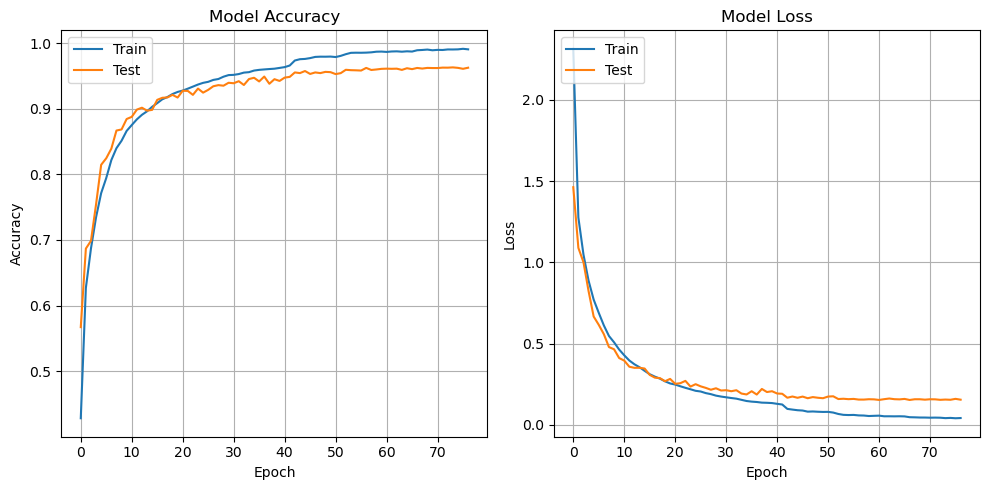

In [32]:
# Plotting Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Turn on the grid
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
loss, acc = sa5_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy of My model: {:5.2f}%".format(100*acc))

435/435 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.9611 - loss: 0.1640
Restored model, accuracy of My model: 96.25%


435/435 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step


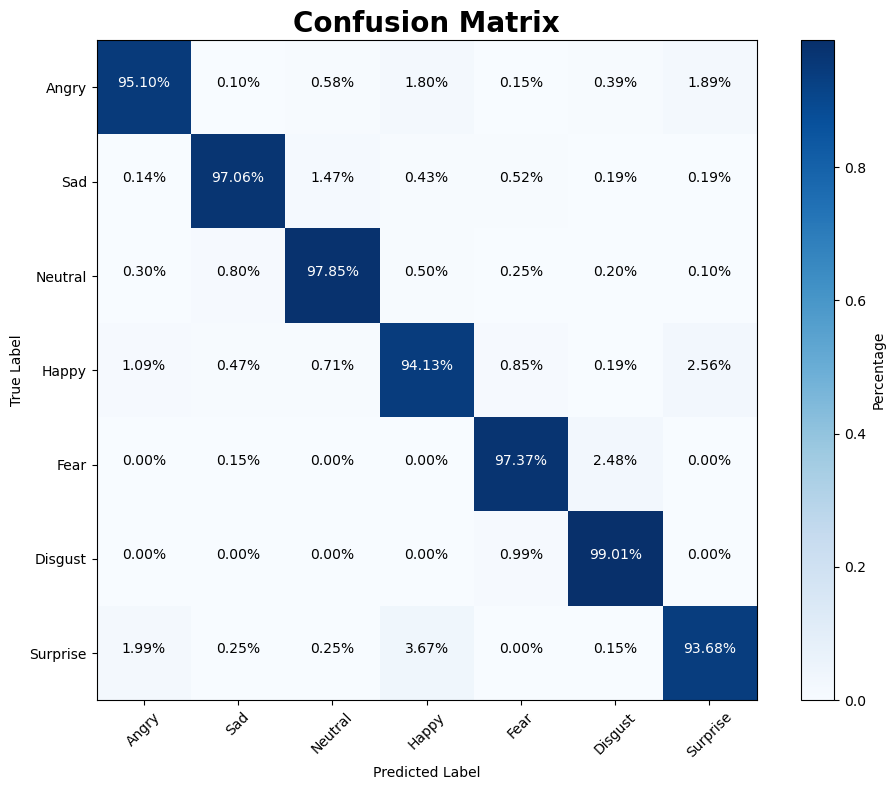

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Define AVAILABLE_EMOTIONS as a list instead of a set
AVAILABLE_EMOTIONS = [
    "Angry",
    "Sad",
    "Neutral",
    "Happy",
    "Fear",
    "Disgust",
    "Surprise",
]



# Get predictions for the test set
y_pred = np.argmax(sa5_model.predict(x_testcnn), axis=1)
# Convert integer labels back to emotion labels
y_pred_emotions = [AVAILABLE_EMOTIONS[label-1] for label in y_pred]
y_test_emotions = [AVAILABLE_EMOTIONS[label-1] for label in y_test]

# Compute confusion matrix
conf_matrix = np.zeros((len(AVAILABLE_EMOTIONS), len(AVAILABLE_EMOTIONS)), dtype=int)

for true_label, predicted_label in zip(y_test_emotions, y_pred_emotions):
    conf_matrix[AVAILABLE_EMOTIONS.index(true_label)][AVAILABLE_EMOTIONS.index(predicted_label)] += 1

# Plot confusion matrix with shaded blocks proportional to percentages
total_samples_per_emotion = np.sum(conf_matrix, axis=1)

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix / total_samples_per_emotion[:, None], interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=20, fontweight='bold')
plt.colorbar(label='Percentage')
tick_marks = np.arange(len(AVAILABLE_EMOTIONS))
plt.xticks(tick_marks, AVAILABLE_EMOTIONS, rotation=45)
plt.yticks(tick_marks, AVAILABLE_EMOTIONS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add percentages in each cell
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    percentage = conf_matrix[i, j] / total_samples_per_emotion[i] * 100 if total_samples_per_emotion[i] != 0 else 0
    plt.text(j, i, f"{percentage:.2f}%",
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > total_samples_per_emotion[i] / 2 else "black")

plt.tight_layout()
plt.savefig("C:\\Users\\Samen Das\\Desktop\\Fig\\confusion_matrix(WN).png", dpi=300, bbox_inches='tight')
plt.show()

435/435 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step


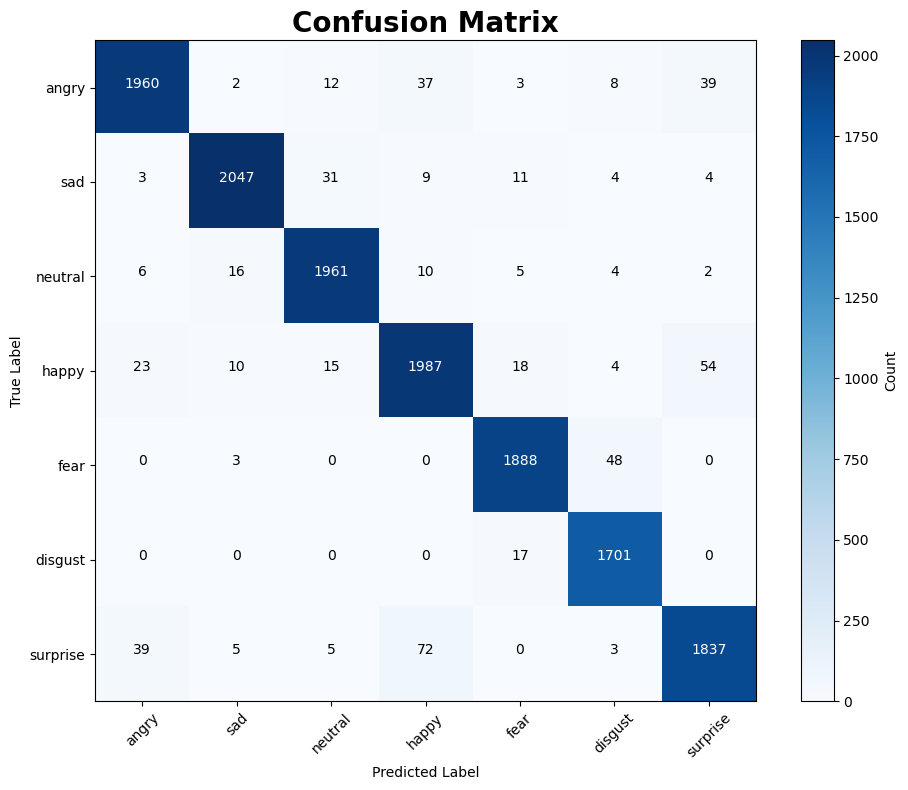

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Define AVAILABLE_EMOTIONS as a list instead of a set
AVAILABLE_EMOTIONS = [
    "angry",
    "sad",
    "neutral",
    "happy",
    "fear",
    "disgust",
    "surprise",
]

# Get predictions for the test set
y_pred = np.argmax(sa5_model.predict(x_testcnn), axis=1)
# Convert integer labels back to emotion labels
y_pred_emotions = [AVAILABLE_EMOTIONS[label-1] for label in y_pred]
y_test_emotions = [AVAILABLE_EMOTIONS[label-1] for label in y_test]

# Compute confusion matrix
conf_matrix = np.zeros((len(AVAILABLE_EMOTIONS), len(AVAILABLE_EMOTIONS)), dtype=int)

for true_label, predicted_label in zip(y_test_emotions, y_pred_emotions):
    conf_matrix[AVAILABLE_EMOTIONS.index(true_label)][AVAILABLE_EMOTIONS.index(predicted_label)] += 1

# Plot confusion matrix without normalization
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=20, fontweight='bold')
plt.colorbar(label='Count')
tick_marks = np.arange(len(AVAILABLE_EMOTIONS))
plt.xticks(tick_marks, AVAILABLE_EMOTIONS, rotation=45)
plt.yticks(tick_marks, AVAILABLE_EMOTIONS)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add counts in each cell
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, conf_matrix[i, j],
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > np.max(conf_matrix) / 2 else "black")

    
plt.tight_layout()
plt.savefig("C:\\Users\\Samen Das\\Desktop\\Fig\\confusion_matrix(WON).png", dpi=300, bbox_inches='tight')
plt.show()



In [36]:
from sklearn.metrics import classification_report

# Assuming that 'sa5_model' is your trained model and 'x_testcnn' is your test dataset
prediction = np.argmax(sa5_model.predict(x_testcnn), axis=-1)

# Defining the target names
target_names = ["Angry", "Sad", "Neutral", "Happy", "Fear", "Disgust", "Surprise"]

# Generating the classification report
report = classification_report(y_test, prediction, target_names=target_names)

print(report)

435/435 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step
              precision    recall  f1-score   support

       Angry       0.97      0.95      0.96      2061
         Sad       0.98      0.97      0.98      2109
     Neutral       0.97      0.98      0.97      2004
       Happy       0.94      0.94      0.94      2111
        Fear       0.97      0.97      0.97      1939
     Disgust       0.96      0.99      0.97      1718
    Surprise       0.95      0.94      0.94      1961

    accuracy                           0.96     13903
   macro avg       0.96      0.96      0.96     13903
weighted avg       0.96      0.96      0.96     13903

